#  Minimum Spanning Tree Problem 
## Complete Subtour Elimination Constraints (SEC) formulation  

This formulation contains all SEC inequalities.
See slides **Network Optimization Part III.pdf** for details


In [1]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt


from itertools import combinations, chain
import pygraphviz as pygv
import os
from IPython.display import SVG, display



In [2]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

class args:
    filename = None
    scale = 40
    figsize = (6,6)

## Drawing functions

In [3]:
def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red')
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'cost').get('cost') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
    
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
        

    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()

### Decision variables:

$$
x_{ij} = \begin{cases} 1 \text{ if edge } e=\{i,j\} \text{ is selected} \\
0 \text{ otherwise.}\end{cases}
$$

### Formulation

$$
\min \sum_{e=\{i,j\} \in E} c_{ij} x_{ij} \\
\sum_{e=\{i,j\} \in E} x_{ij} = |V| - 1 \\
\sum_{e=\{i,j\} \in E(S)} x_{ij} \le |S| - 1, \;\; \forall S \subset V, 2 < |S| \le |V| - 1  \\
x \le 1 \\ 
x \ge 0
$$

In [4]:
args.filename = "graph.gml"
args.scale = 20
args.figsize = (10,10)

basename = os.path.splitext(args.filename)[0]
G = nx.read_graphml (args.filename, node_type=int)

print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

G has 10 nodes and 45 edges


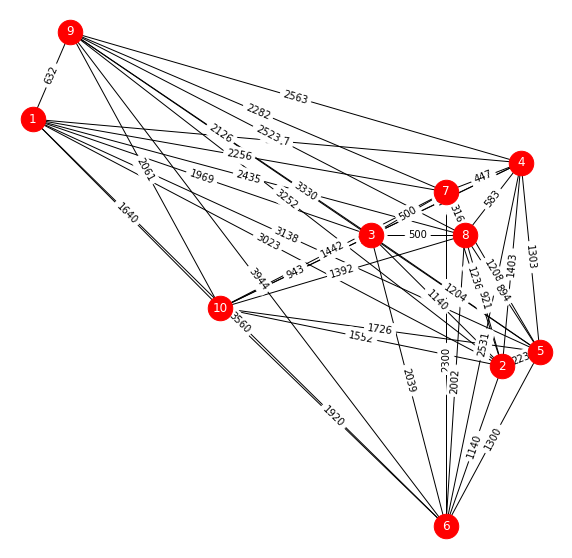

In [5]:
DrawInitG(G, withedges=True)

In [6]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (8, 9), (8, 10), (9, 10)])

In [7]:
mst = gb.Model()

# Decision Variables

x = mst.addVars(G.edges(), 
                obj=[G[u][v]['cost'] for u,v in G.edges()],
                ub = 1.0,
                vtype=gb.GRB.CONTINUOUS,
                name='x')

mst.update()

x

Academic license - for non-commercial use only - expires 2021-07-30
Using license file /opt/gurobi/gurobi.lic


{(1, 2): <gurobi.Var x[1,2]>,
 (1, 3): <gurobi.Var x[1,3]>,
 (1, 4): <gurobi.Var x[1,4]>,
 (1, 5): <gurobi.Var x[1,5]>,
 (1, 6): <gurobi.Var x[1,6]>,
 (1, 7): <gurobi.Var x[1,7]>,
 (1, 8): <gurobi.Var x[1,8]>,
 (1, 9): <gurobi.Var x[1,9]>,
 (1, 10): <gurobi.Var x[1,10]>,
 (2, 3): <gurobi.Var x[2,3]>,
 (2, 4): <gurobi.Var x[2,4]>,
 (2, 5): <gurobi.Var x[2,5]>,
 (2, 6): <gurobi.Var x[2,6]>,
 (2, 7): <gurobi.Var x[2,7]>,
 (2, 8): <gurobi.Var x[2,8]>,
 (2, 9): <gurobi.Var x[2,9]>,
 (2, 10): <gurobi.Var x[2,10]>,
 (3, 4): <gurobi.Var x[3,4]>,
 (3, 5): <gurobi.Var x[3,5]>,
 (3, 6): <gurobi.Var x[3,6]>,
 (3, 7): <gurobi.Var x[3,7]>,
 (3, 8): <gurobi.Var x[3,8]>,
 (3, 9): <gurobi.Var x[3,9]>,
 (3, 10): <gurobi.Var x[3,10]>,
 (4, 5): <gurobi.Var x[4,5]>,
 (4, 6): <gurobi.Var x[4,6]>,
 (4, 7): <gurobi.Var x[4,7]>,
 (4, 8): <gurobi.Var x[4,8]>,
 (4, 9): <gurobi.Var x[4,9]>,
 (4, 10): <gurobi.Var x[4,10]>,
 (5, 6): <gurobi.Var x[5,6]>,
 (5, 7): <gurobi.Var x[5,7]>,
 (5, 8): <gurobi.Var x[5,8]>,
 (

In [8]:
mst.write('mst.lp')

In [9]:


mst.update()

mst.write('mst.lp')

## Subtour elimination constraints: complete enumeration

In [10]:
len(list(powerset(G.nodes())))

1024

In [11]:
sec = 0

for i in powerset(G.nodes()):
    if len(i) > 2 and len(i) <= G.number_of_nodes() - 1:
        sec += 1
        S = G.subgraph(i)
        if S.number_of_edges() > S.number_of_nodes() - 1:
            
            # Add only edges existing in S 
            # NOTE 
            # a variable key error may arise without  
            # the conditional statement (edges are undirected)
            #   
            mst.addConstr(gb.quicksum(x[i,j] \
                                      if (i,j) in x else x[j,i] \
                                      for i,j in S.edges()) \
                          <= S.number_of_nodes() - 1, 'Sec' + str(sec))
            
            
mst.update()
mst.write('mst.lp')

print ("Number of Subtour Elimination Constraints:", sec)


Number of Subtour Elimination Constraints: 967


In [12]:
mst.optimize()

x

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 968 rows, 45 columns and 11475 nonzeros
Model fingerprint: 0x211b7527
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 9e+00]
Presolve time: 0.01s
Presolved: 968 rows, 45 columns, 11475 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0070000e+03   1.024000e+03   0.000000e+00      0s
       8    6.7350000e+03   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.02 seconds
Optimal objective  6.735000000e+03


{(1, 2): <gurobi.Var x[1,2] (value 0.0)>,
 (1, 3): <gurobi.Var x[1,3] (value 0.0)>,
 (1, 4): <gurobi.Var x[1,4] (value 0.0)>,
 (1, 5): <gurobi.Var x[1,5] (value 0.0)>,
 (1, 6): <gurobi.Var x[1,6] (value 0.0)>,
 (1, 7): <gurobi.Var x[1,7] (value 0.0)>,
 (1, 8): <gurobi.Var x[1,8] (value 0.0)>,
 (1, 9): <gurobi.Var x[1,9] (value 1.0)>,
 (1, 10): <gurobi.Var x[1,10] (value 1.0)>,
 (2, 3): <gurobi.Var x[2,3] (value 0.0)>,
 (2, 4): <gurobi.Var x[2,4] (value 0.0)>,
 (2, 5): <gurobi.Var x[2,5] (value 1.0)>,
 (2, 6): <gurobi.Var x[2,6] (value 1.0)>,
 (2, 7): <gurobi.Var x[2,7] (value 0.0)>,
 (2, 8): <gurobi.Var x[2,8] (value 0.0)>,
 (2, 9): <gurobi.Var x[2,9] (value 0.0)>,
 (2, 10): <gurobi.Var x[2,10] (value 0.0)>,
 (3, 4): <gurobi.Var x[3,4] (value 0.0)>,
 (3, 5): <gurobi.Var x[3,5] (value 0.0)>,
 (3, 6): <gurobi.Var x[3,6] (value 0.0)>,
 (3, 7): <gurobi.Var x[3,7] (value 0.0)>,
 (3, 8): <gurobi.Var x[3,8] (value 1.0)>,
 (3, 9): <gurobi.Var x[3,9] (value 0.0)>,
 (3, 10): <gurobi.Var x[3,10] 

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 968 rows, 45 columns and 11475 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 9e+00]

Solved in 0 iterations and 0.01 seconds
Optimal objective  6.735000000e+03
Optimal solution: 6735.0


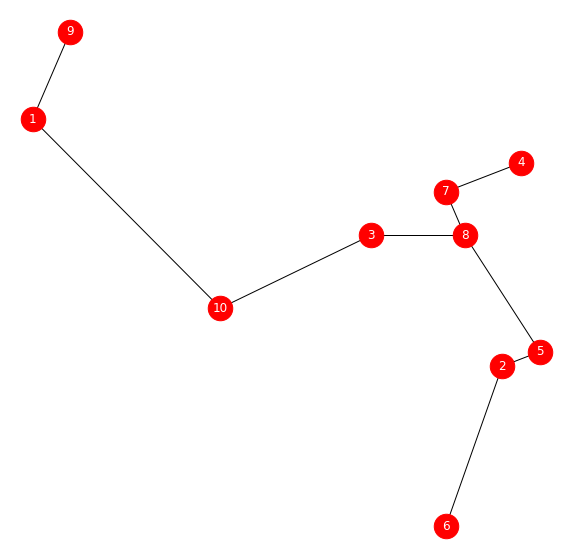

In [13]:

mst.optimize()

print ("Optimal solution:", mst.objVal)
DrawSol(G,x)


### @HOME:

1. Generate a graph with a ``networkx`` graph generator up 20 nodes
2. Generate an instance of the MST with the ``random`` module, generating random positive costs
3. Calculate the MST with the formulation above and with the ``networkx`` method

## Subtour Elimination Constraints: a cutting plane example

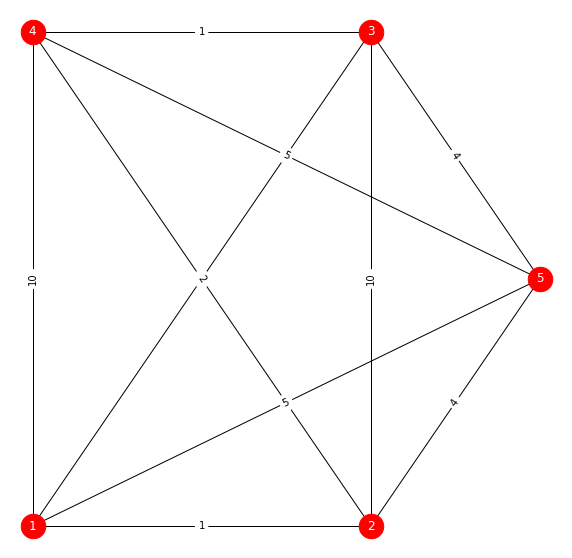

In [14]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4,5])

G.nodes[1]['x'] = 0
G.nodes[1]['y'] = 0

G.nodes[2]['x'] = 10
G.nodes[2]['y'] = 0

G.nodes[3]['x'] = 10
G.nodes[3]['y'] = 10

G.nodes[4]['x'] = 0
G.nodes[4]['y'] = 10

G.nodes[5]['x'] = 15
G.nodes[5]['y'] = 5

G.add_edge(1,2, cost=1)
G.add_edge(1,3, cost=2)
G.add_edge(1,4, cost=10)
G.add_edge(1,5, cost=5)

G.add_edge(2,3, cost=10)
G.add_edge(2,4, cost=2)
G.add_edge(2,5, cost=4)

G.add_edge(3,4, cost=1)
G.add_edge(3,5, cost=4)

G.add_edge(4,5, cost=5)


DrawInitG(G,True)


In [15]:
mst = gb.Model()

# Decision Variables

x = mst.addVars(G.edges(), \
                obj=[G[u][v]['cost'] for u,v in G.edges()],\
                ub = 1.0,\
                vtype=gb.GRB.CONTINUOUS,\
                name='x')

mst.addConstr(x.sum() == G.number_of_nodes() - 1, 'Cardinality')

mst.update()

mst.write('mst.lp')

In [16]:
mst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0xb78b6ec2
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+00, 4e+00]
Presolve removed 0 rows and 5 columns
Presolve time: 0.01s
Presolved: 1 rows, 5 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+00   2.000000e+00   0.000000e+00      0s
       1    6.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds
Optimal objective  6.000000000e+00


In [17]:
x[1,2].x

1.0

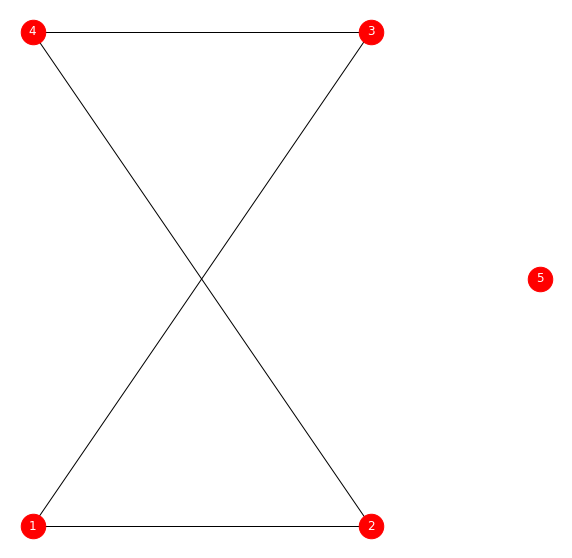

In [18]:
DrawSol(G,x)

The solution does not represent a tree and there exists a violated subtour inequality.
Namely:

$$S=\{1, 2, 3, 4\}$$

$$x_{1,2} + x_{1,3} + x_{1,4} + x_{2,3} + x_{2,4} + x_{3,4} \le 3 $$

is violated by the solution above

In [19]:
mst.addConstr(x[1,2] + x[1,3] + x[1,4] + x[2,3] + x[2,4]\
              + x[3,4] <= 3)

<gurobi.Constr *Awaiting Model Update*>

In [20]:
mst.write('mst.lp')

In [21]:
mst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2 rows, 10 columns and 16 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 4e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0000000e+00   1.000000e+00   0.000000e+00      0s
       1    8.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  8.000000000e+00


In [22]:
x

{(1, 2): <gurobi.Var x[1,2] (value 1.0)>,
 (1, 3): <gurobi.Var x[1,3] (value 0.0)>,
 (1, 4): <gurobi.Var x[1,4] (value 0.0)>,
 (1, 5): <gurobi.Var x[1,5] (value 0.0)>,
 (2, 3): <gurobi.Var x[2,3] (value 0.0)>,
 (2, 4): <gurobi.Var x[2,4] (value 1.0)>,
 (2, 5): <gurobi.Var x[2,5] (value 1.0)>,
 (3, 4): <gurobi.Var x[3,4] (value 1.0)>,
 (3, 5): <gurobi.Var x[3,5] (value 0.0)>,
 (4, 5): <gurobi.Var x[4,5] (value 0.0)>}

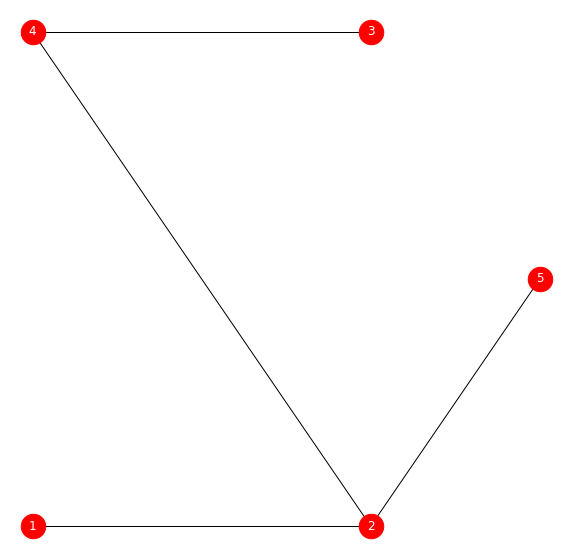

In [23]:
DrawSol(G,x)

## Subtour Elimination Constraints formulation (SEC): separation problem

### Problem formulation

$$
\max \sum_{e=\{i,j\} \in E} x^*_e w_{ij} - \sum_{j \in V} z_j \\
w_{ij} - z_i \le 0  \;\;\; \forall \{i,j\} \in E\\
w_{ij} - z_j \le 0 \;\;\; \forall \{i,j\} \in E\\
z_k = 1\\
0 \le z \le 1, 0 \le w \le 1
$$

In [24]:
#
# Subtour Elimination Constraints: separation
# 

def SECseparation (x, G, kappa):
    
    #
    # Definition of the separation problem
    #
    
    SECsep = gb.Model()
    
    # Display of gurobi log switched off

    SECsep.Params.OutputFlag = 0

    #
    # Variables w_ij and z_i
    #
    
    w = SECsep.addVars(G.edges(), 
                       obj=[x[u,v].x for u,v in G.edges()],
                       ub = 1.0,
                       vtype=gb.GRB.CONTINUOUS, name='w')
        
    z = SECsep.addVars(G.nodes(),
                       obj = -1.0,
                       ub = 1.0,
                       vtype=gb.GRB.CONTINUOUS, name='z')

    #
    # Objective function
    #

    SECsep.ModelSense = -1
    
    #
    # Constraints
    #

    SECsep.addConstrs((w[i,j] - z[i] <= 0 \
                       for i,j in G.edges()), name = 'WZ1')
    
    SECsep.addConstrs((w[i,j] - z[j] <= 0 \
                       for i,j in G.edges()), name = 'WZ2')
    
    SECsep.addConstr(z[kappa] == 1, name="Fixing")
    
    SECsep.update()
    
    SECsep.write('sep.lp')

    SECsep.optimize()

    if (SECsep.objVal) > -1.0:
        SEC = [i for i in G.nodes() if z[i].x > 0.1]
        return True, SEC
    else:
        return False, None


In [25]:
args.filename = "graph30_1.gml"
args.scale = 30
args.figsize = (30,30)


basename = os.path.splitext(args.filename)[0]
G = nx.read_graphml (args.filename, node_type=int)

print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

G has 30 nodes and 435 edges


## Master problem 

The master problem now contains only the cardinality constraint


In [26]:
mst = gb.Model()

# Decision Variables

x = mst.addVars(G.edges(), obj=[G[u][v]['cost'] for u,v in G.edges()], ub = 1.0,\
                vtype=gb.GRB.CONTINUOUS, name='x')

# Cardinality constraint

mst.addConstr(x.sum() == G.number_of_nodes() - 1, 'Cardinality')

mst.update()

mst.write('mst.lp')

In [27]:
mst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 435 columns and 435 nonzeros
Model fingerprint: 0x5eea021f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 3e+01]
Presolve removed 0 rows and 185 columns
Presolve time: 0.02s
Presolved: 1 rows, 250 columns, 250 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1900000e+02   1.400000e+01   0.000000e+00      0s
       1    5.1830000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.03 seconds
Optimal objective  5.183000000e+03


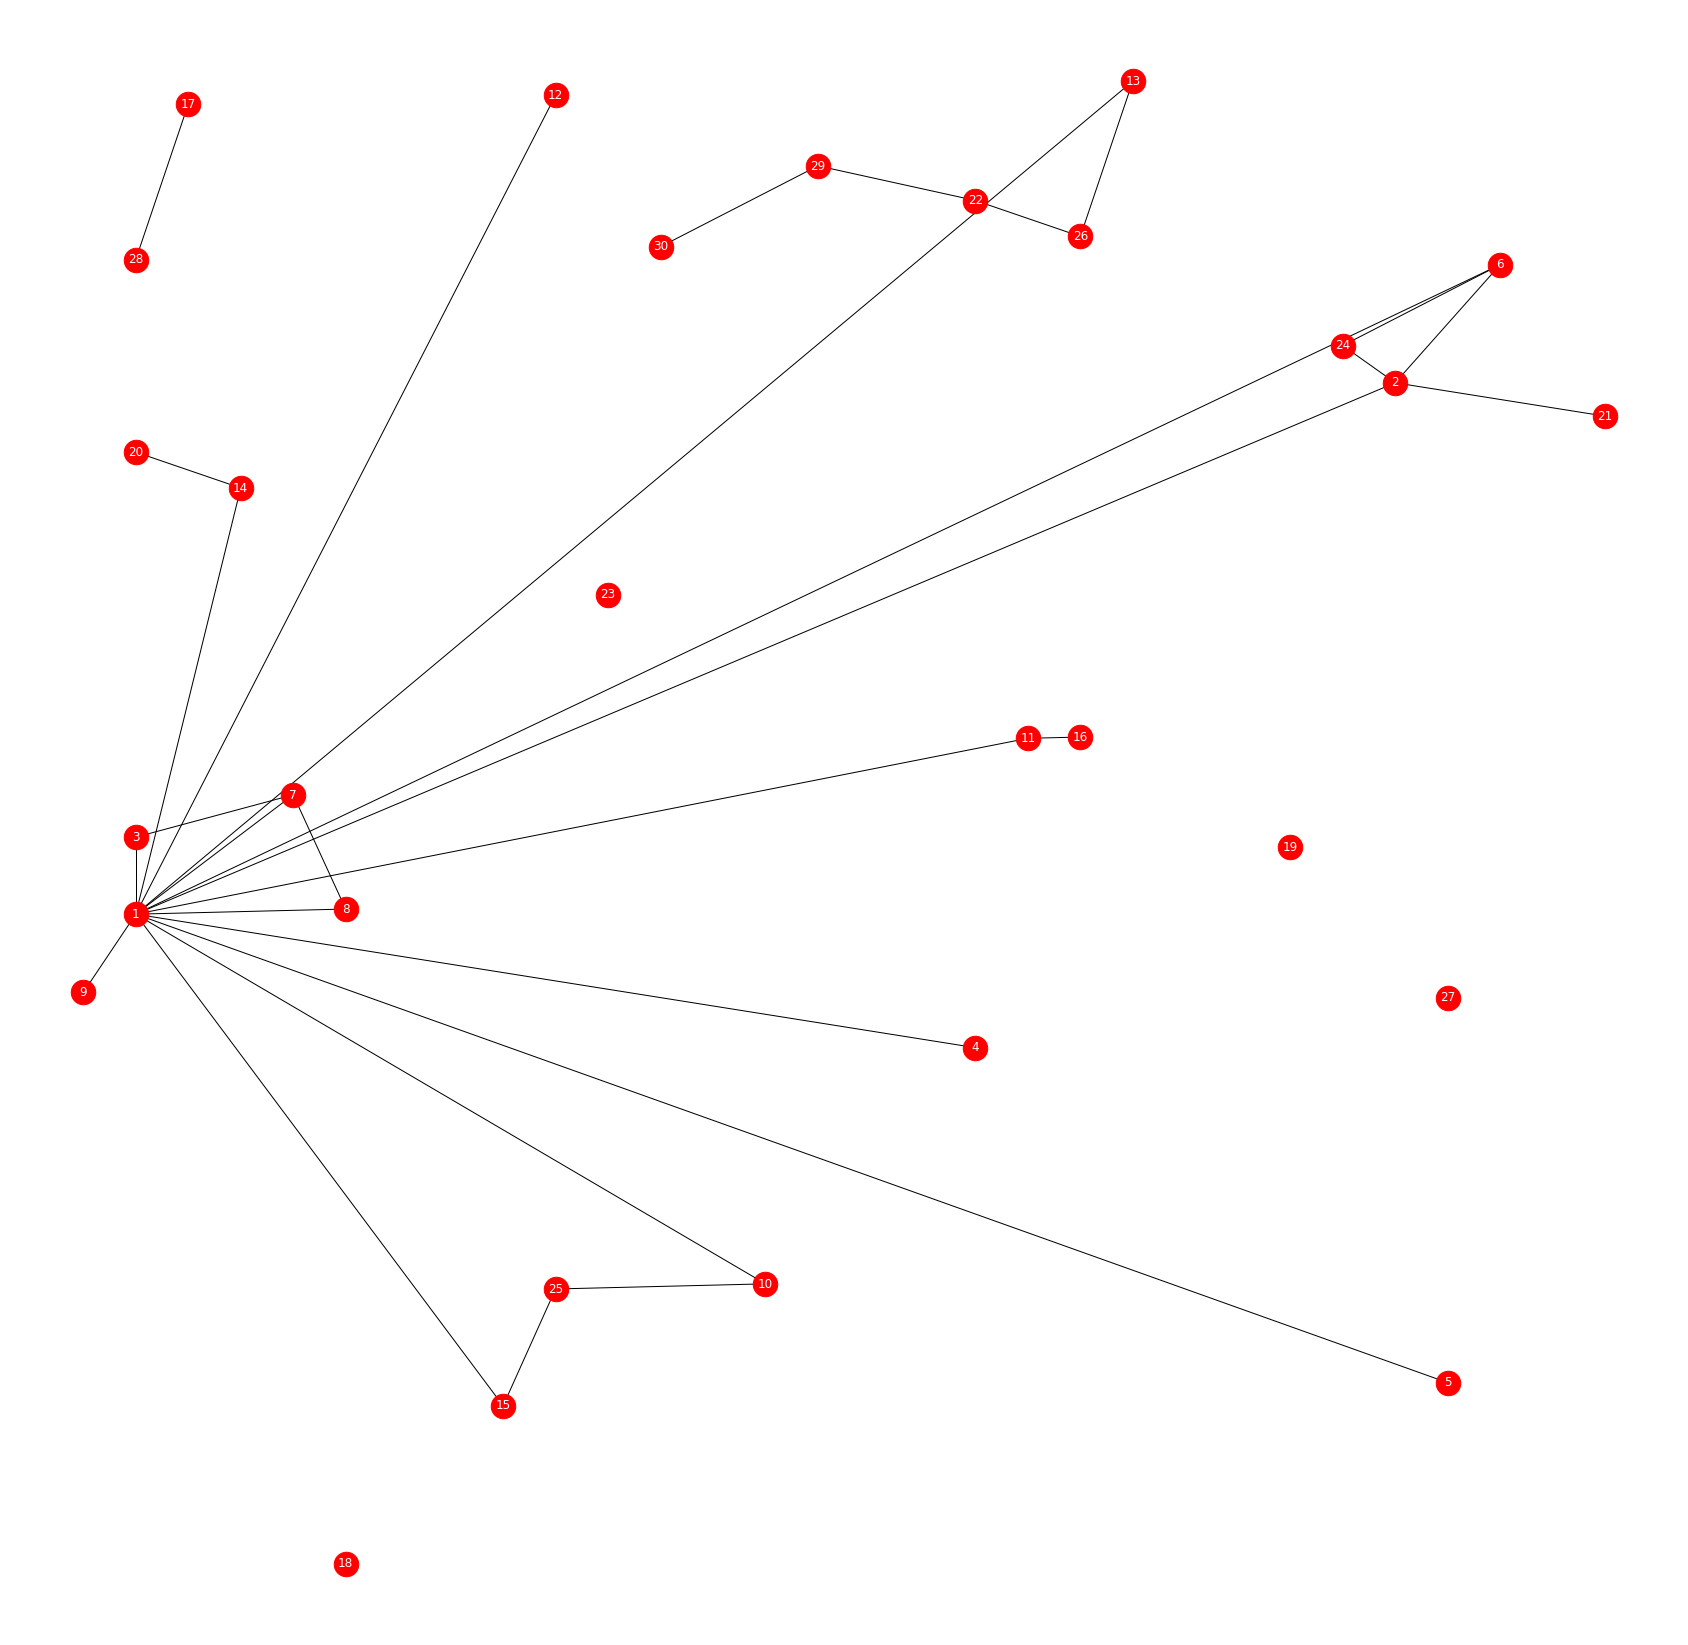

In [28]:
DrawSol(G,x)

## Cutting plane algorithm

Now the cutting plane algorithm. 

At each iteration, after the resolution of the master LP (note, the relaxation) 
a sequence of separation problems are solved
and if there exists a violated SEC then it is added to the master. 

The cutting plane is interactive, thus press ``Enter`` key to continue.

Current solution value: 5183.0


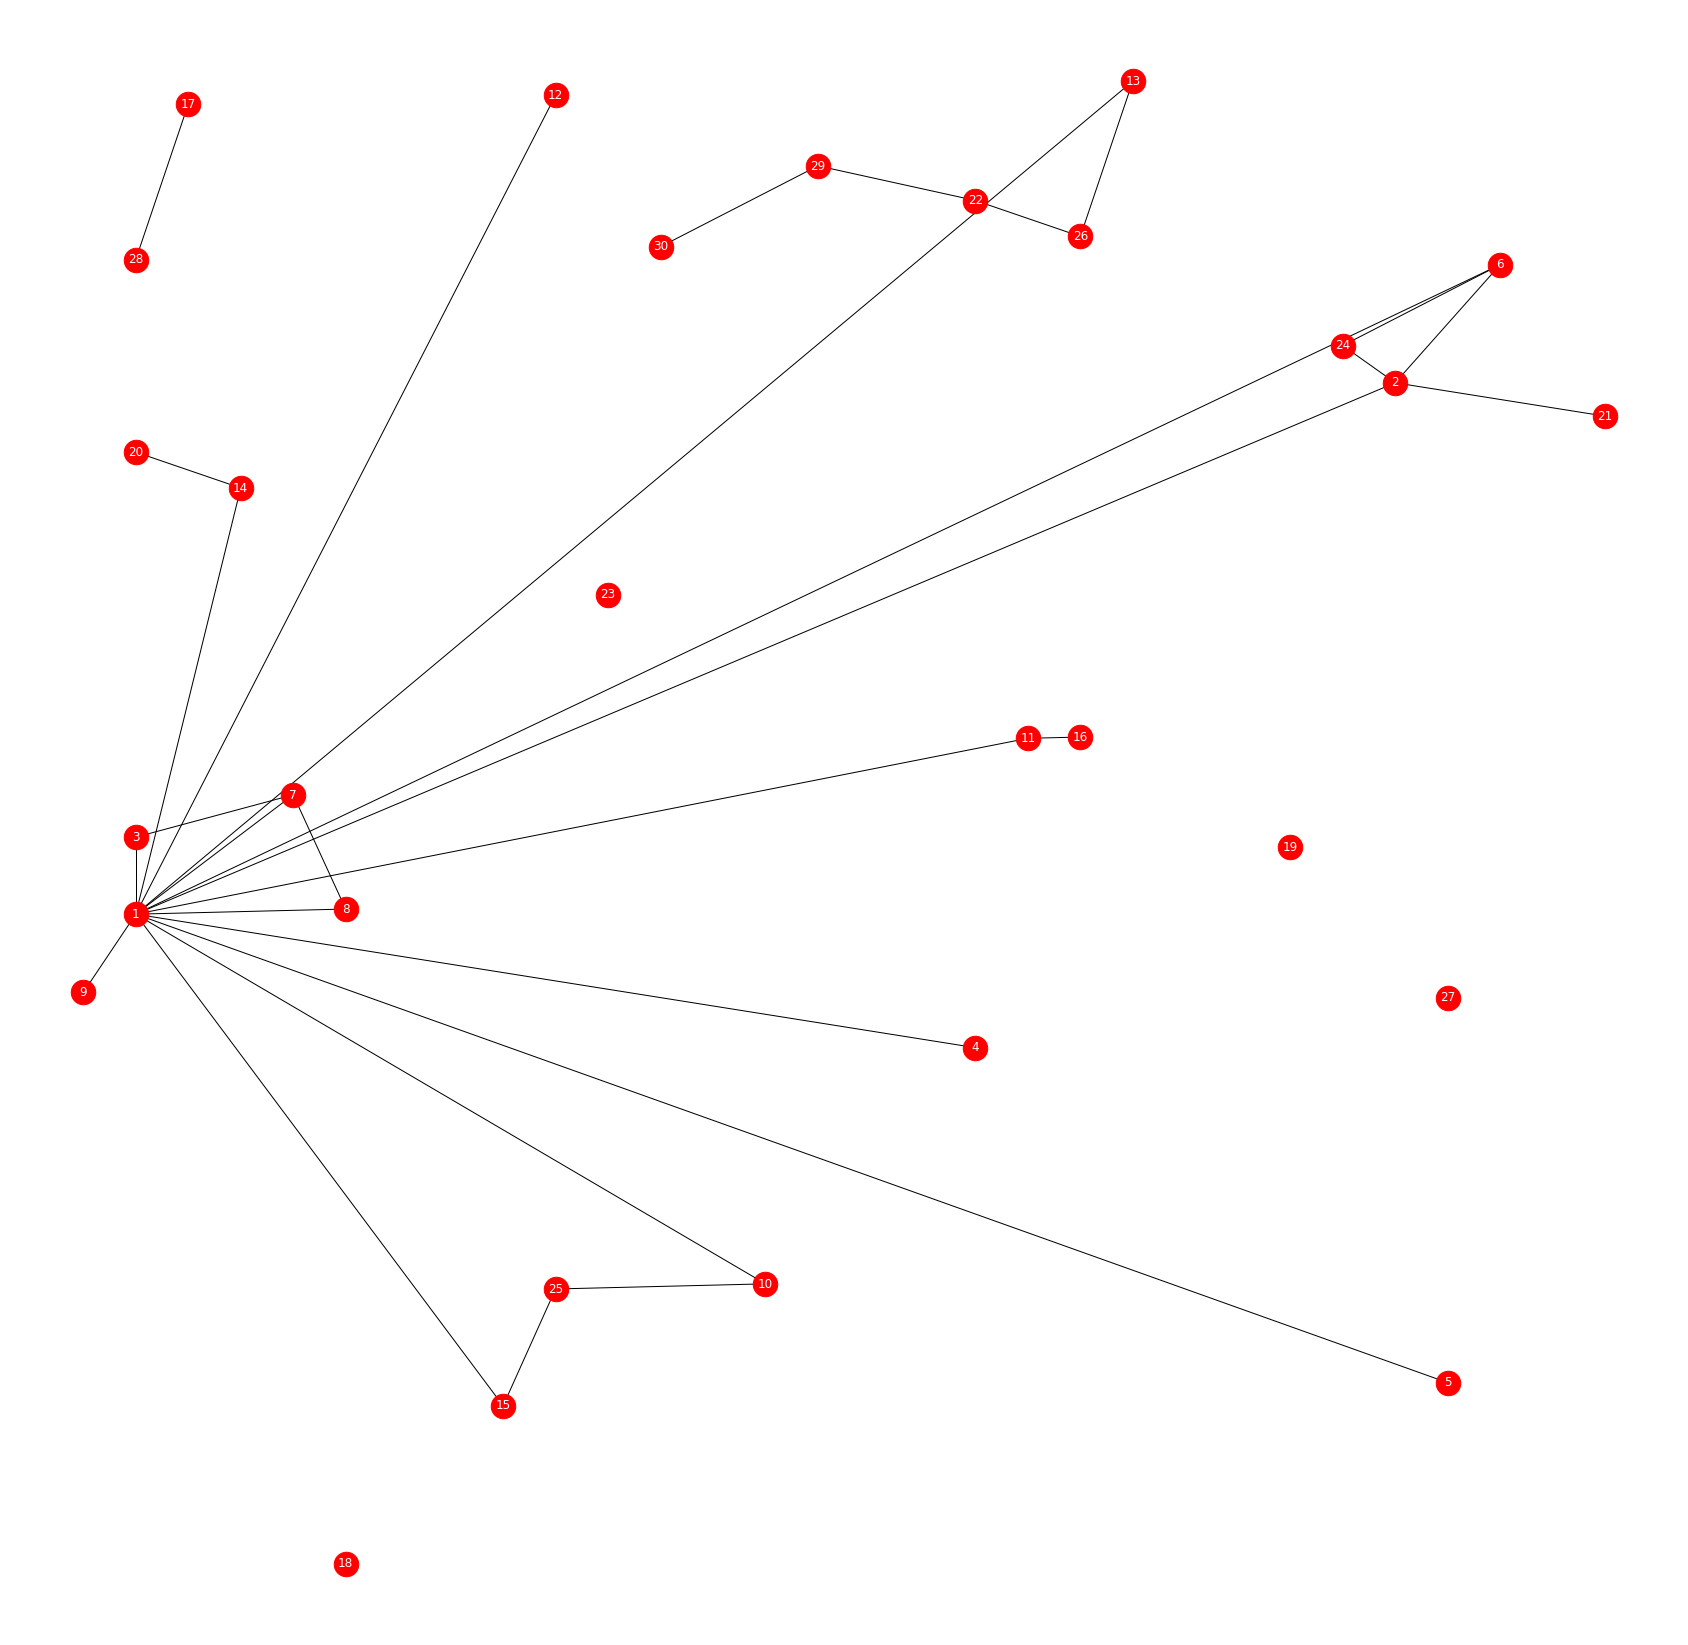

Found violated subtour. S = [1, 2, 3, 6, 7, 8, 10, 11, 13, 14, 15, 24, 25, 26]
Press Enter to continue...

Current solution value: 5565.0


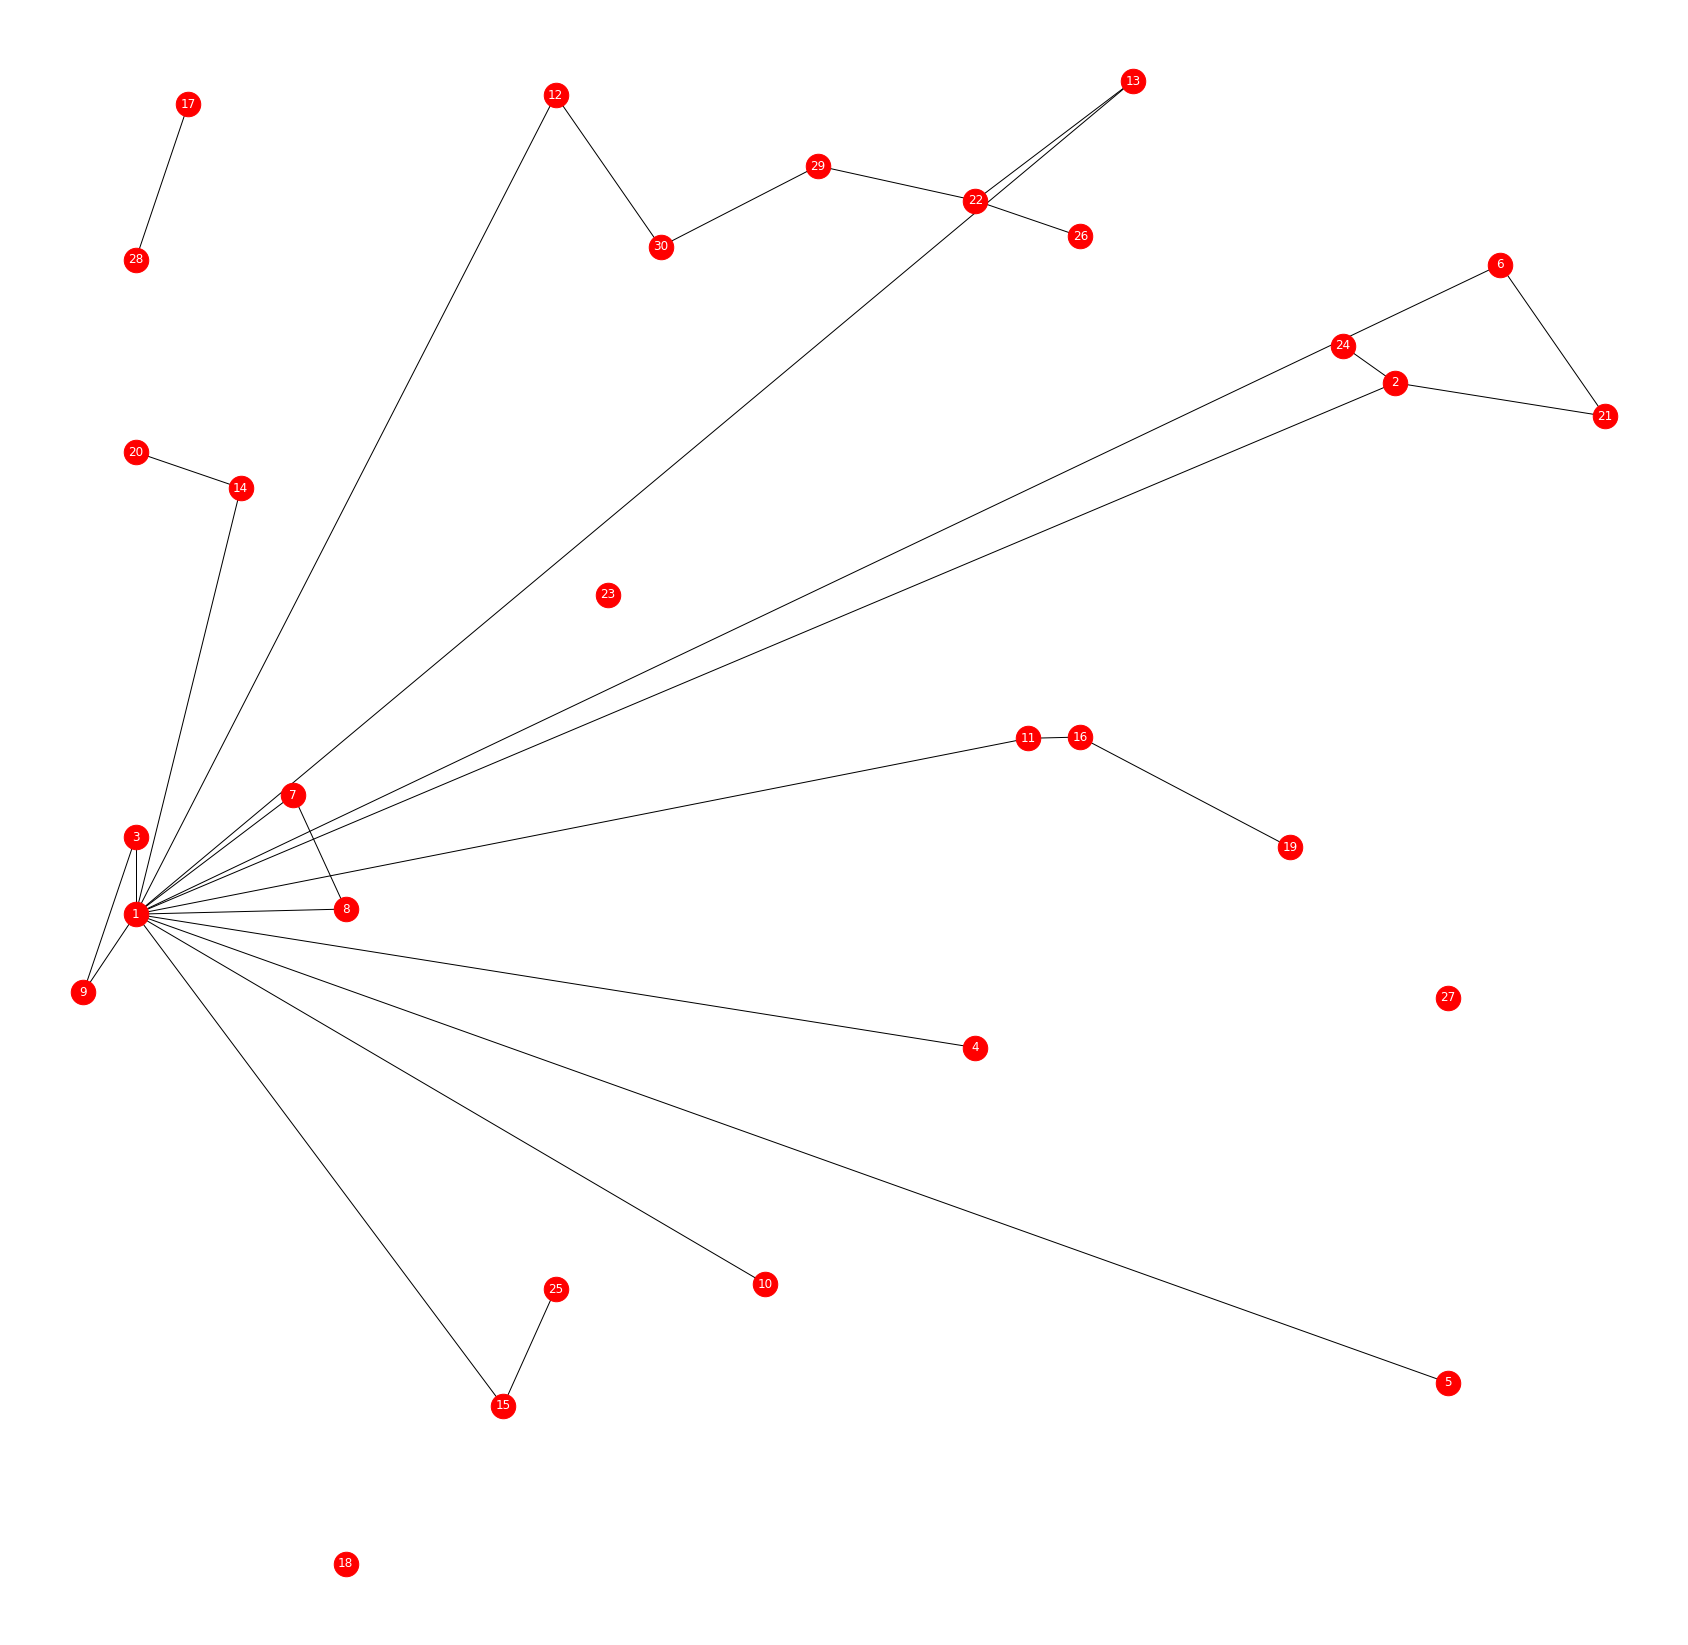

Found violated subtour. S = [1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 21, 22, 29, 30]
Press Enter to continue...

Current solution value: 5791.0


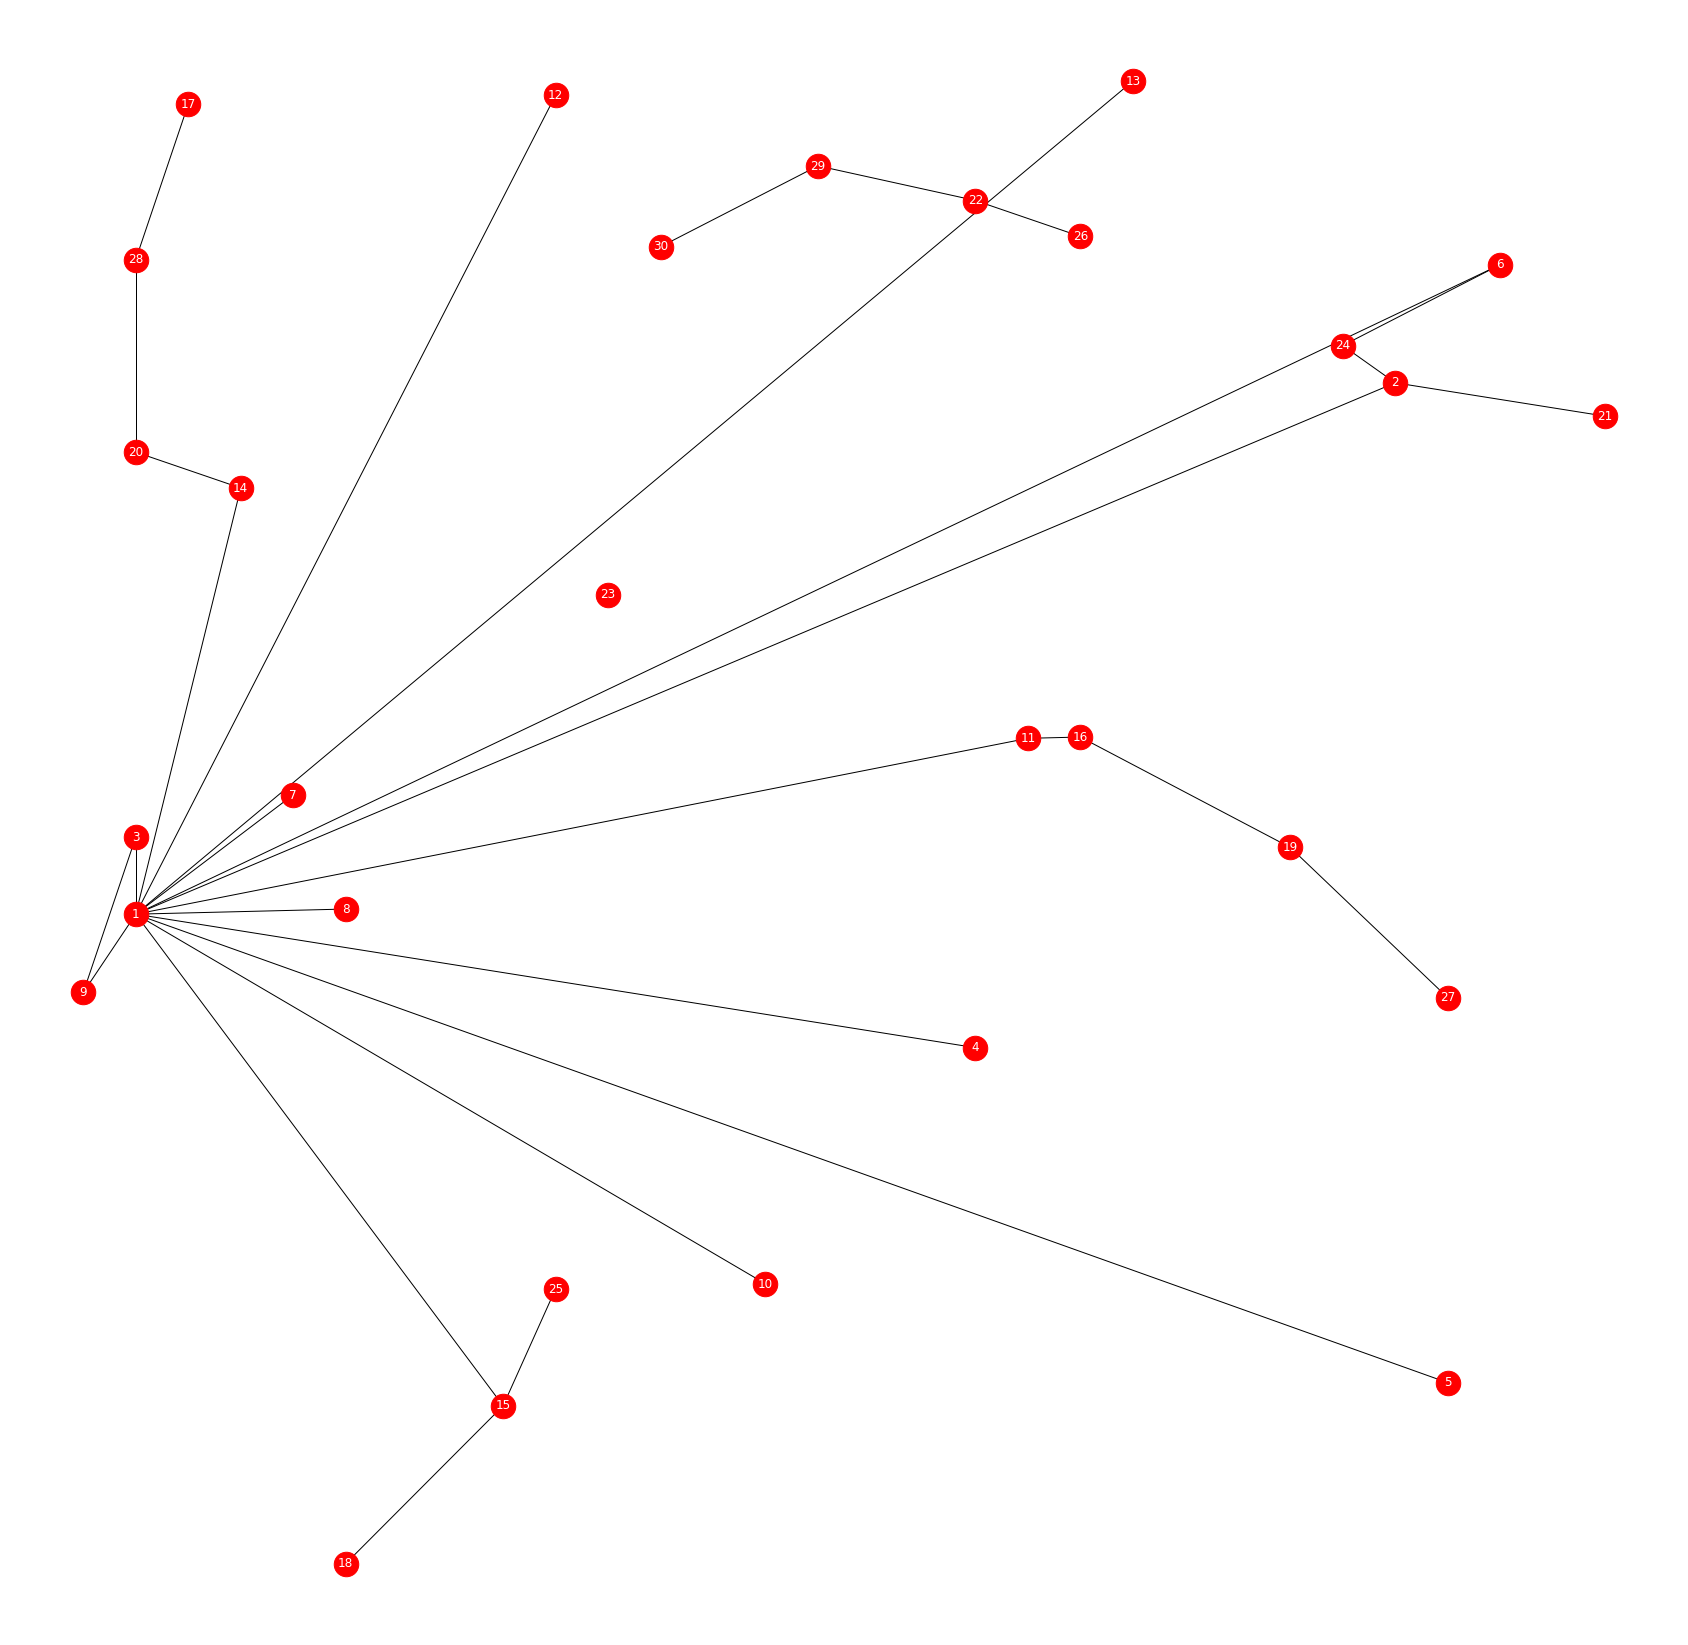

Found violated subtour. S = [1, 2, 3, 6, 9, 11, 14, 15, 16, 20, 24]
Press Enter to continue...

Current solution value: 5843.0


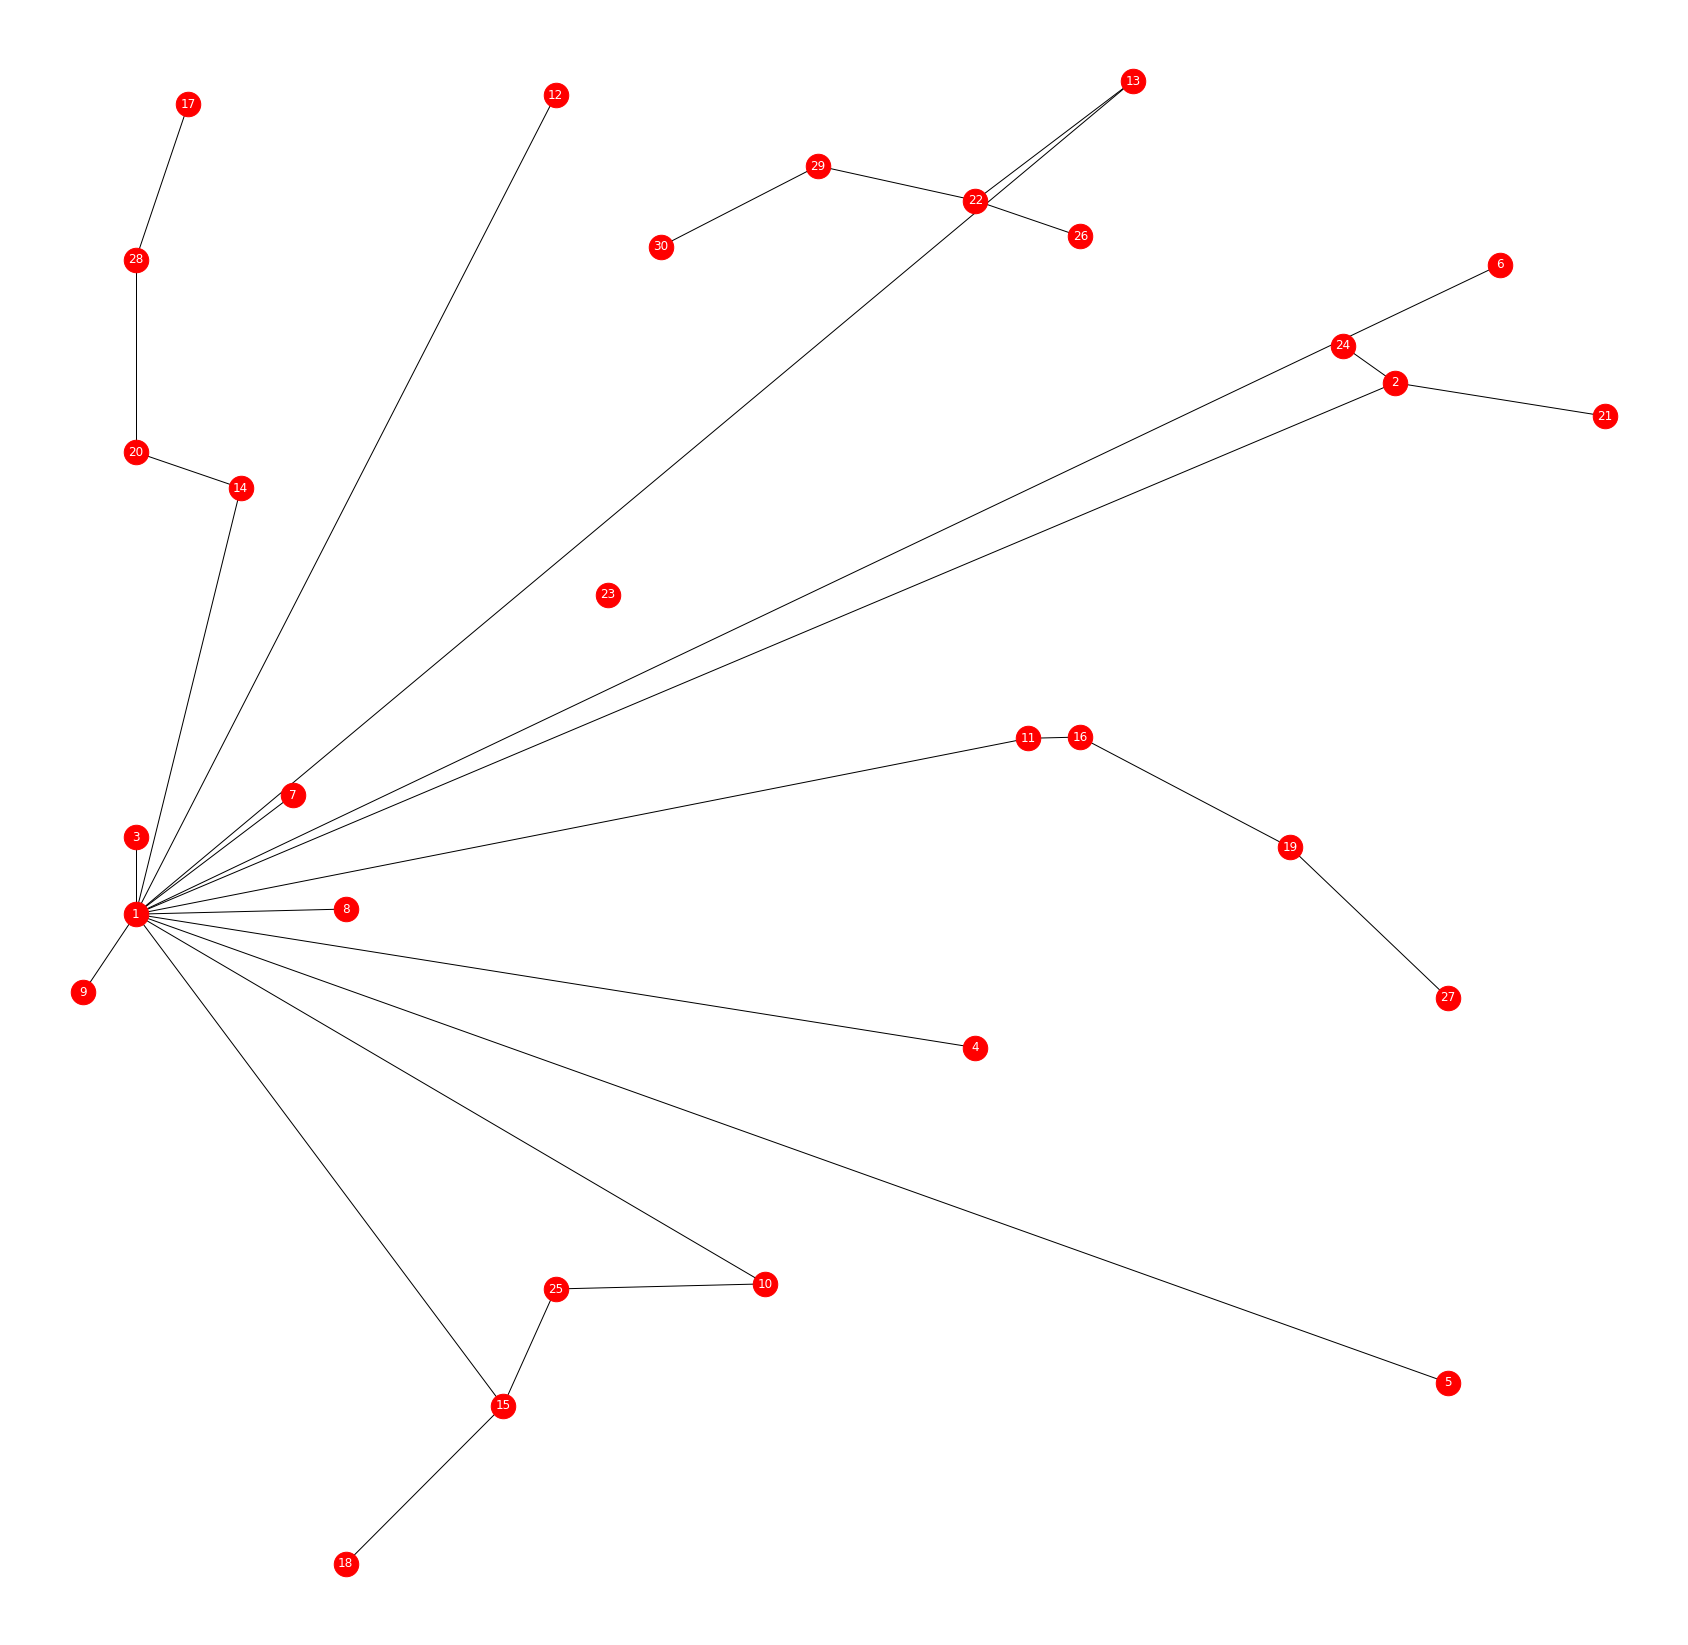

Found violated subtour. S = [1, 2, 10, 11, 13, 14, 15, 16, 20, 22, 25]
Press Enter to continue...

Current solution value: 5855.0


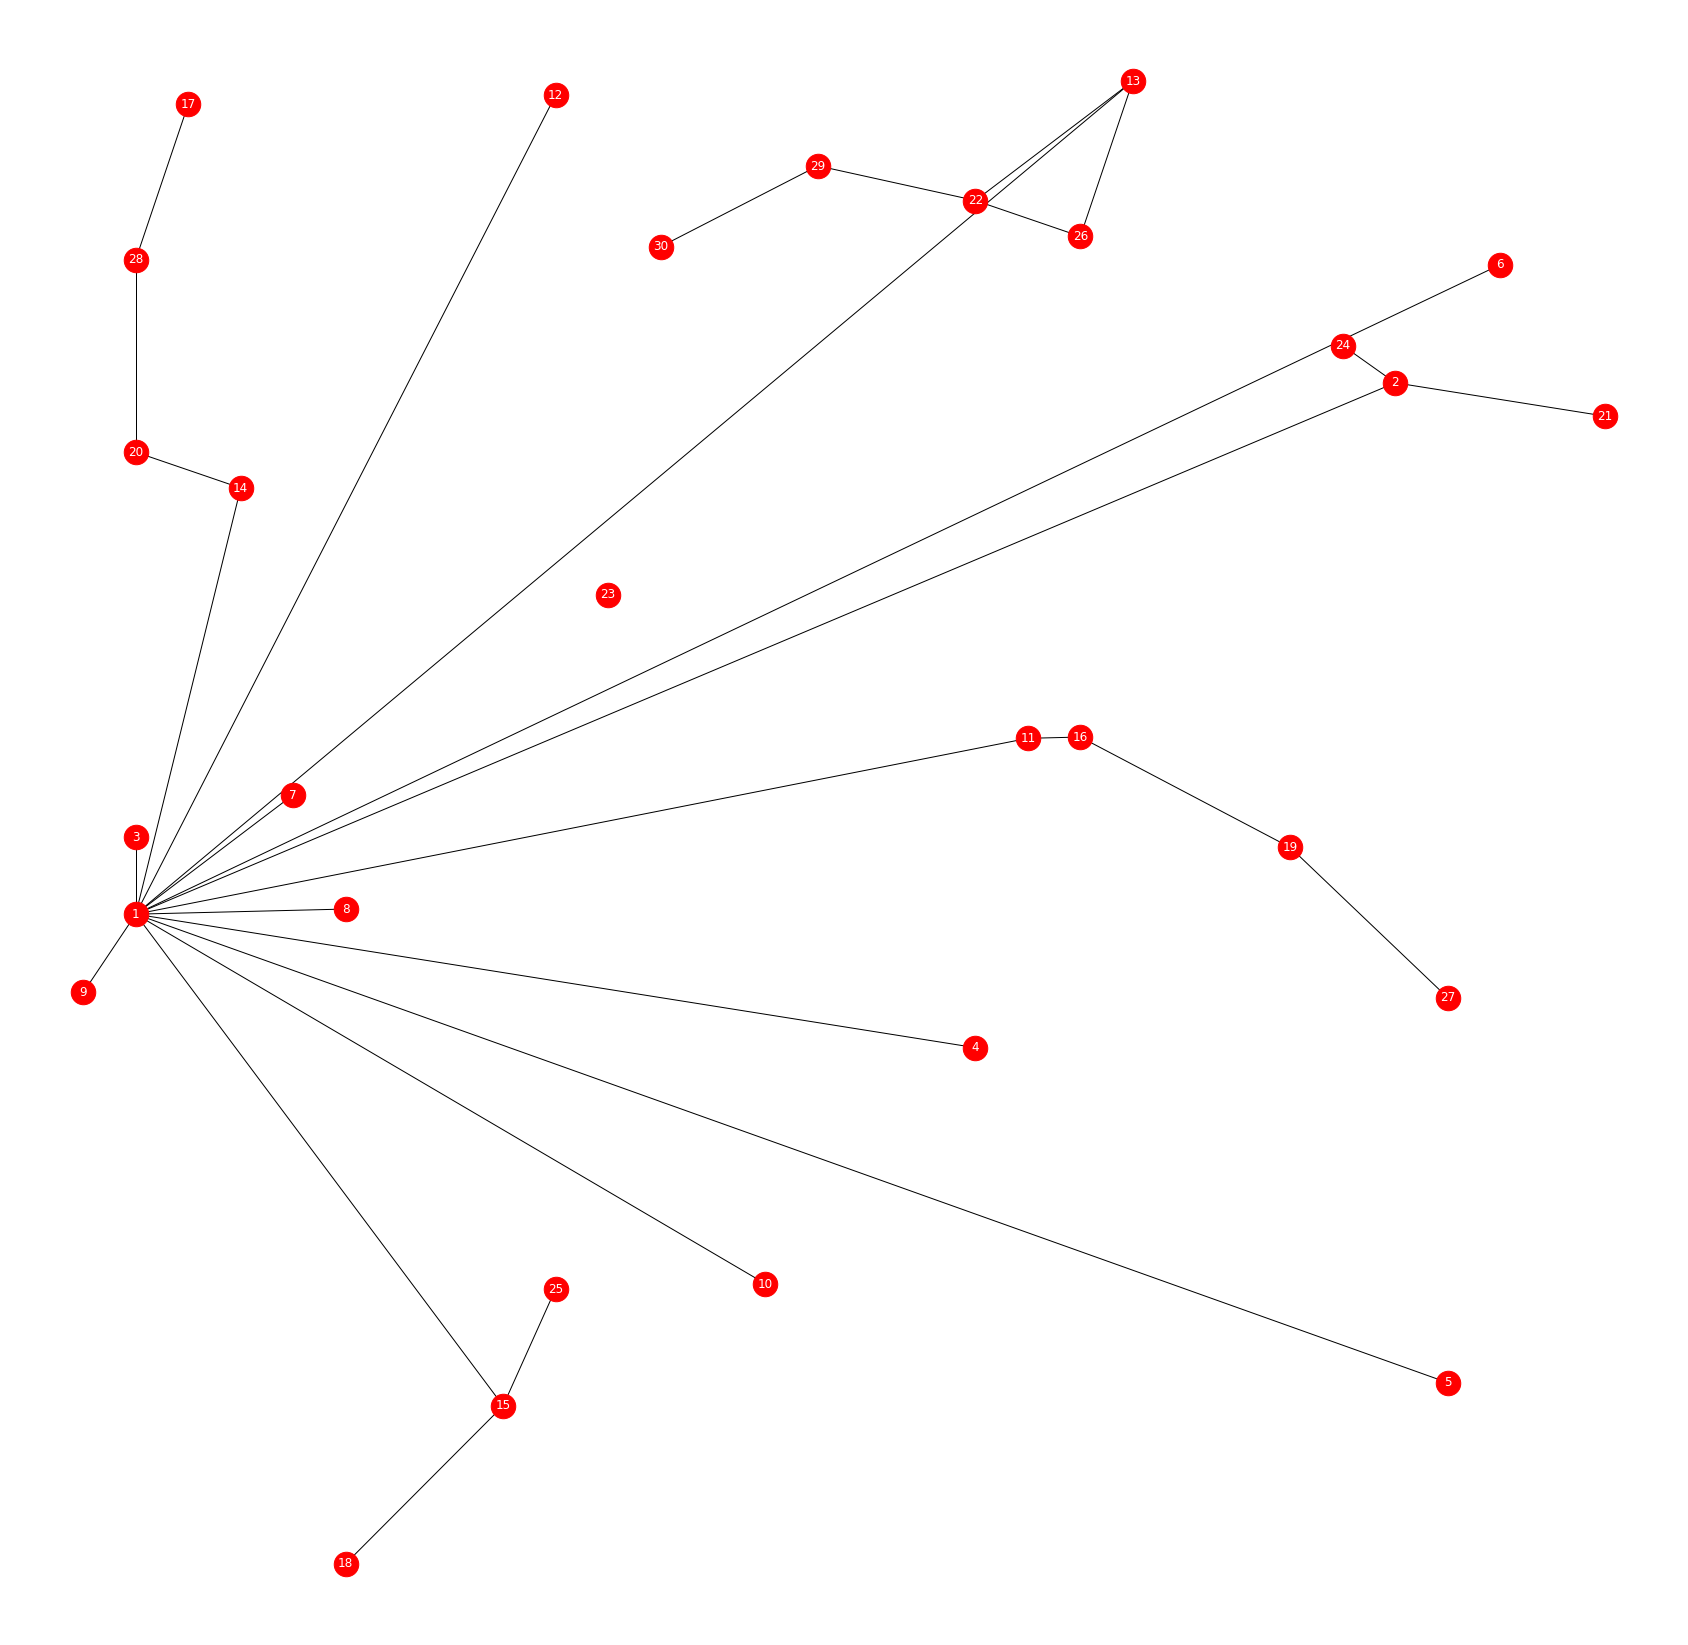

Found violated subtour. S = [1, 2, 11, 13, 14, 15, 16, 20, 22, 26]
Press Enter to continue...

Current solution value: 5856.999999999999


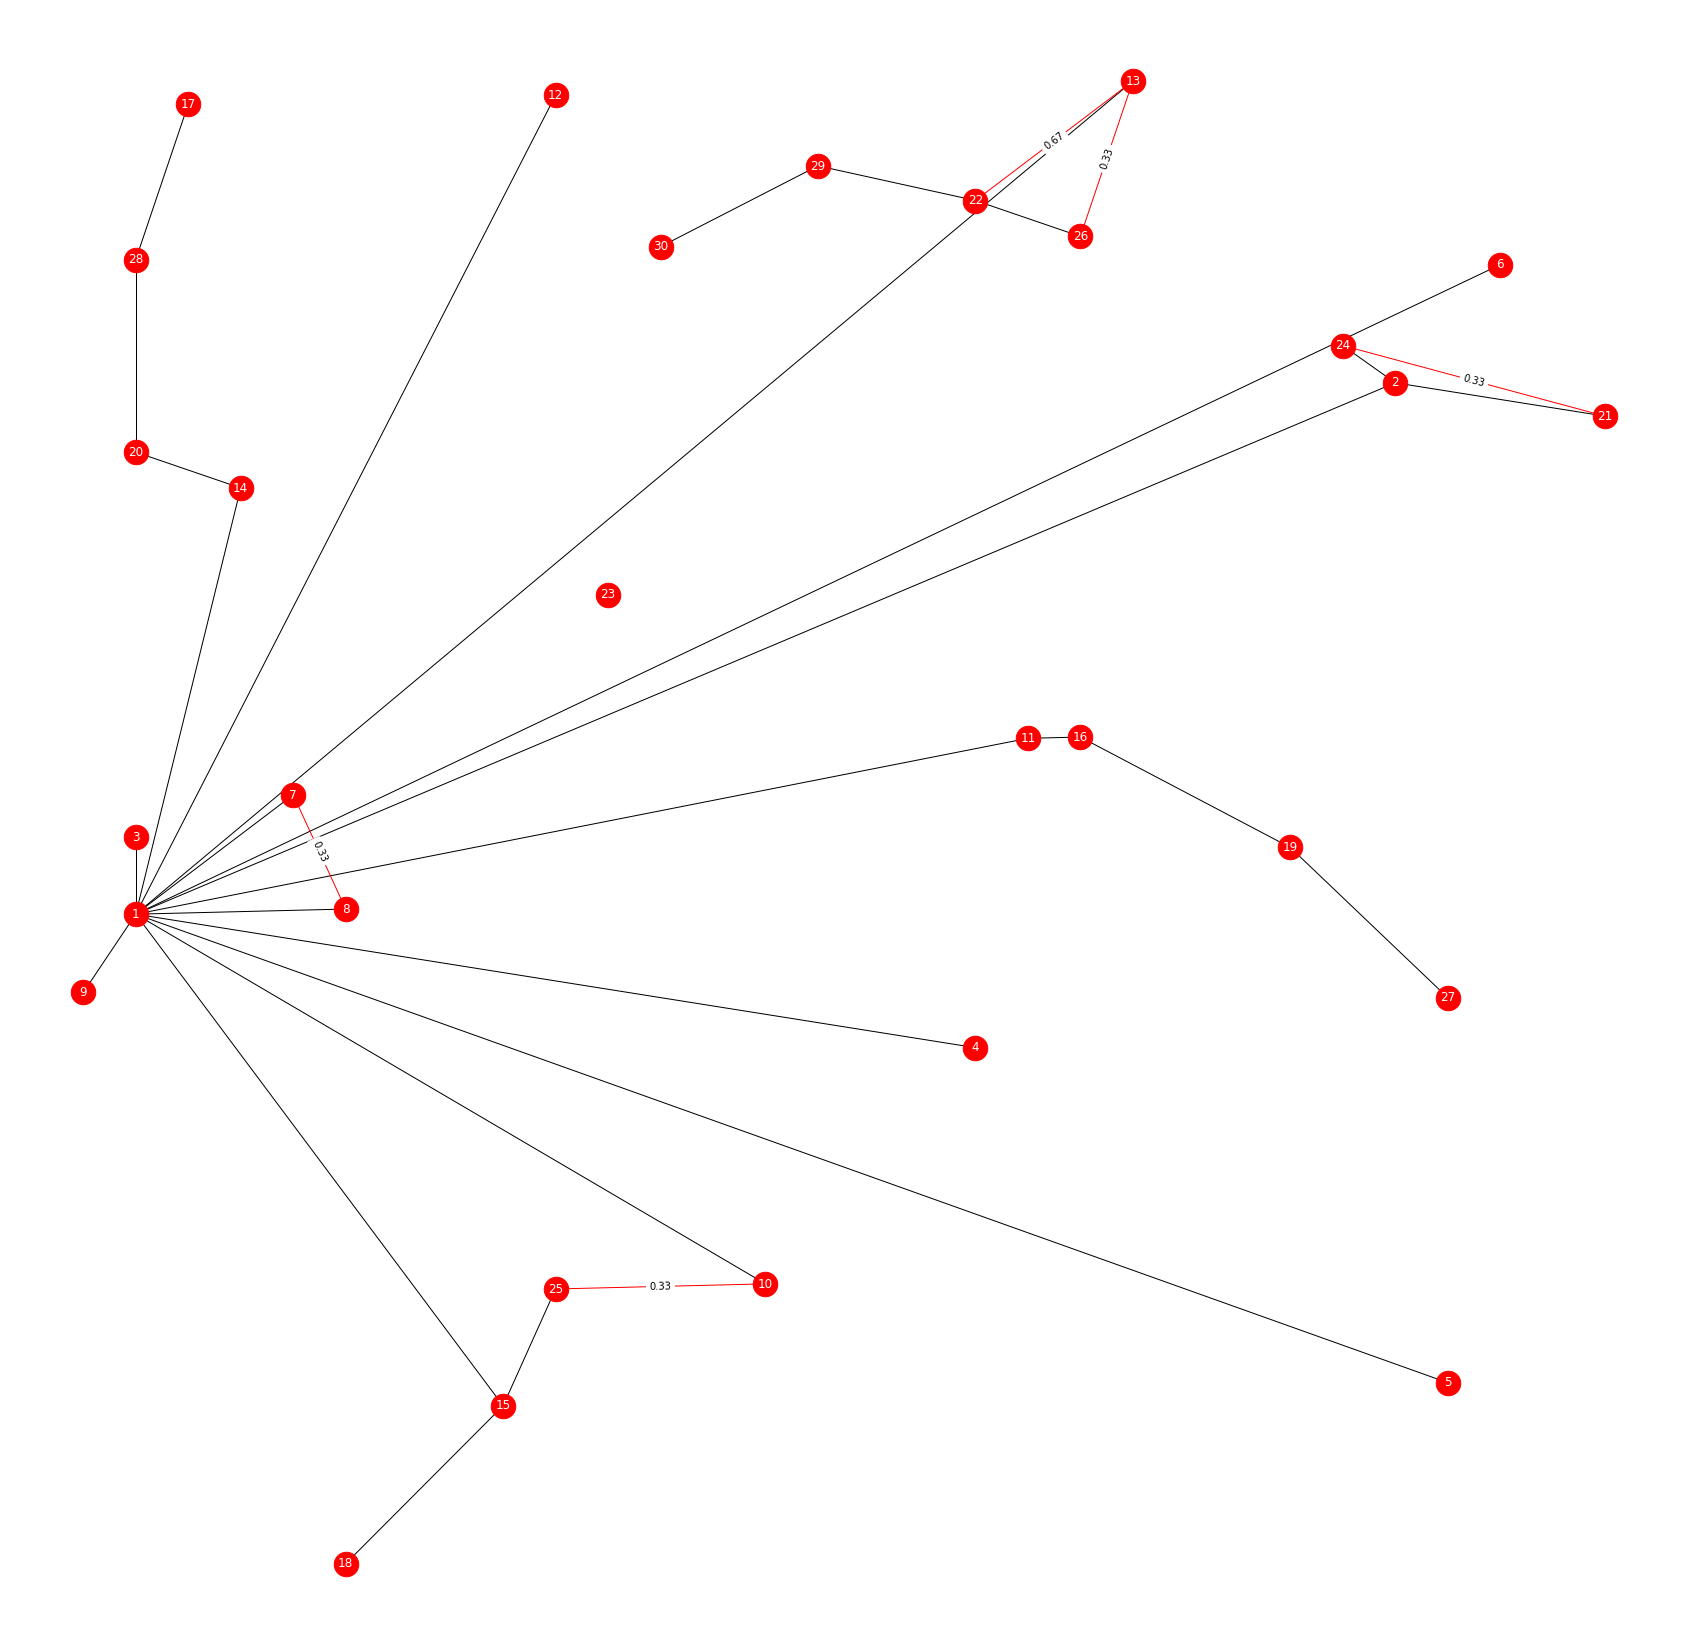

Found violated subtour. S = [1, 2, 7, 8, 10, 11, 13, 14, 15, 16, 20, 21, 24, 25]
Press Enter to continue...

Current solution value: 5864.0


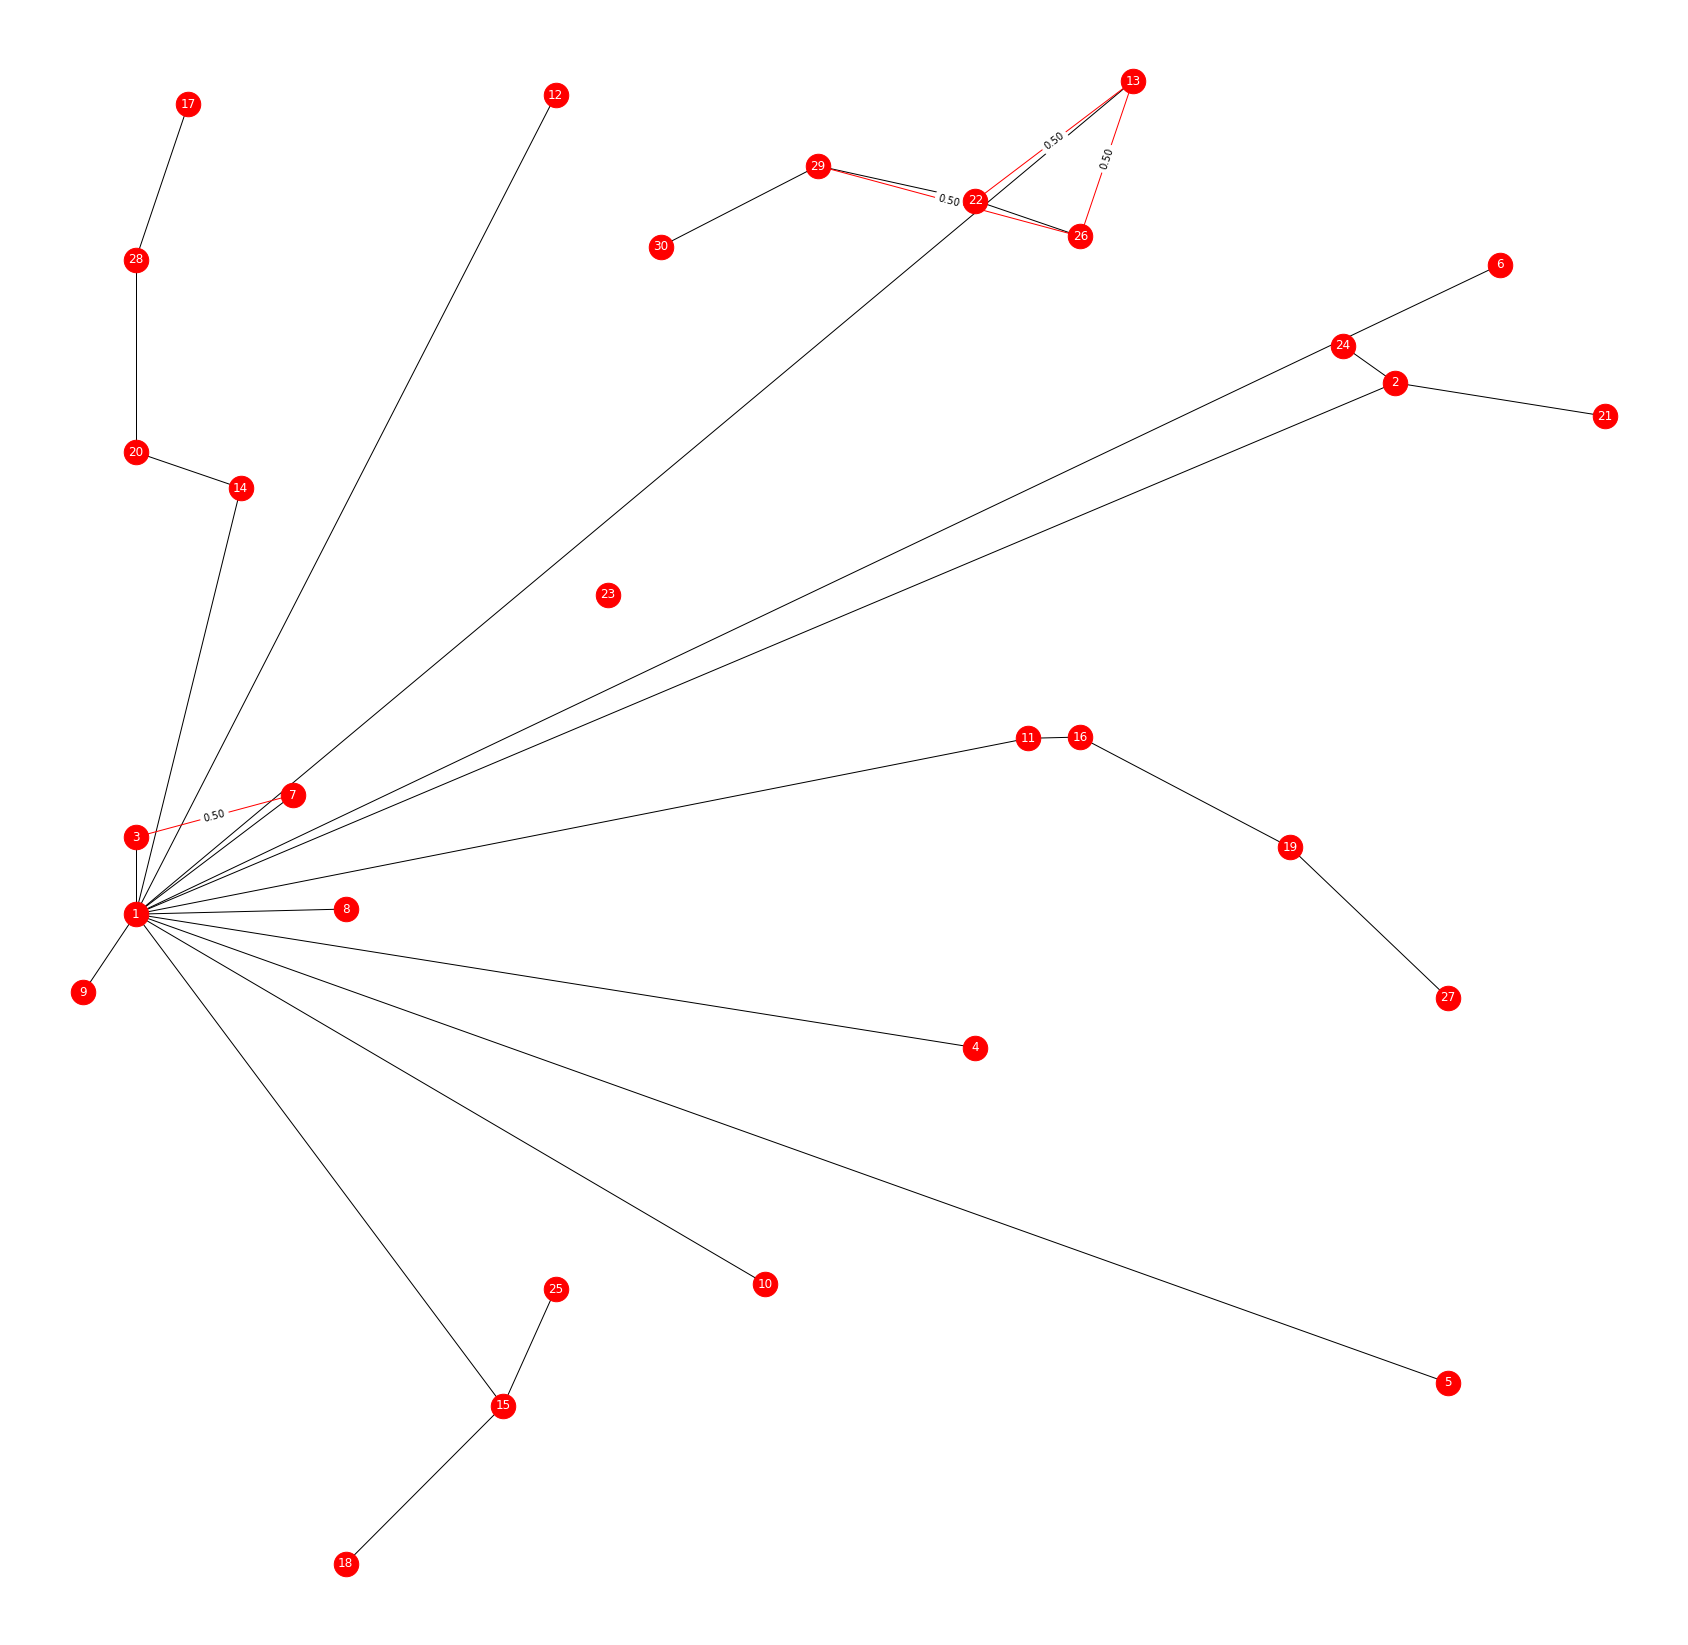

Found violated subtour. S = [1, 2, 3, 7, 11, 13, 14, 15, 16, 20, 22, 26, 29]
Press Enter to continue...

Current solution value: 5878.0


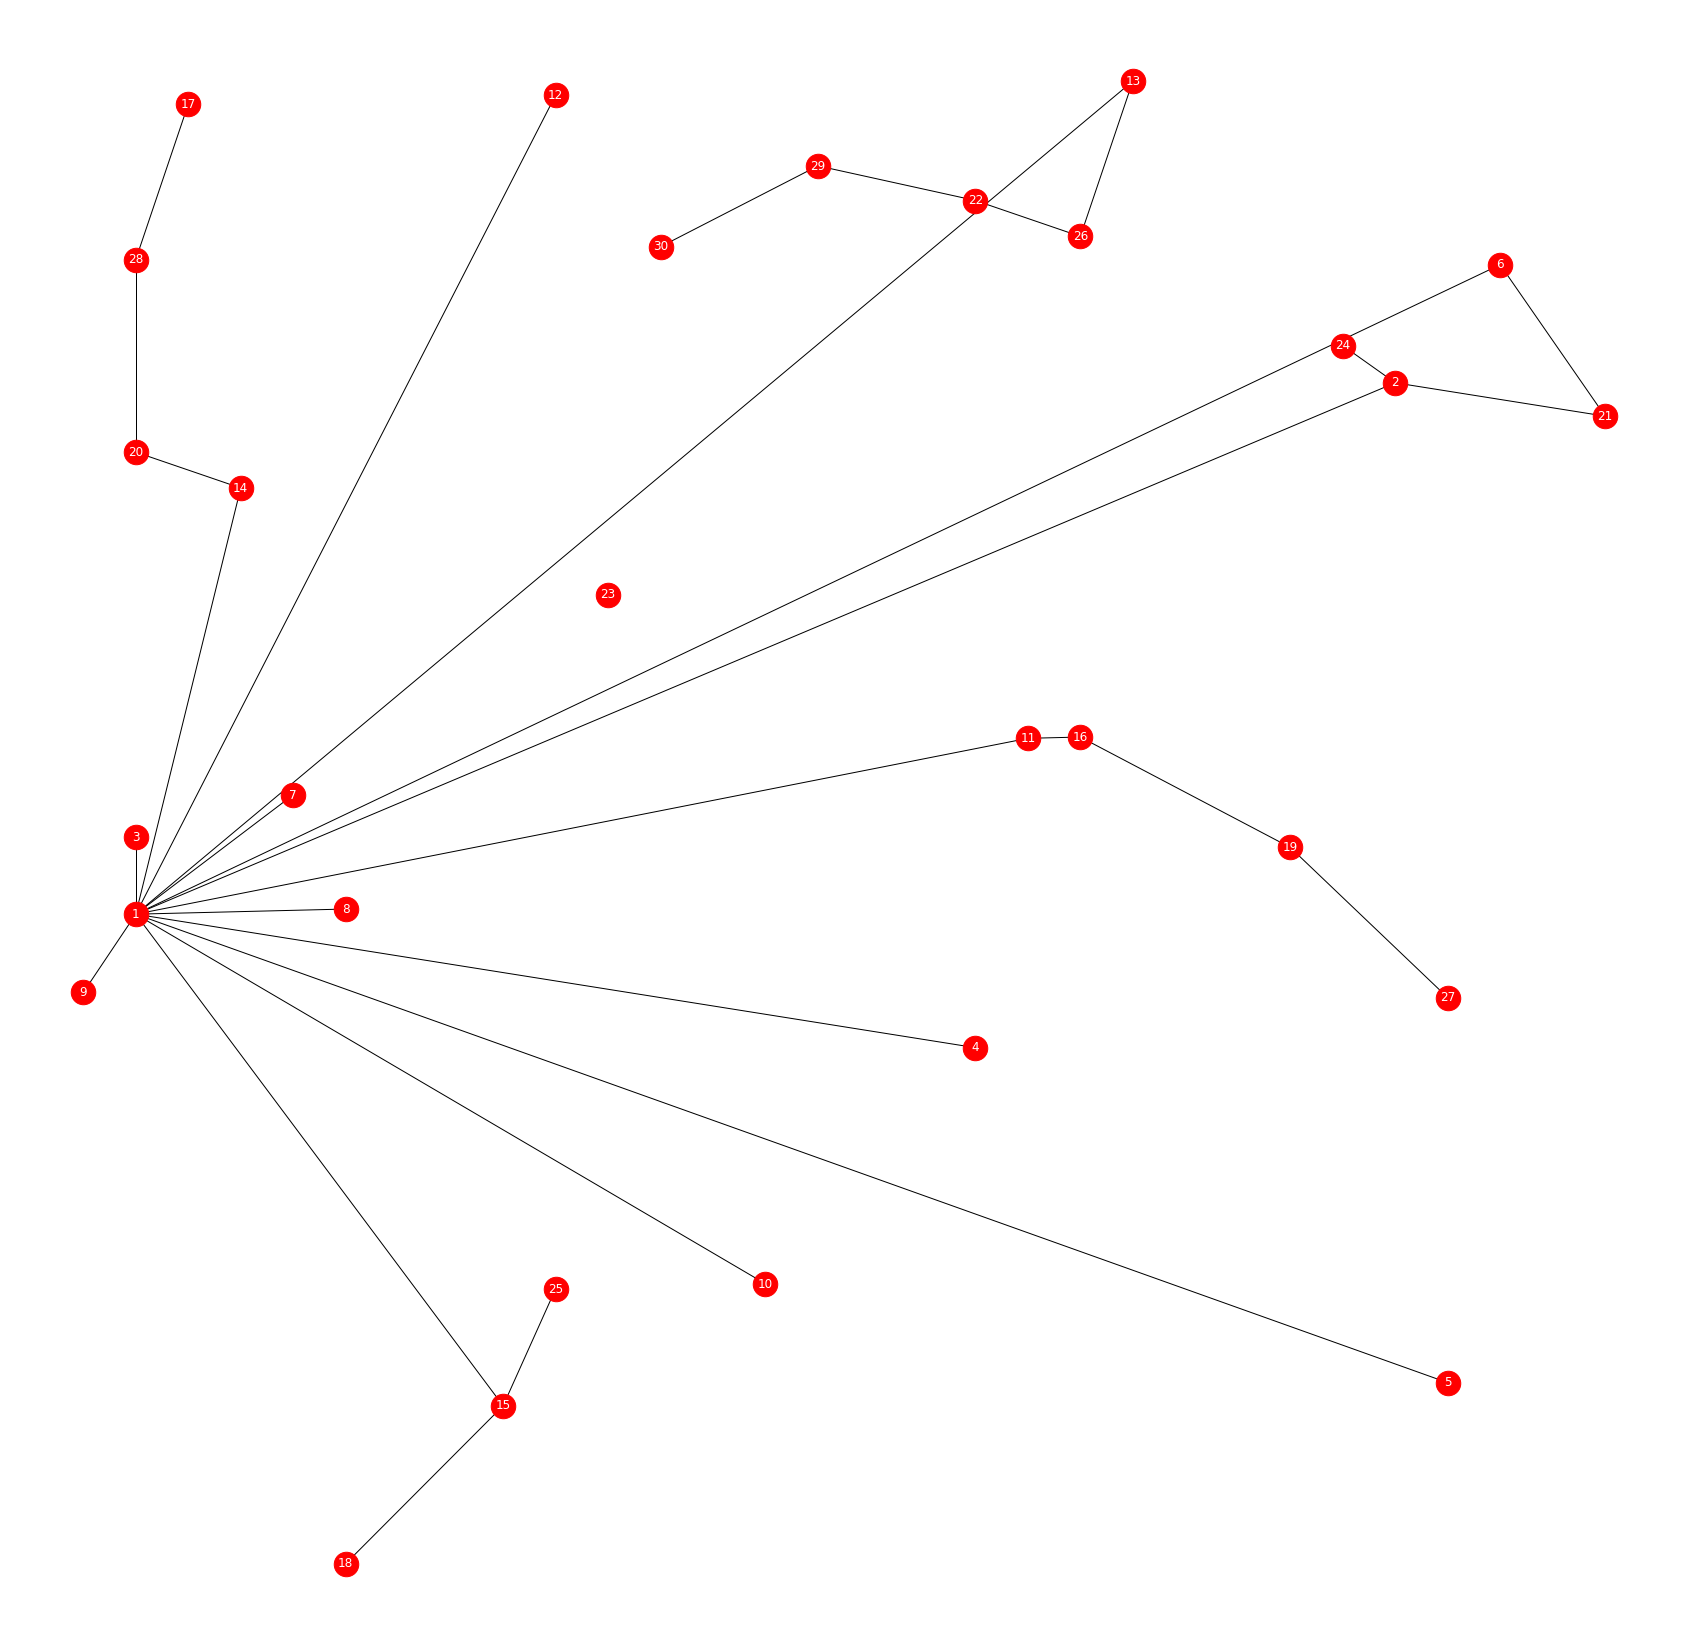

Found violated subtour. S = [1, 2, 6, 11, 13, 14, 15, 16, 20, 21, 26]
Press Enter to continue...

Current solution value: 5878.0


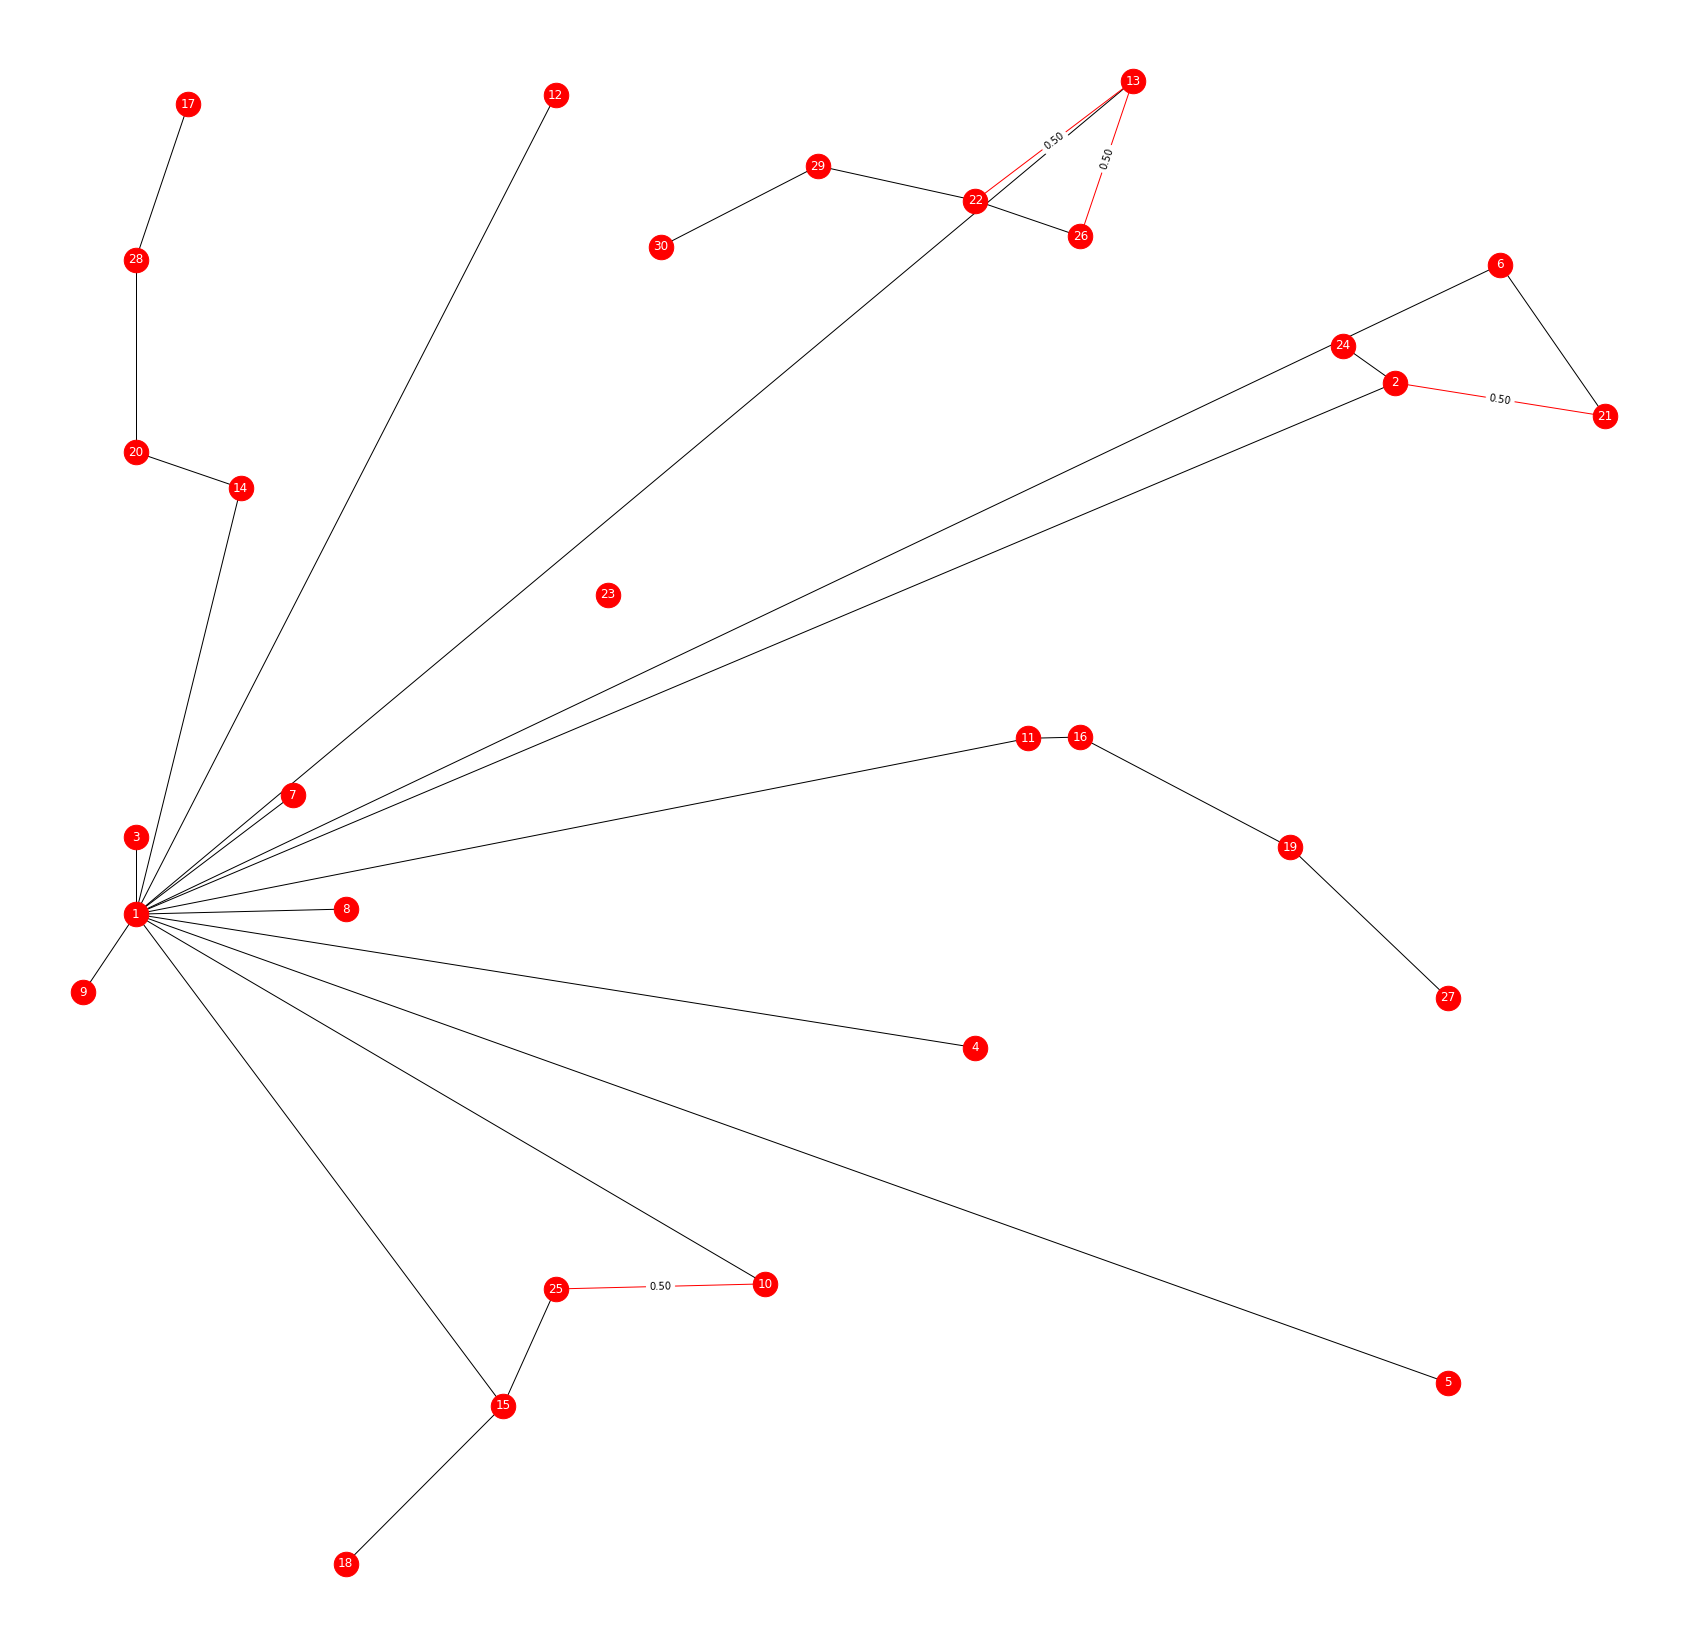

Found violated subtour. S = [1, 2, 6, 10, 11, 13, 14, 15, 16, 20, 21, 25]
Press Enter to continue...

Current solution value: 5878.0


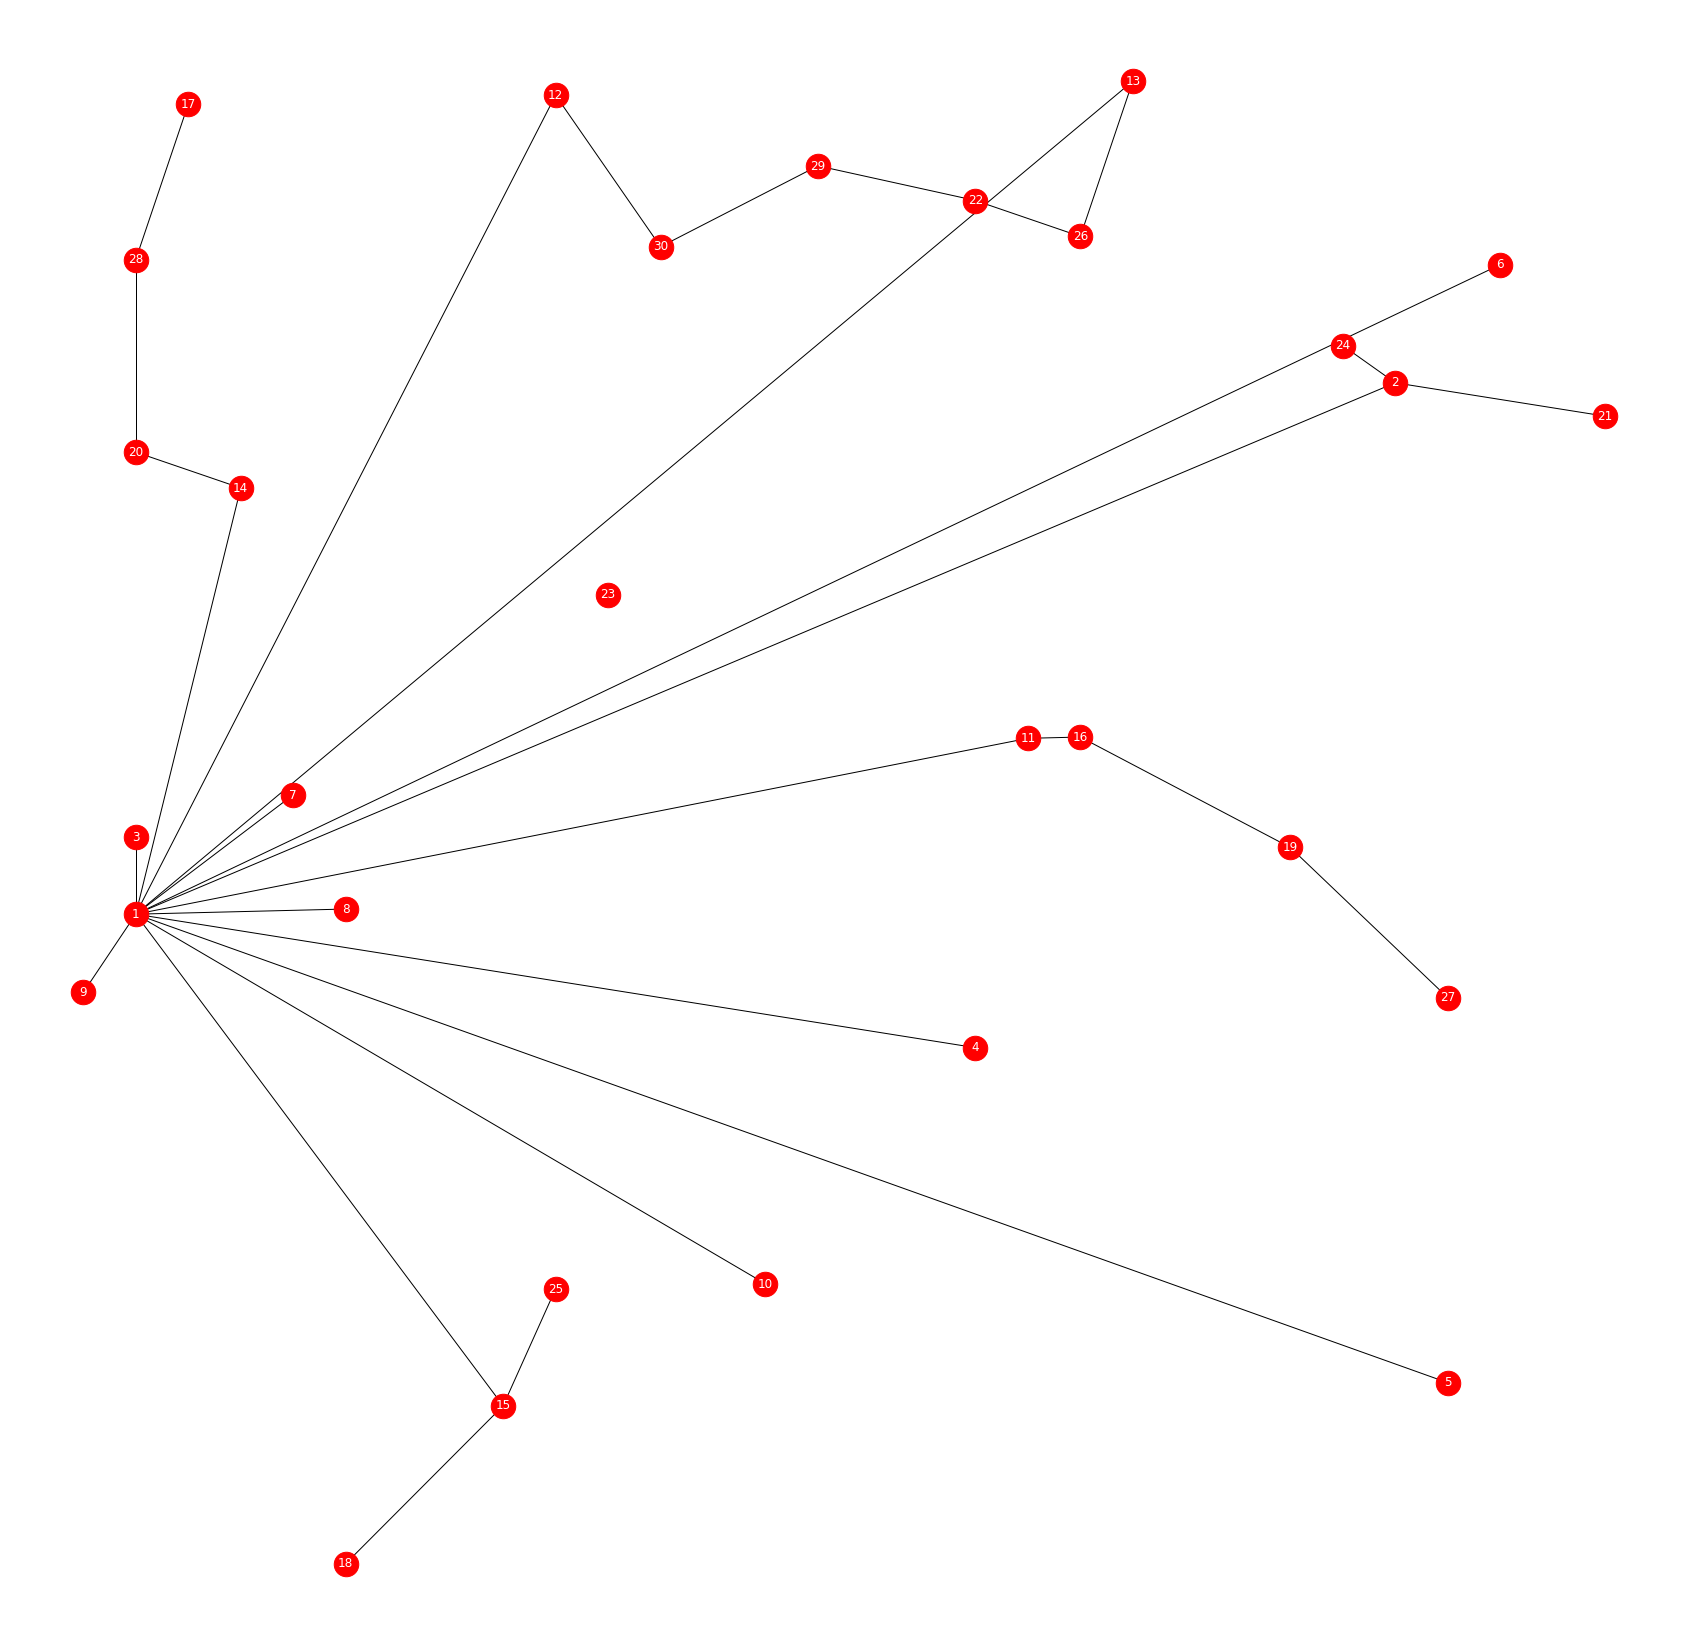

Found violated subtour. S = [1, 2, 11, 12, 13, 14, 15, 16, 20, 22, 26, 29, 30]
Press Enter to continue...

Current solution value: 5893.0


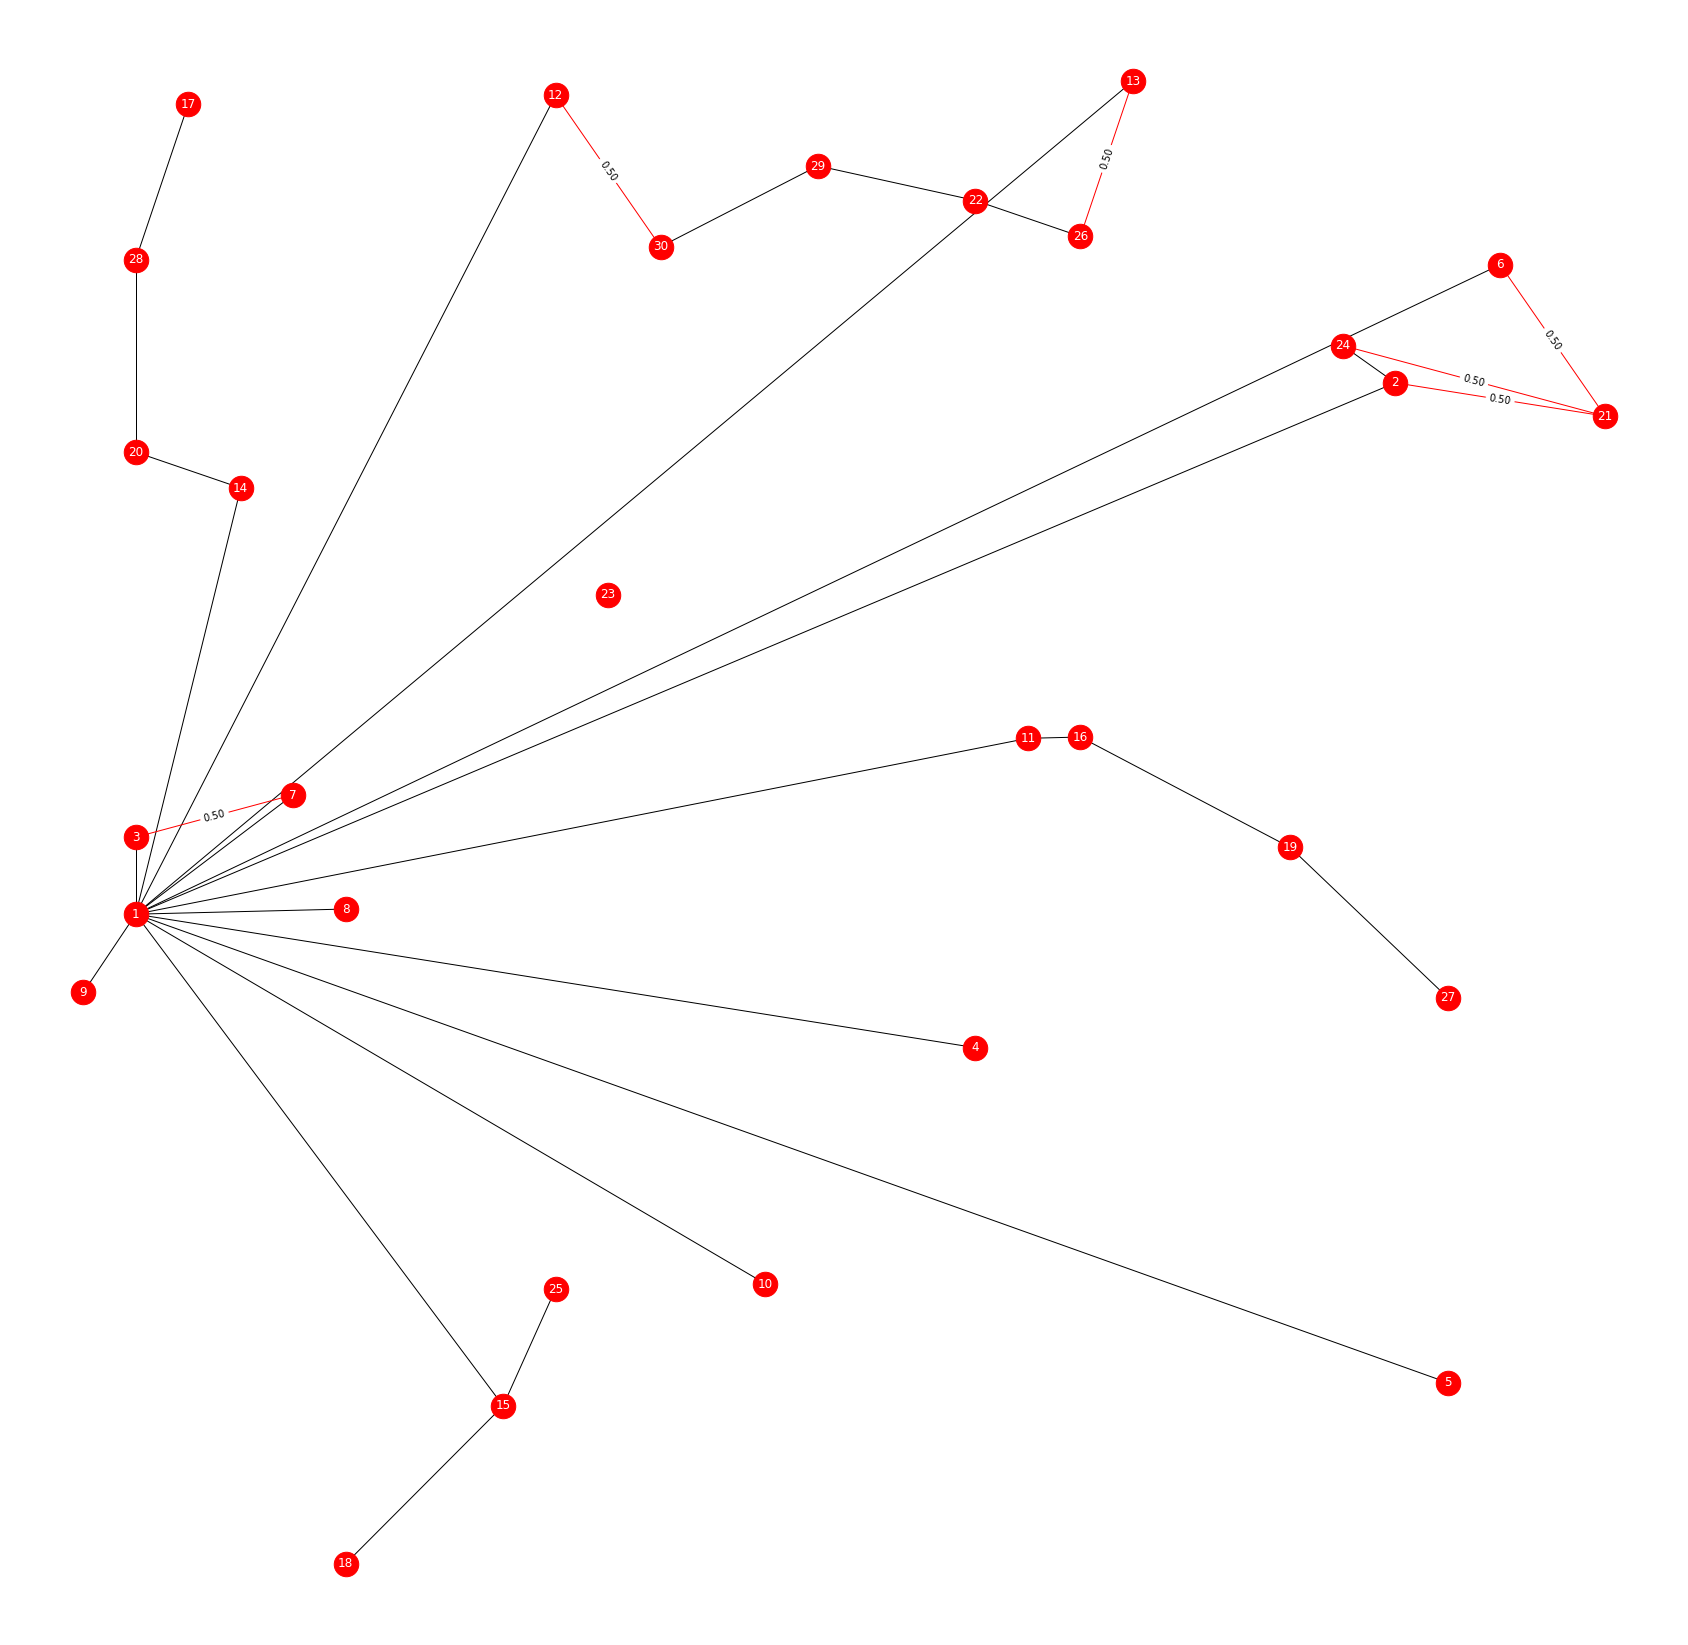

Found violated subtour. S = [1, 2, 3, 6, 7, 11, 12, 13, 14, 15, 16, 20, 21, 24]
Press Enter to continue...

Current solution value: 5898.0


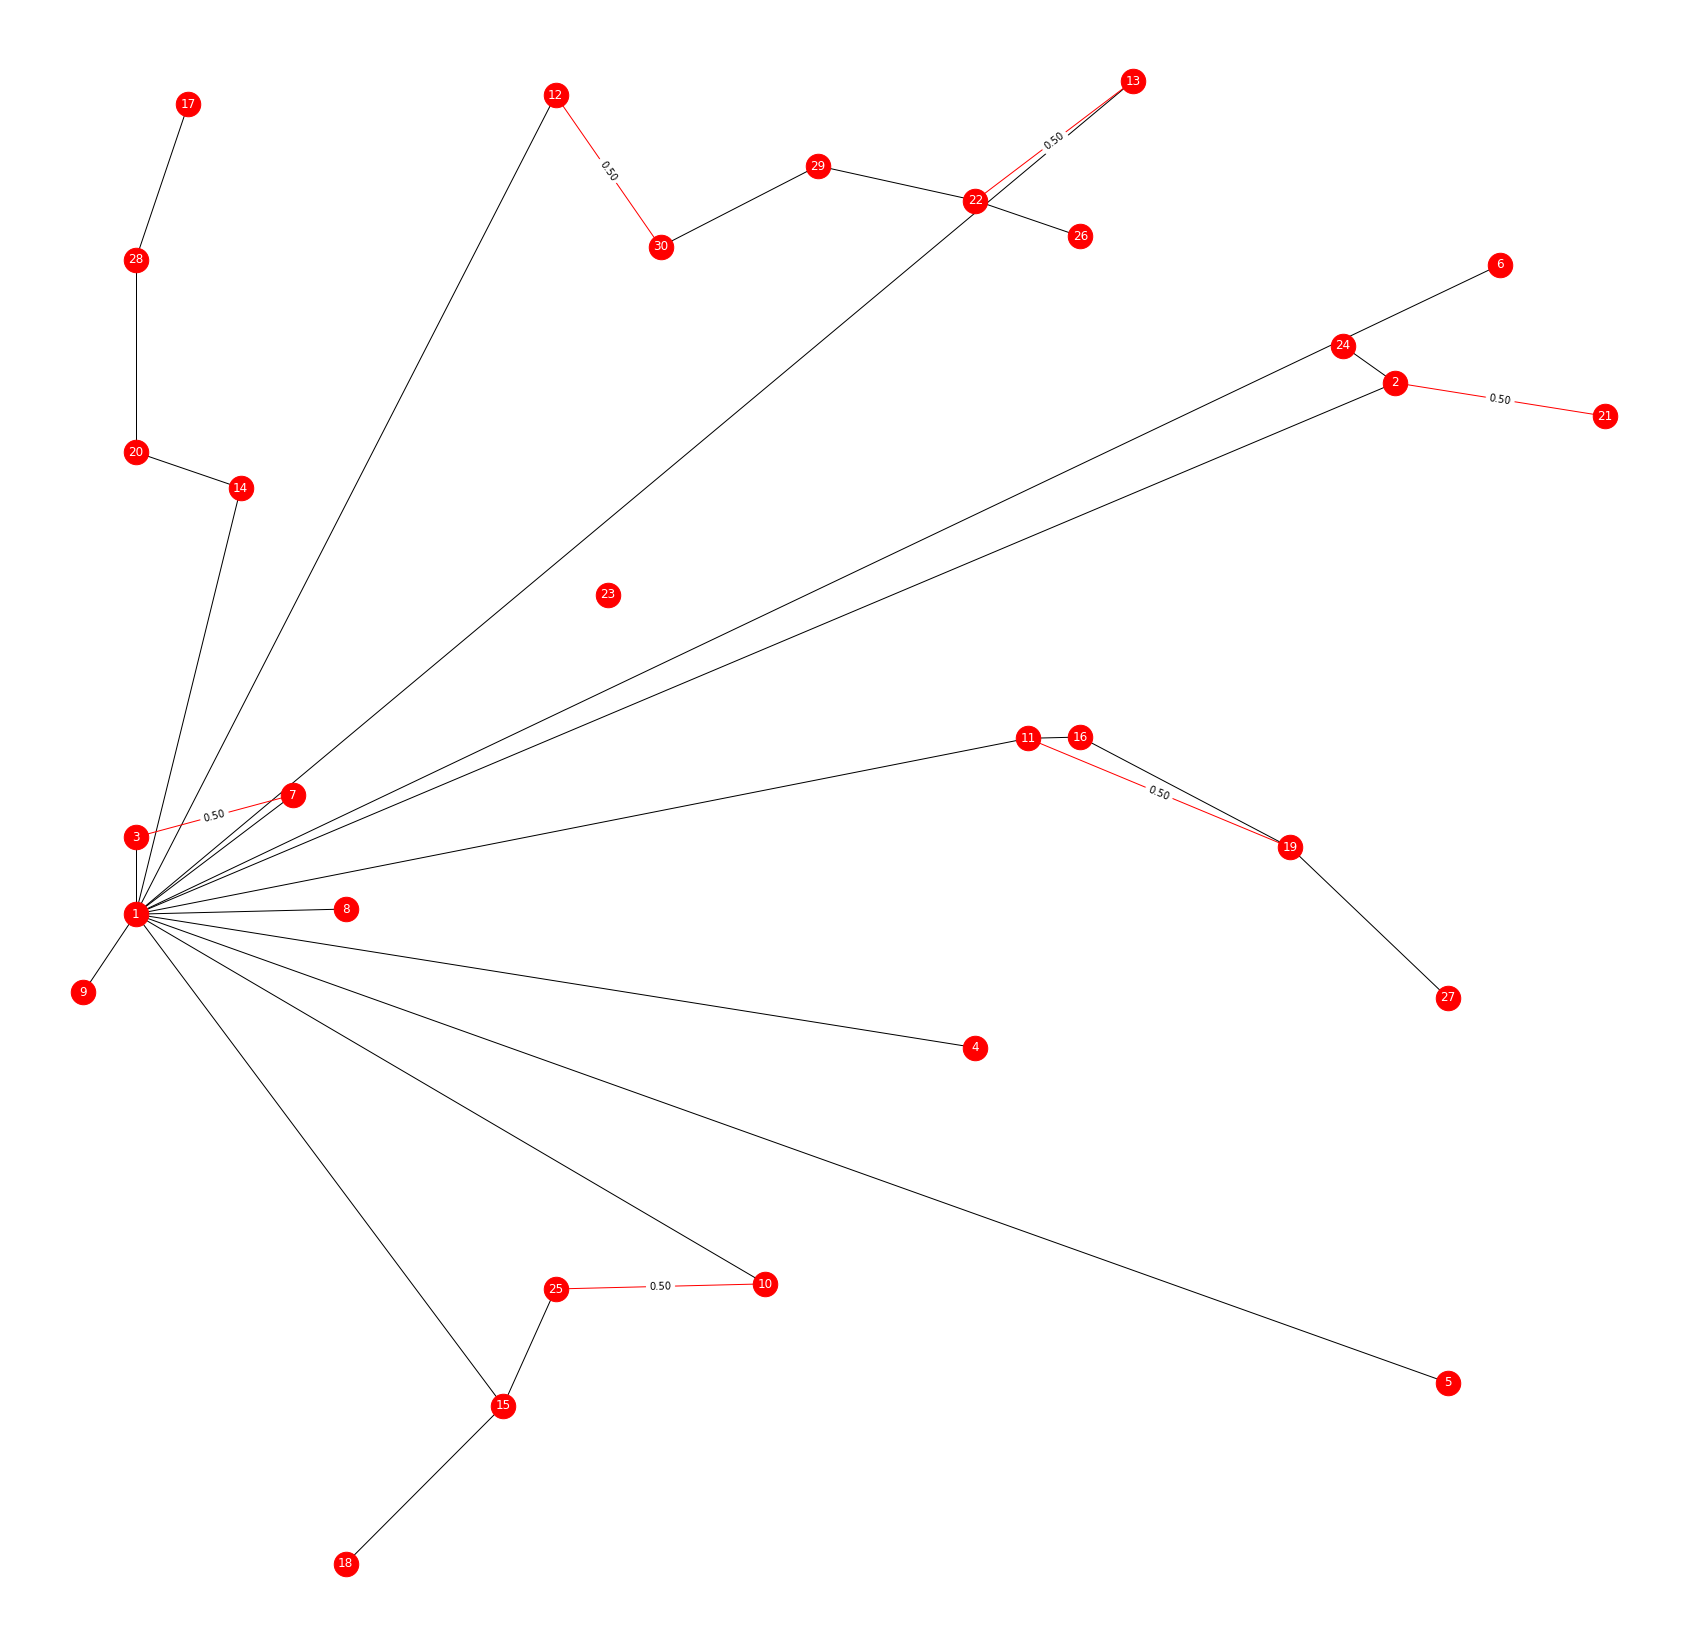

Found violated subtour. S = [1, 2, 3, 7, 10, 11, 12, 13, 14, 15, 16, 19, 20, 25]
Press Enter to continue...

Current solution value: 5908.0


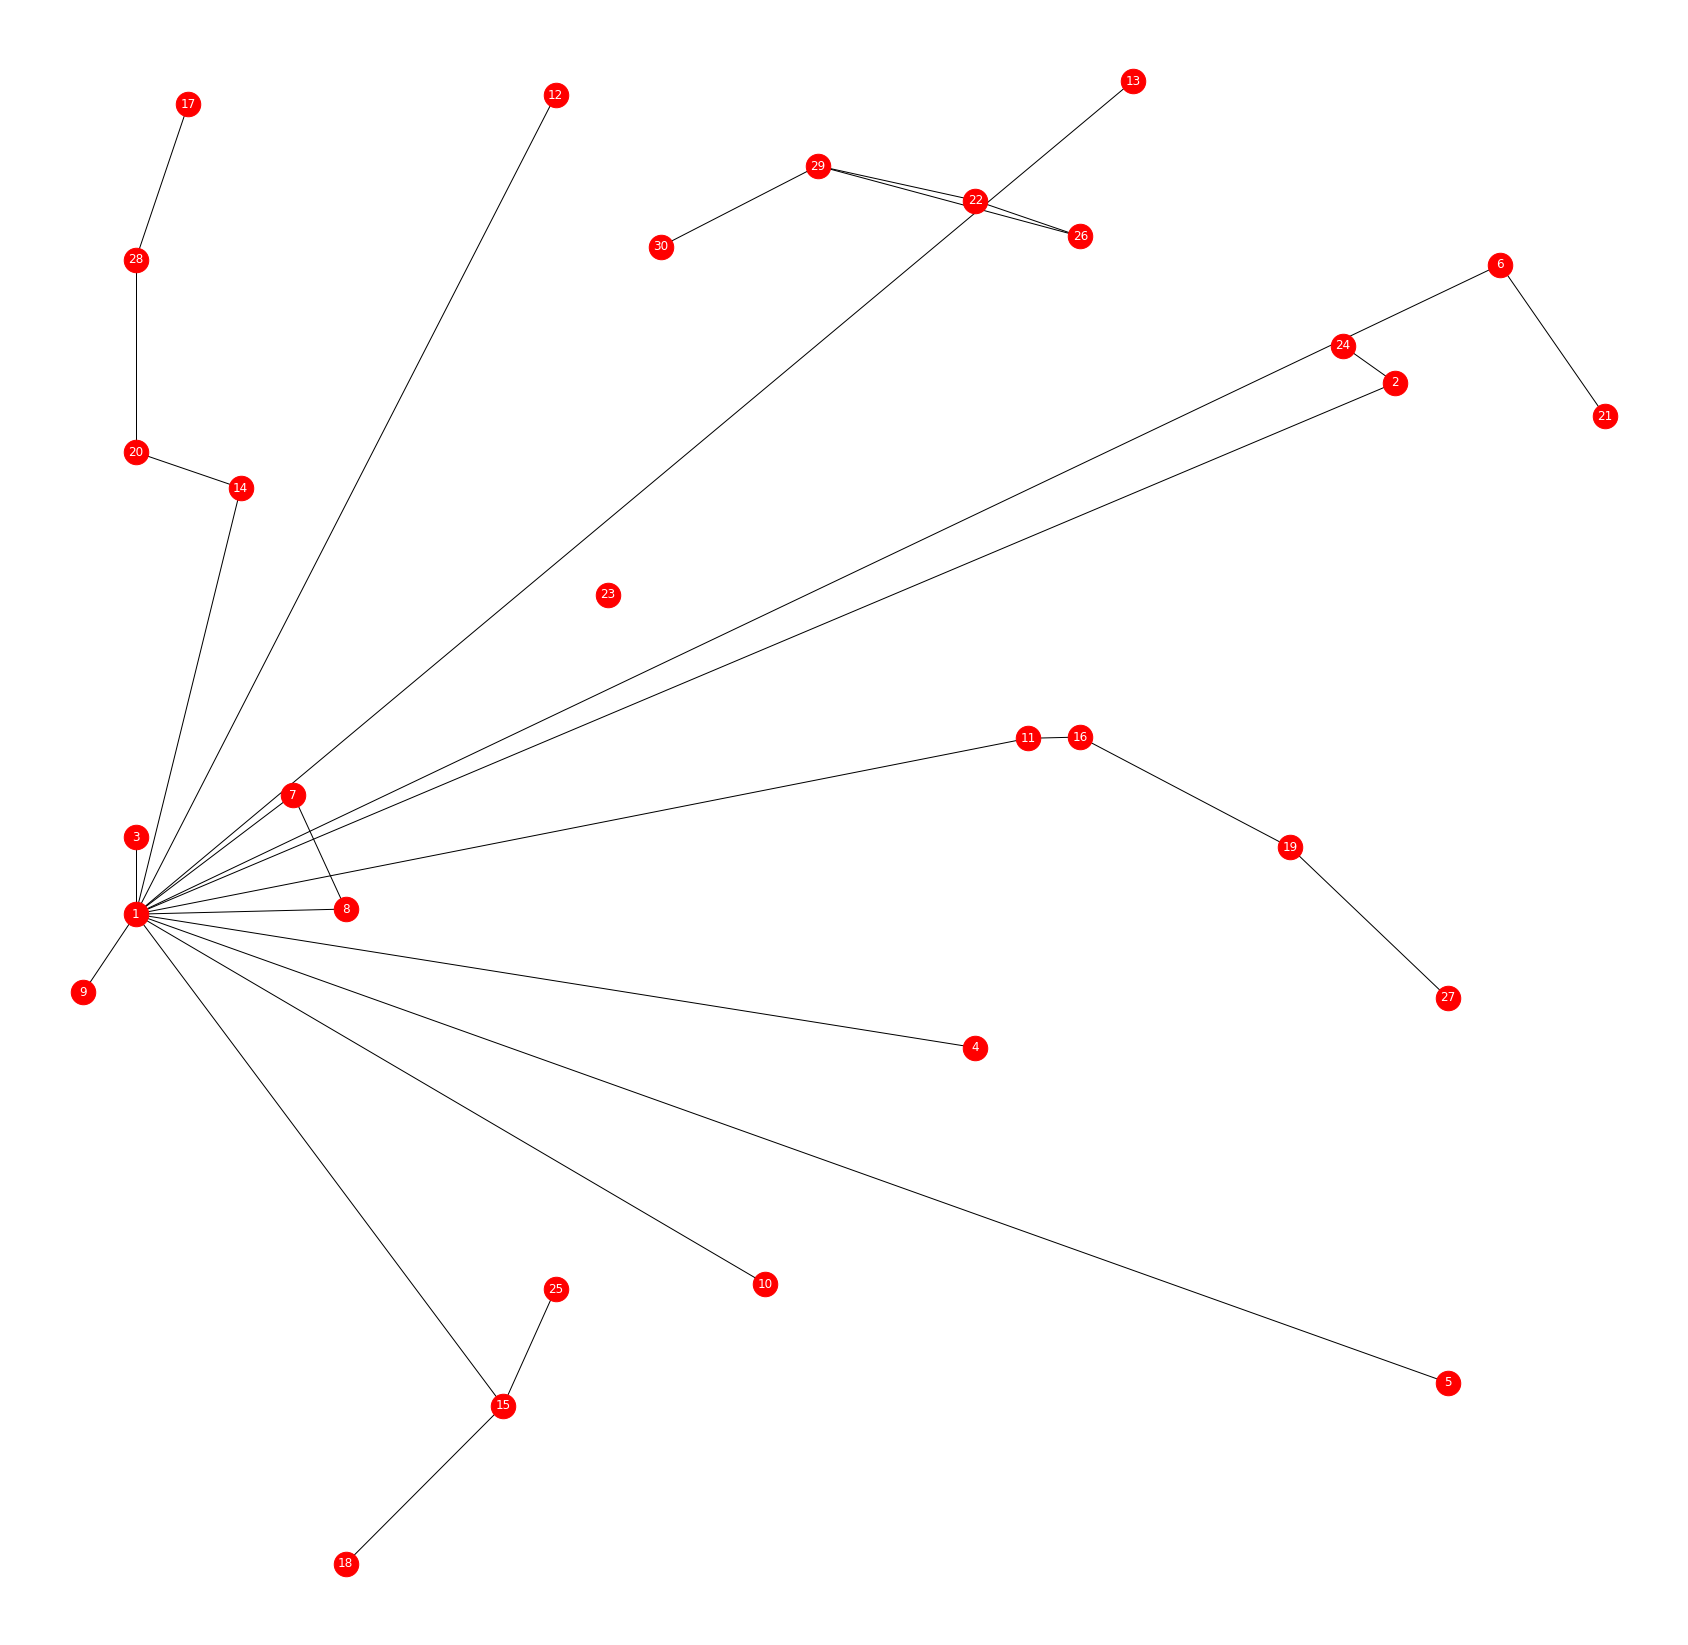

Found violated subtour. S = [1, 2, 6, 7, 8, 11, 14, 15, 16, 20]
Press Enter to continue...

Current solution value: 5941.666666666666


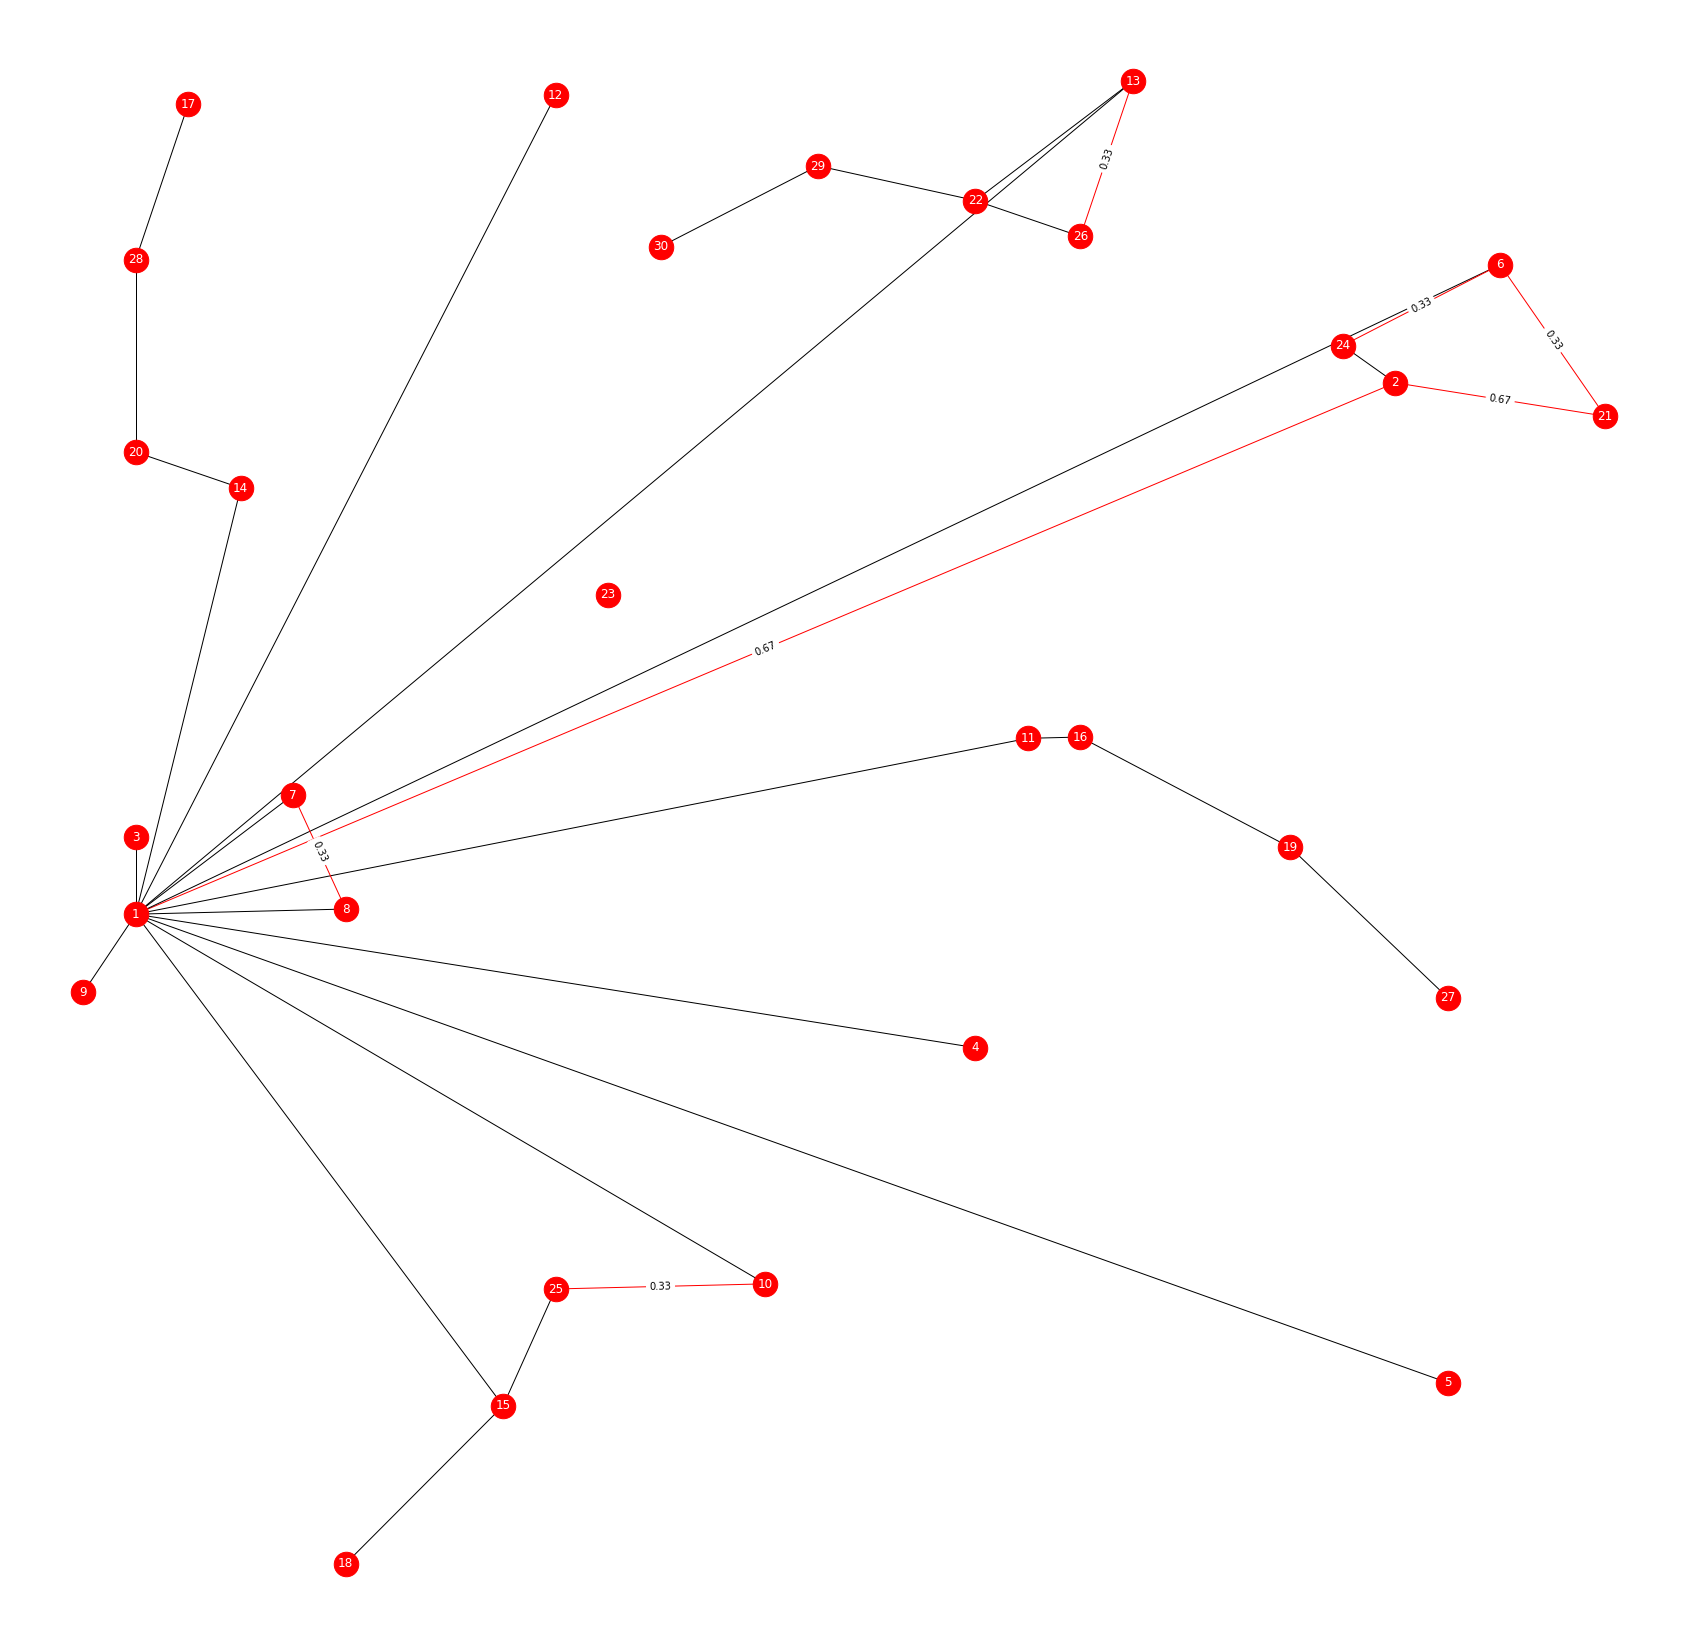

Found violated subtour. S = [1, 6, 7, 8, 10, 11, 13, 14, 15, 16, 20, 22, 25, 26]
Press Enter to continue...

Current solution value: 5951.857142857142


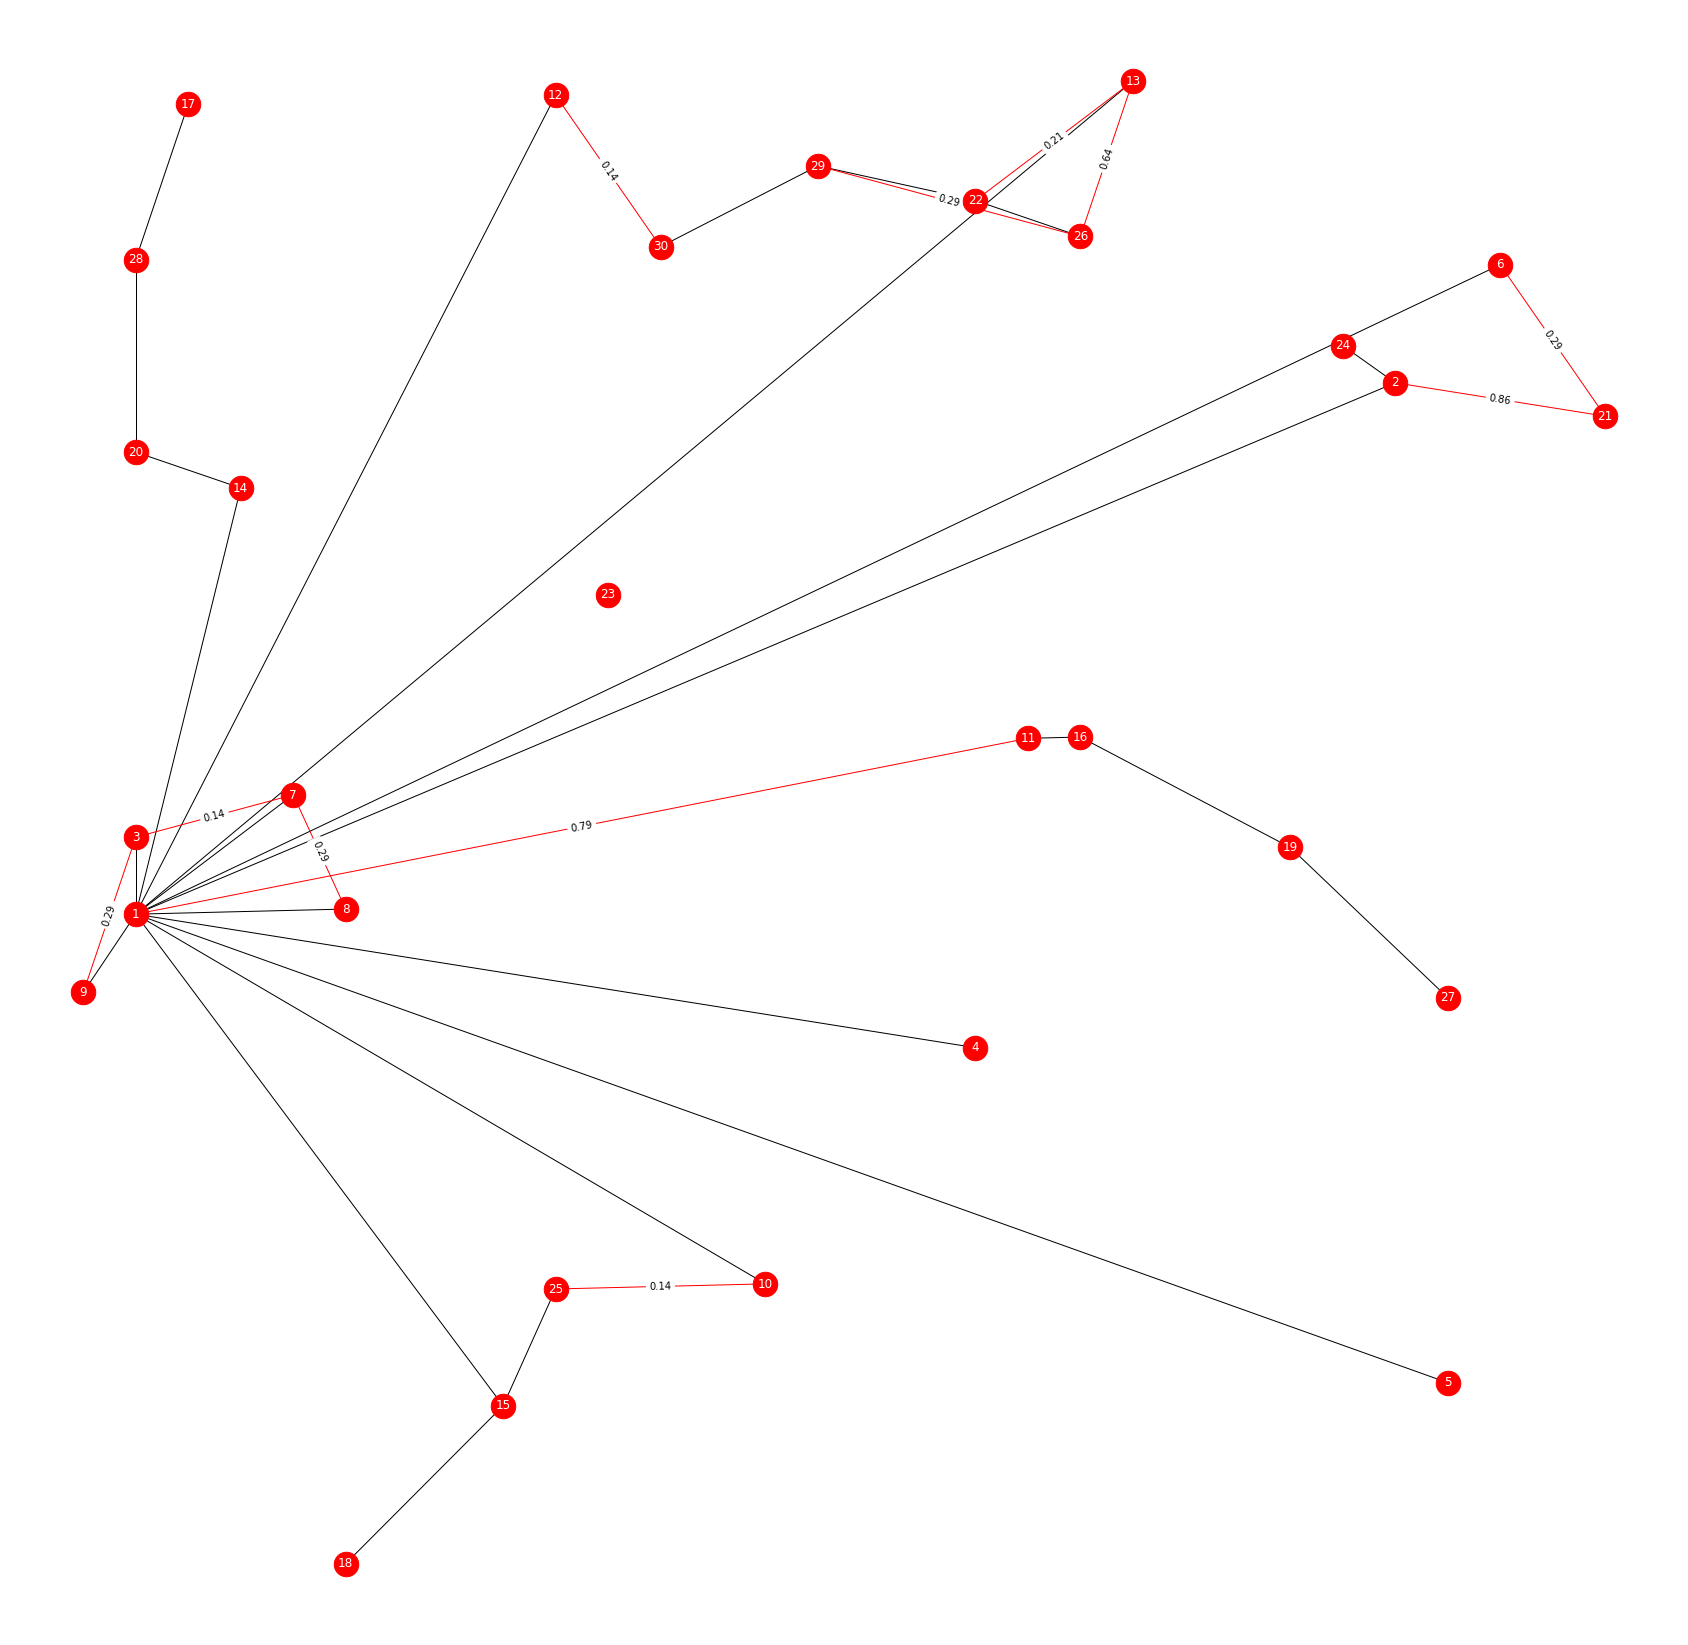

Found violated subtour. S = [1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 15, 21, 22, 25, 26, 29, 30]
Press Enter to continue...

Current solution value: 6001.199999999999


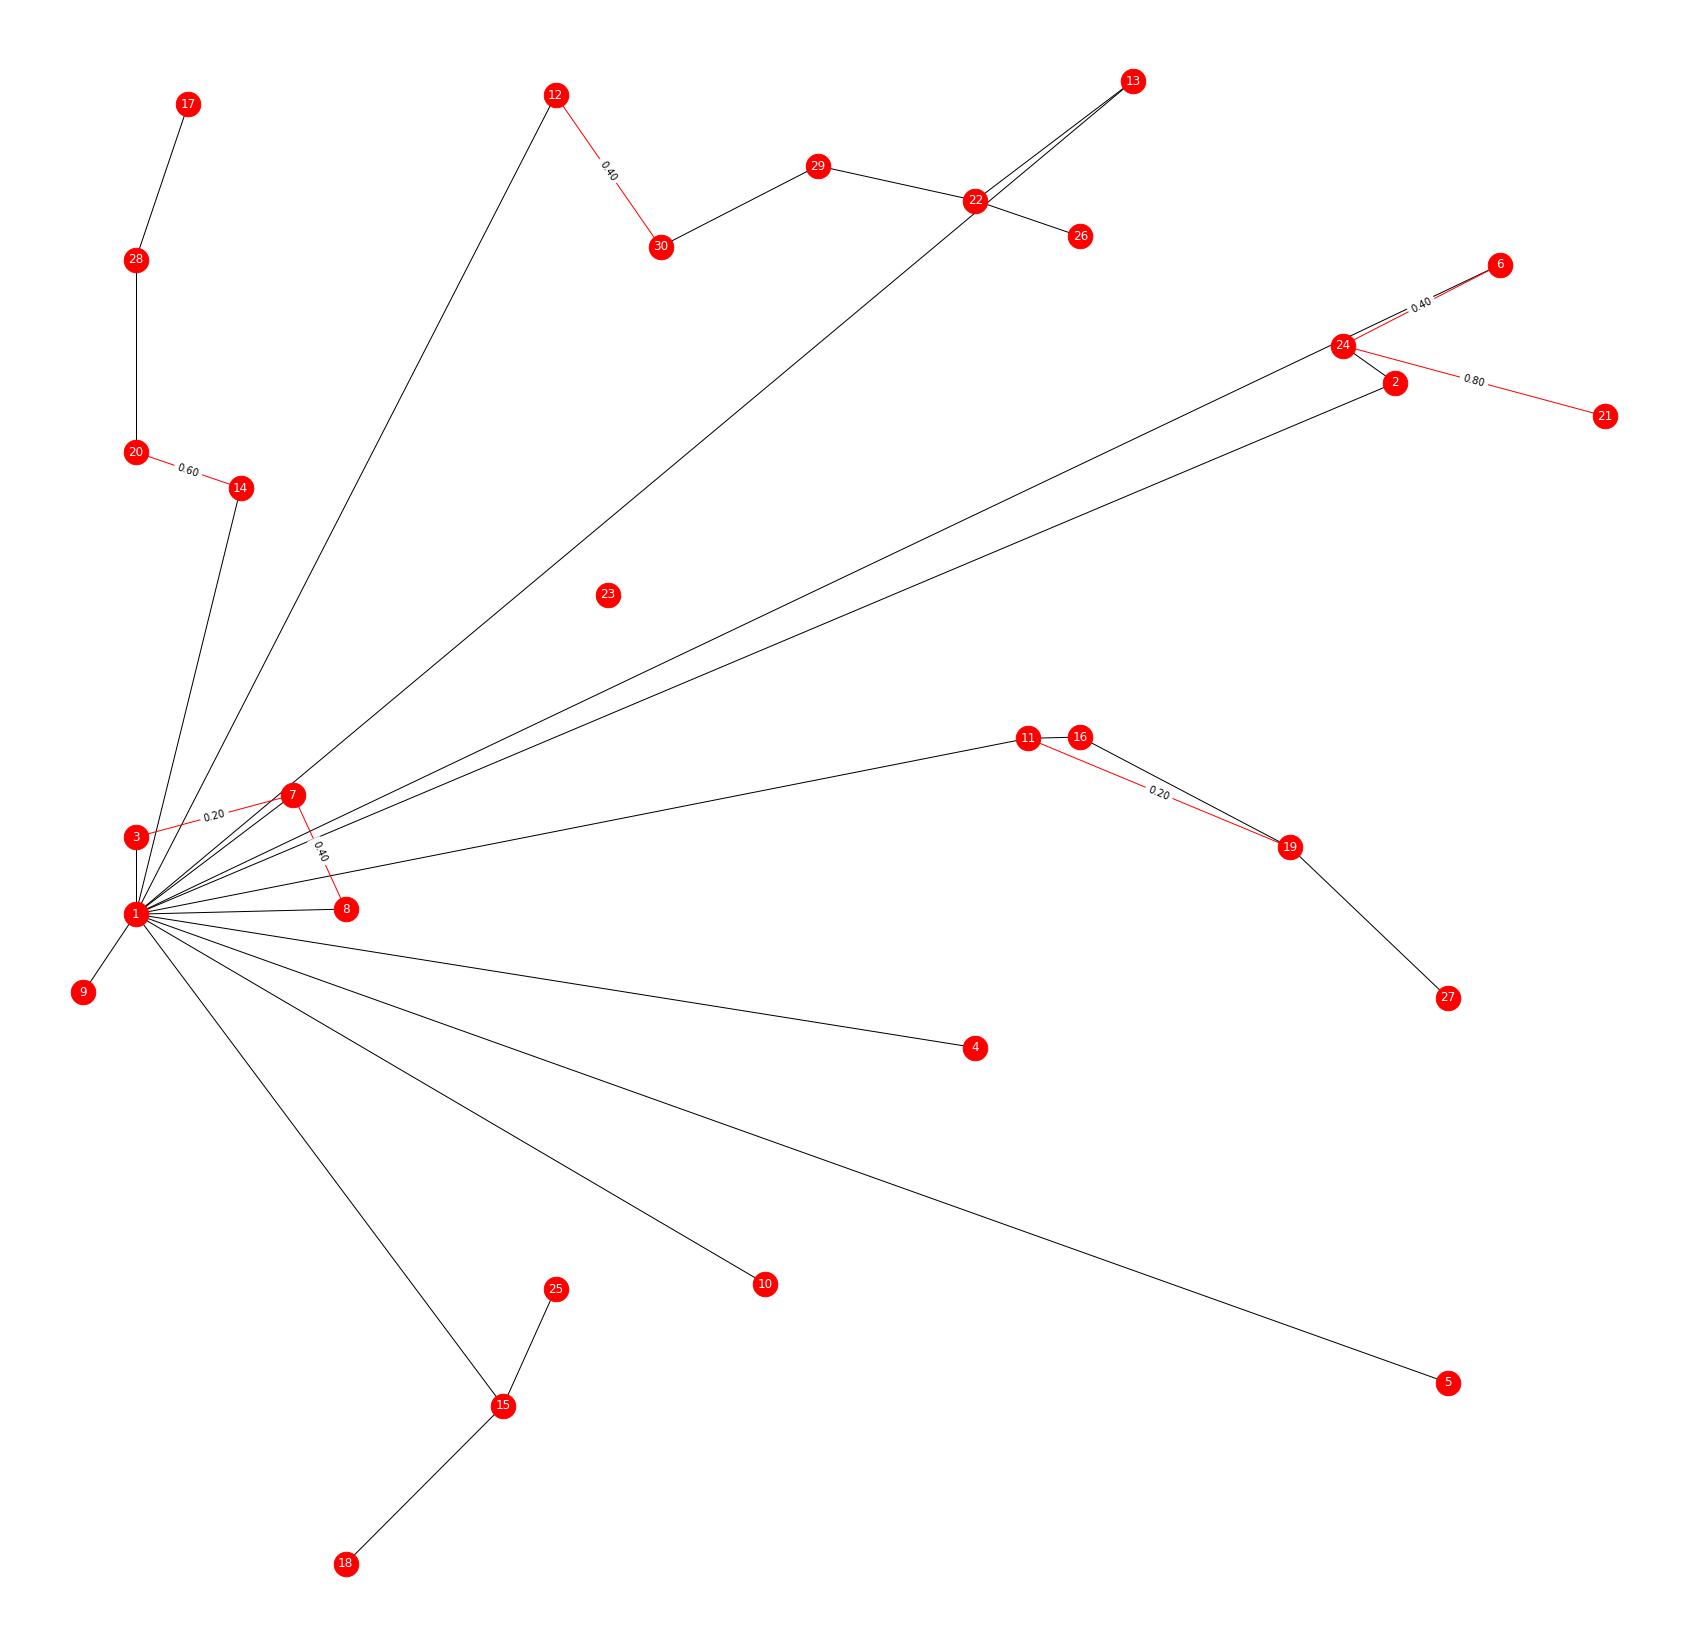

Found violated subtour. S = [1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 19, 22, 24, 29, 30]
Press Enter to continue...

Current solution value: 6026.0


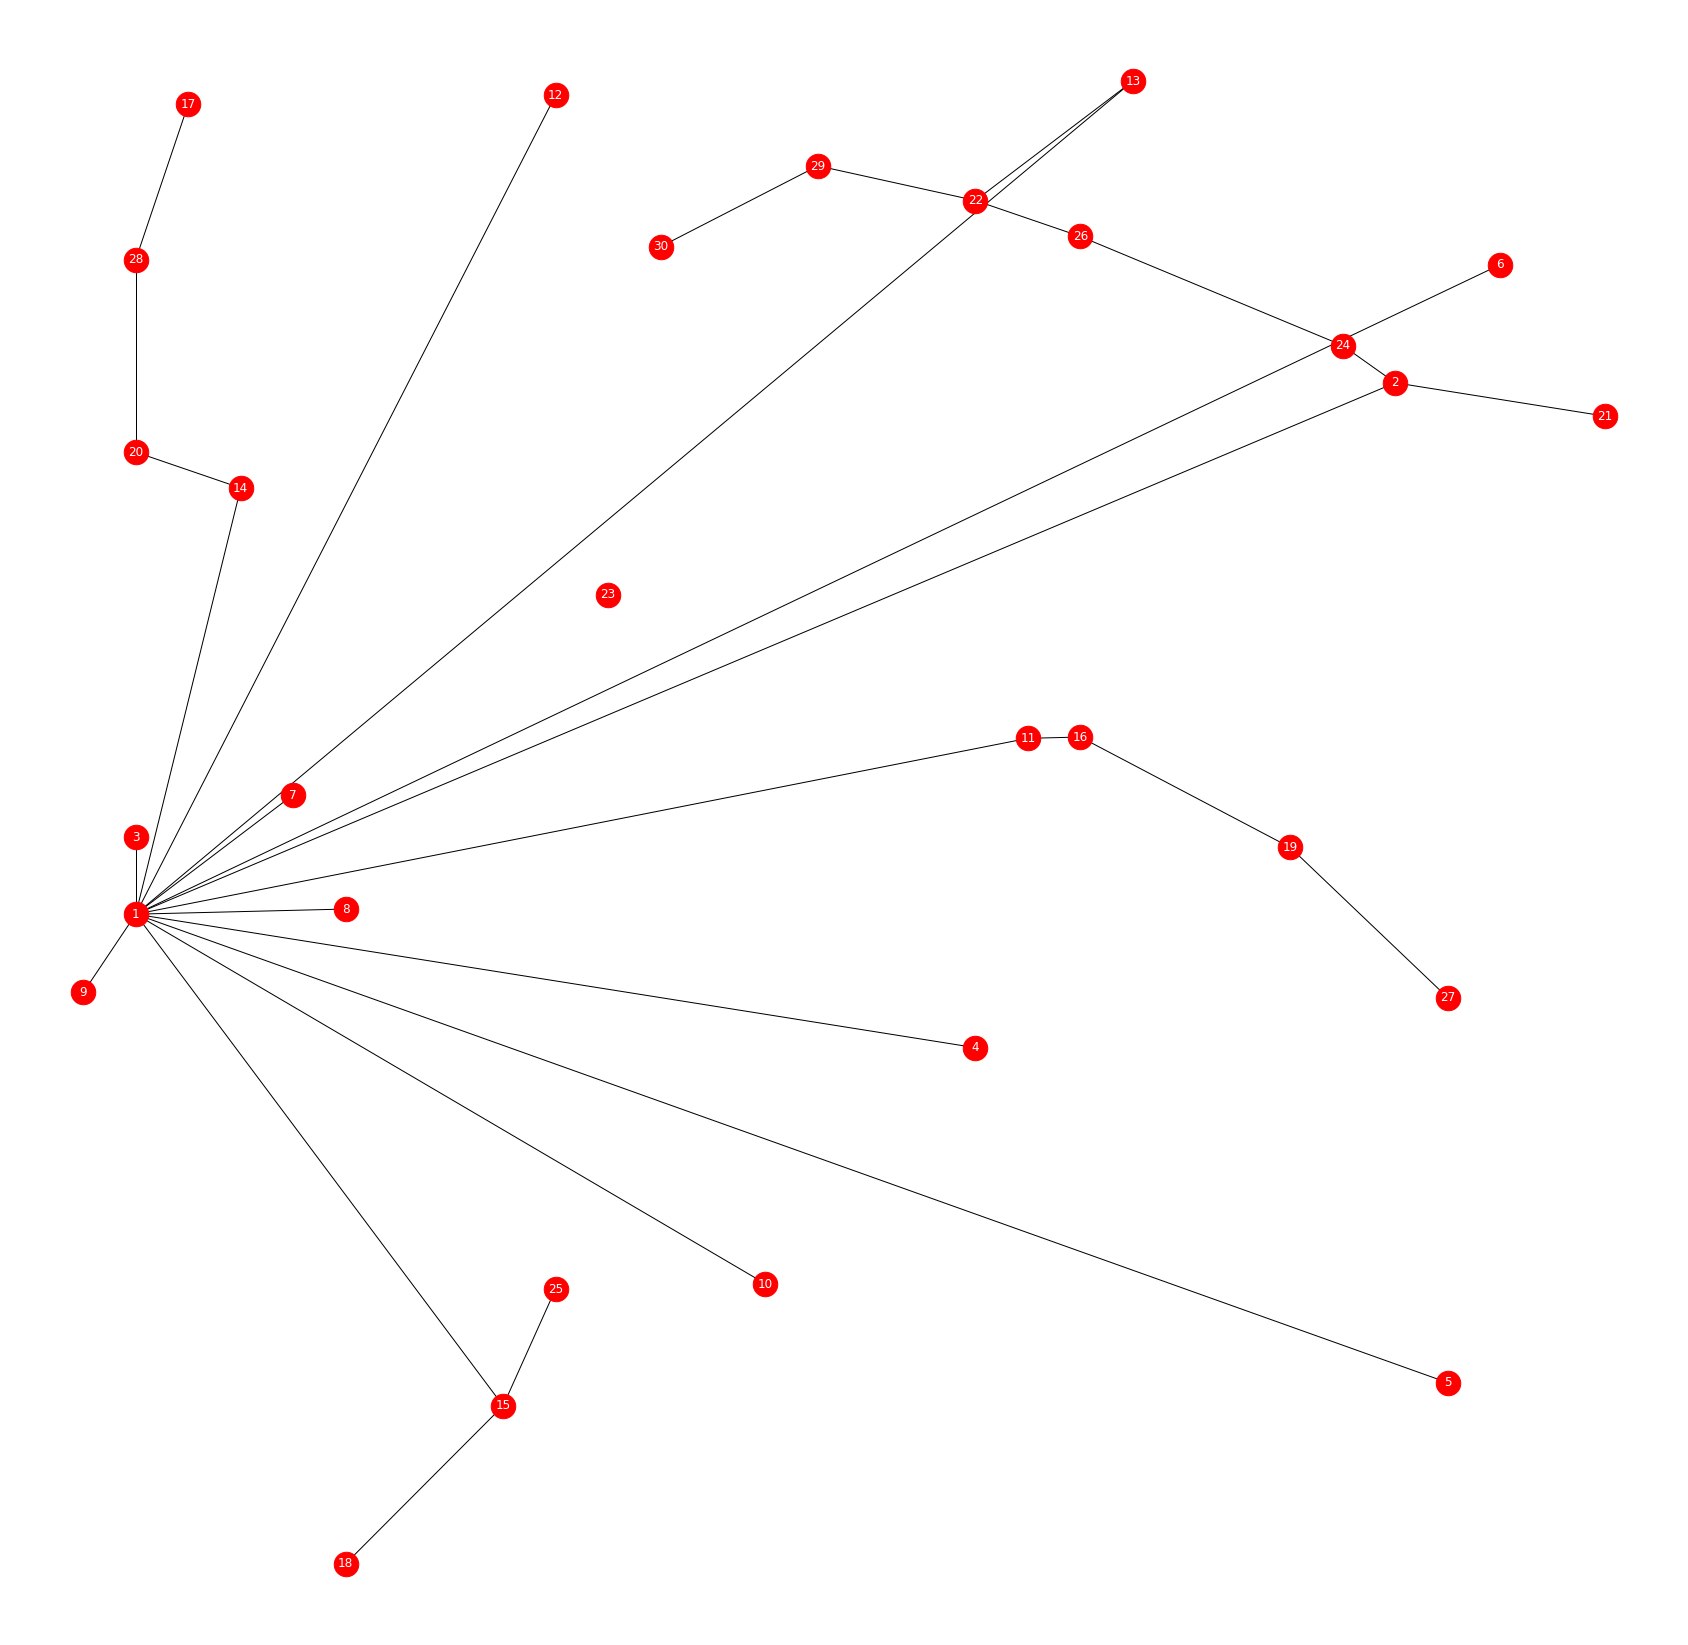

Found violated subtour. S = [1, 2, 11, 13, 14, 15, 16, 20, 22, 24, 26]
Press Enter to continue...

Current solution value: 6035.375


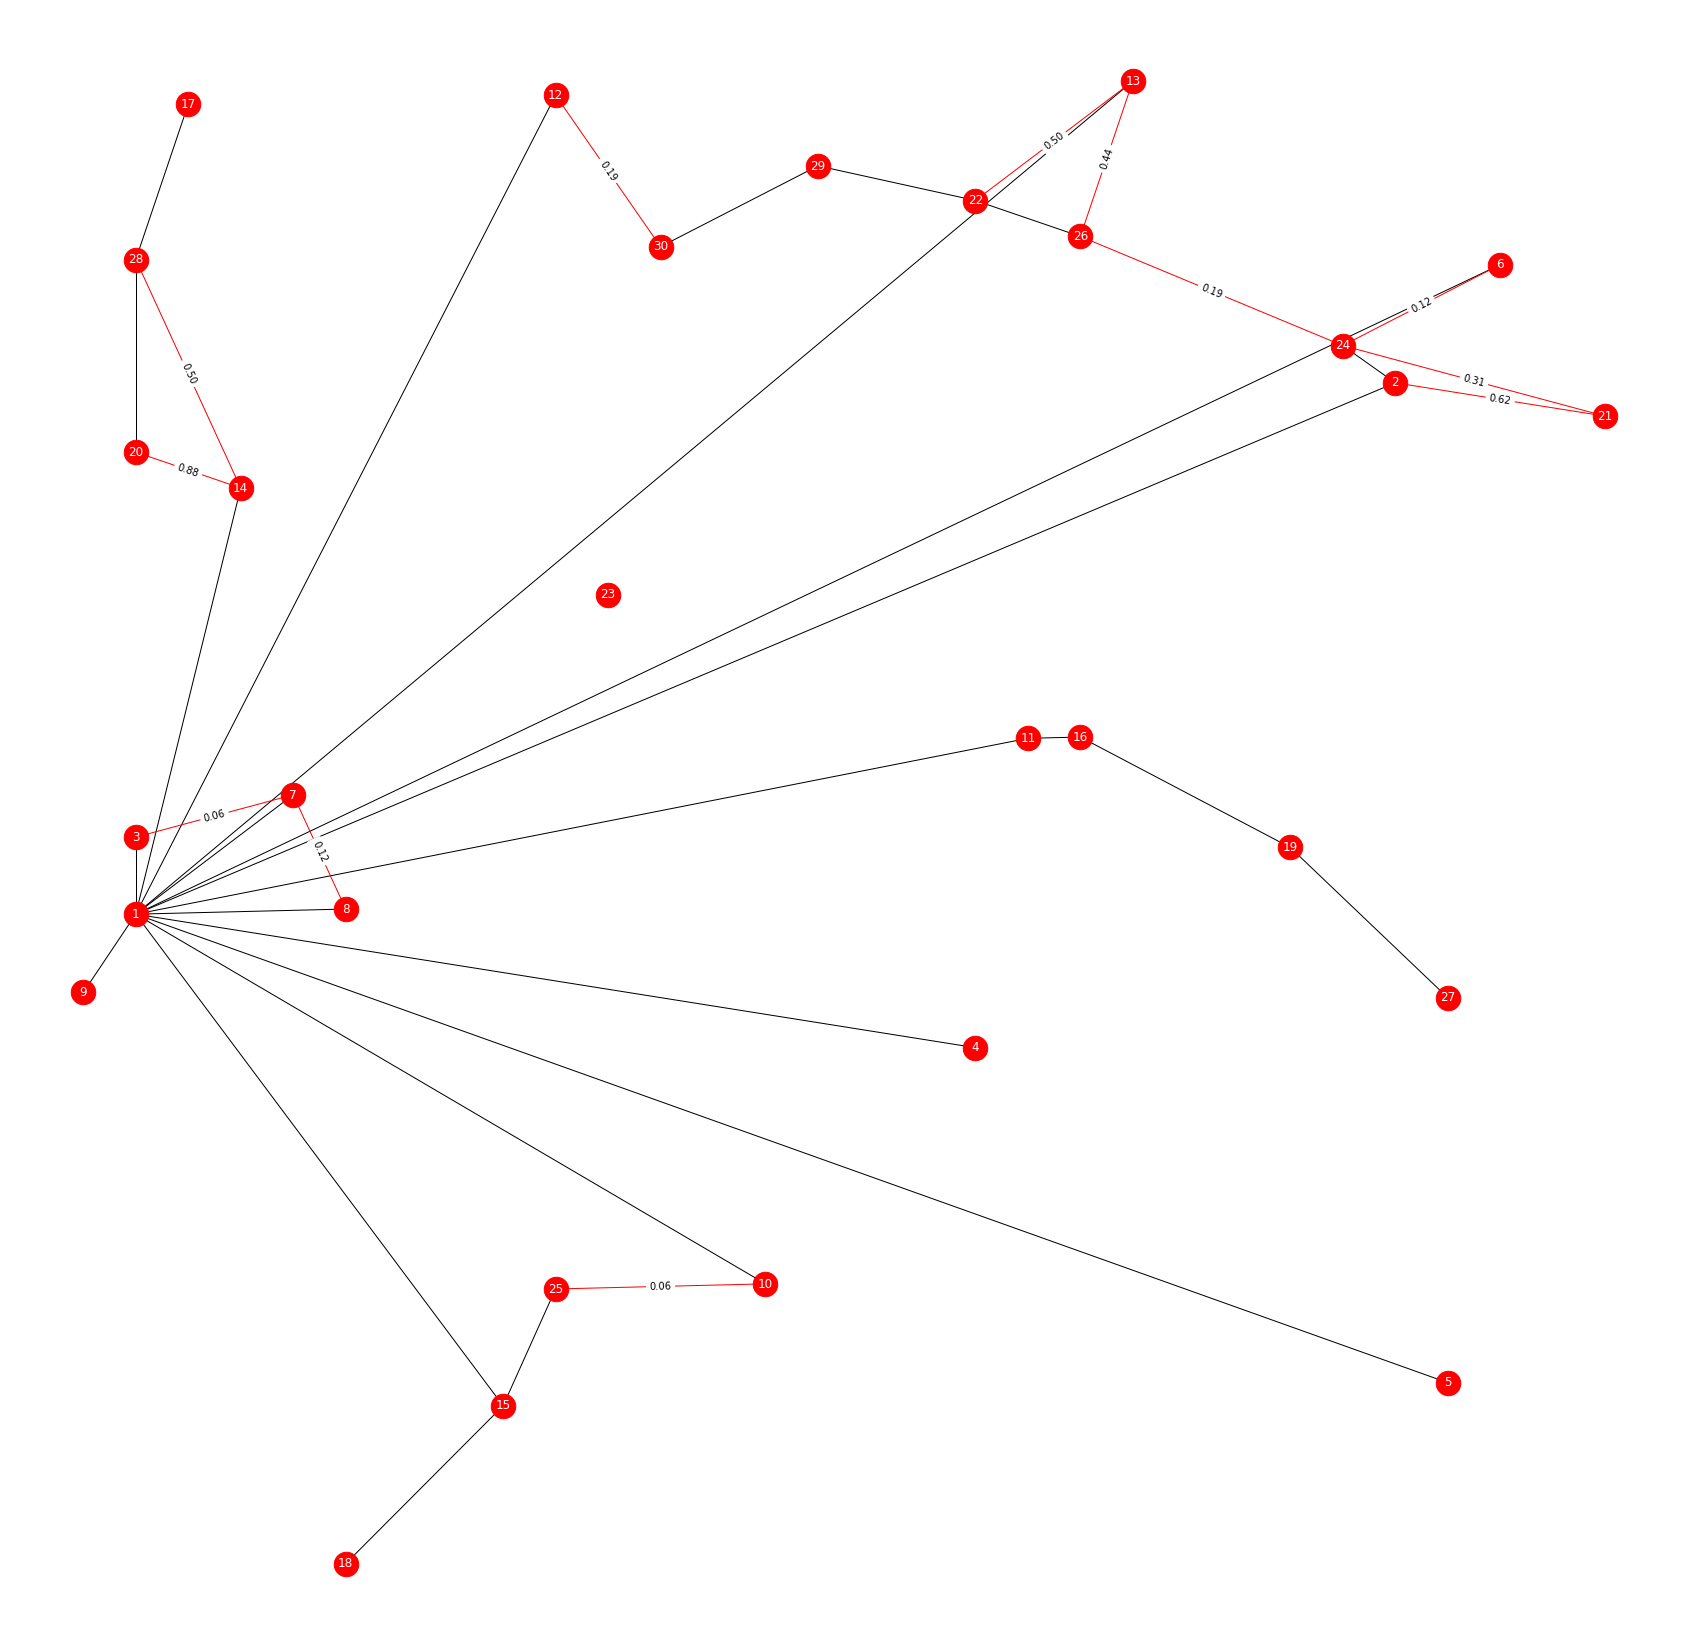

Found violated subtour. S = [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 20, 22, 24, 25, 26, 28, 29, 30]
Press Enter to continue...

Current solution value: 6072.666666666666


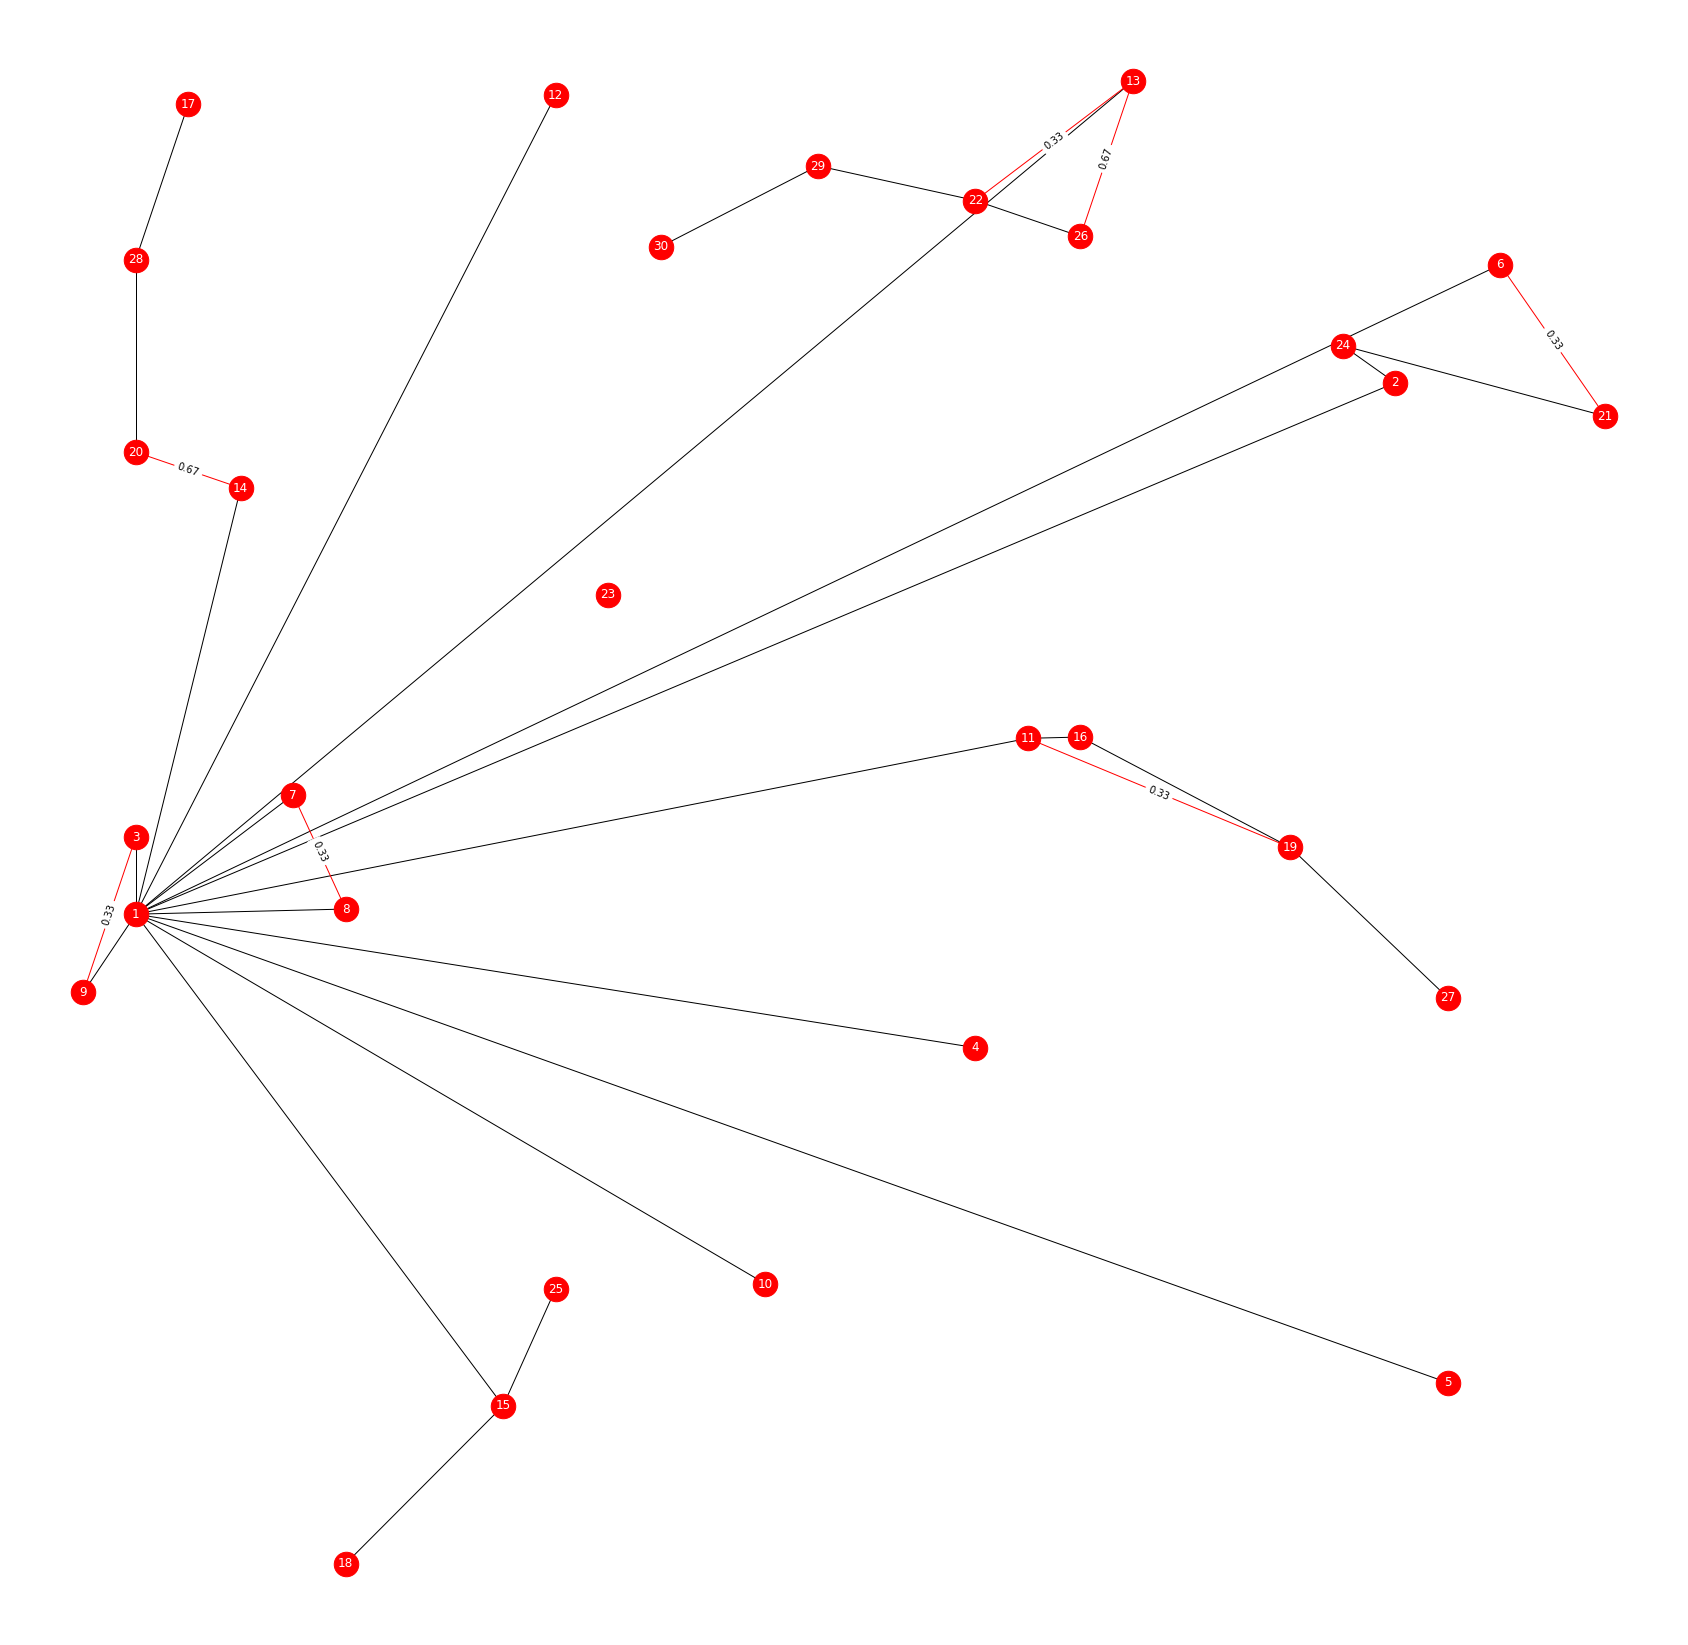

Found violated subtour. S = [1, 2, 3, 6, 7, 8, 9, 11, 13, 14, 15, 16, 19, 21, 24]
Press Enter to continue...

Current solution value: 6131.0


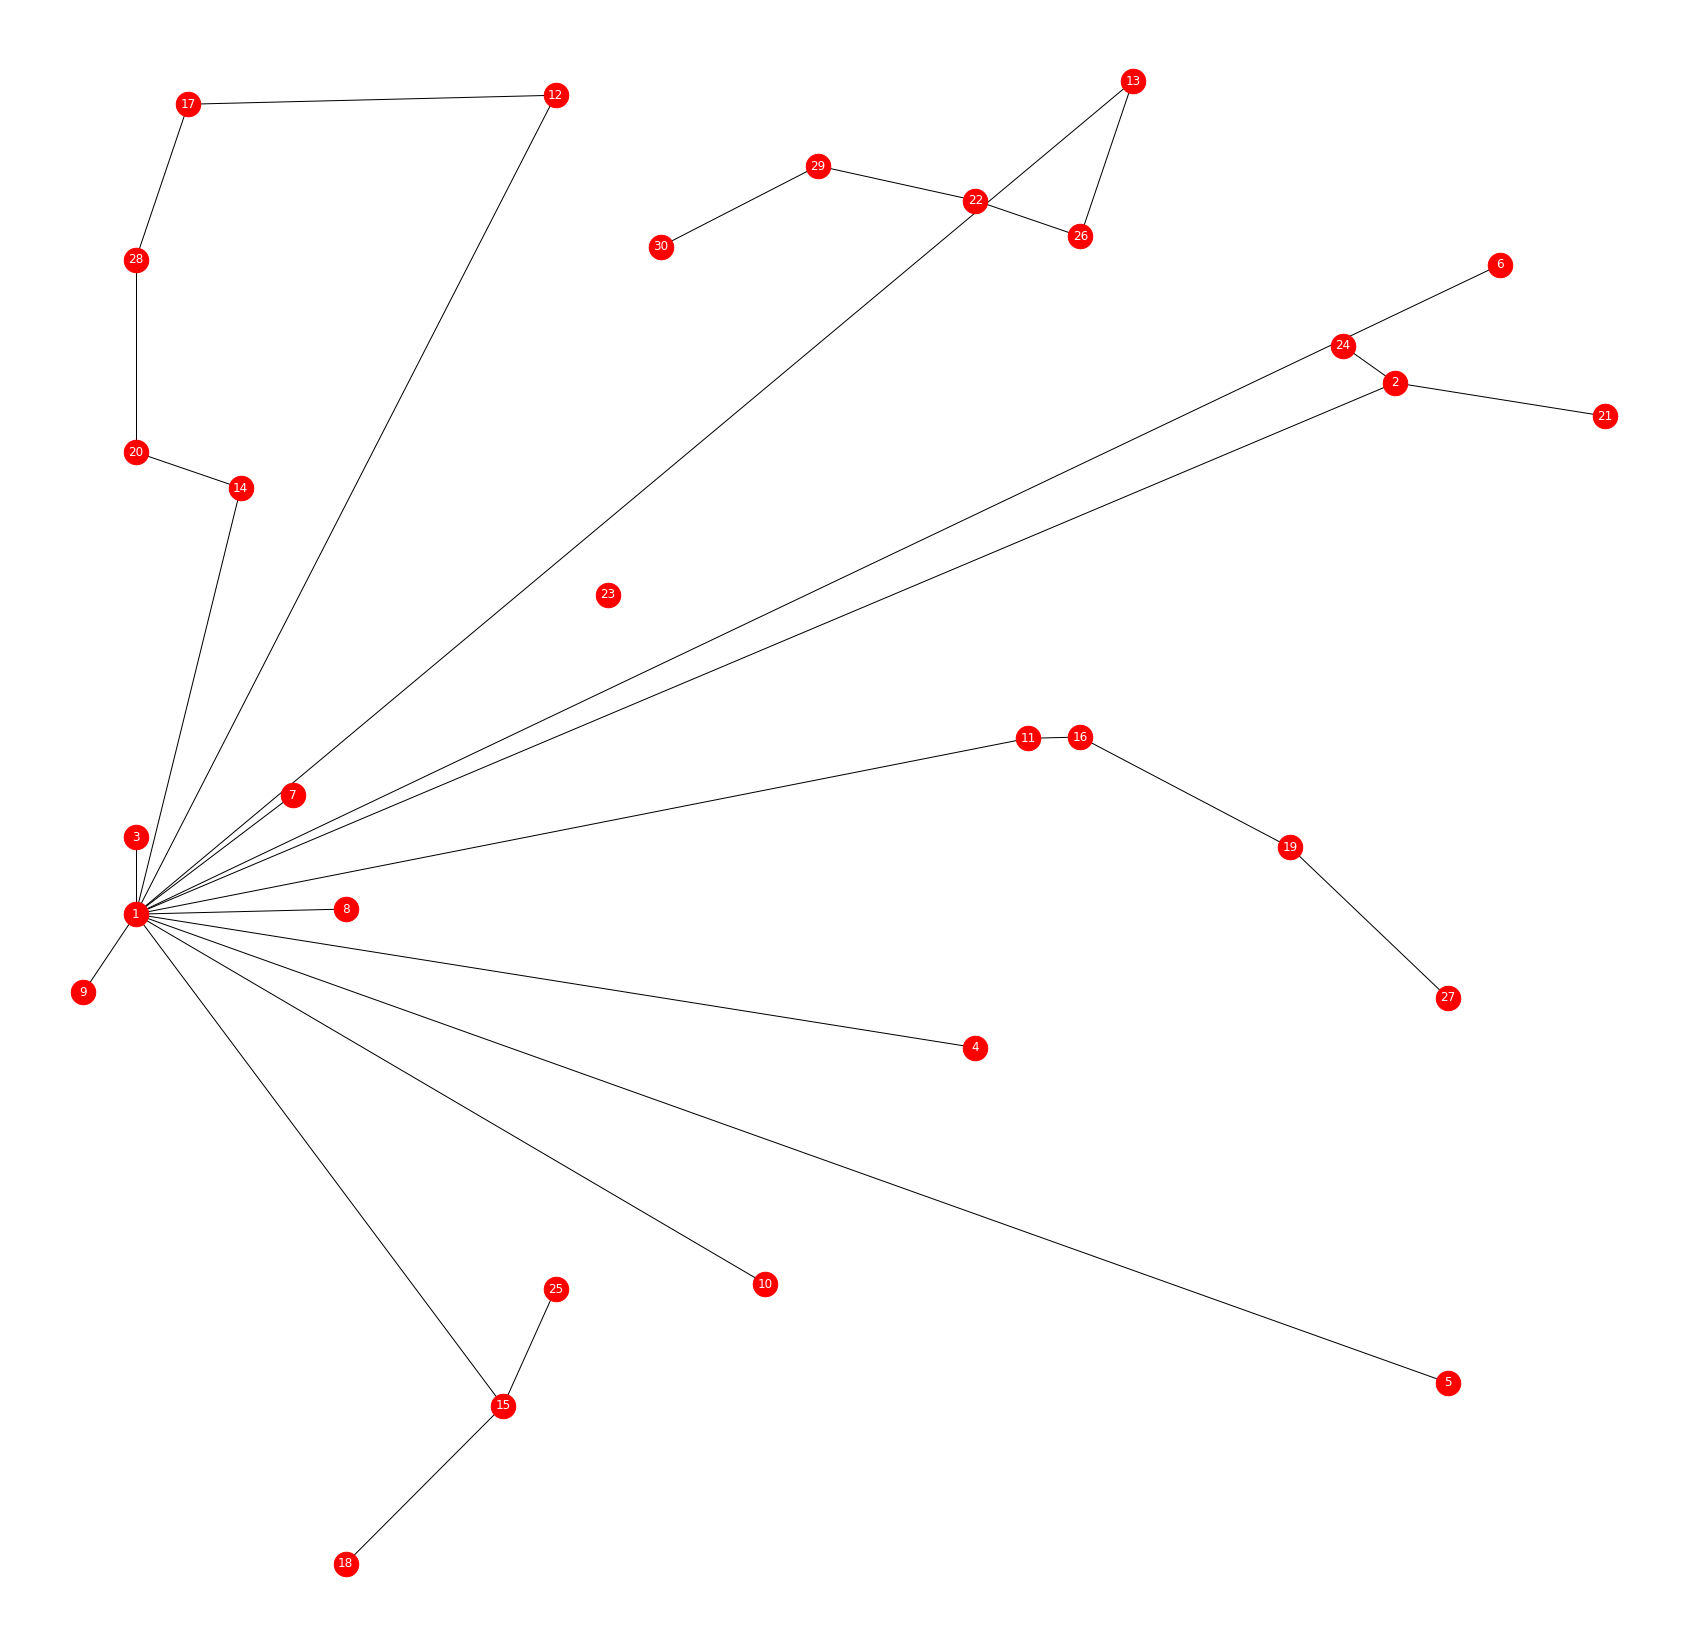

Found violated subtour. S = [1, 2, 11, 12, 13, 14, 15, 16, 17, 20, 26, 28]
Press Enter to continue...

Current solution value: 6143.0


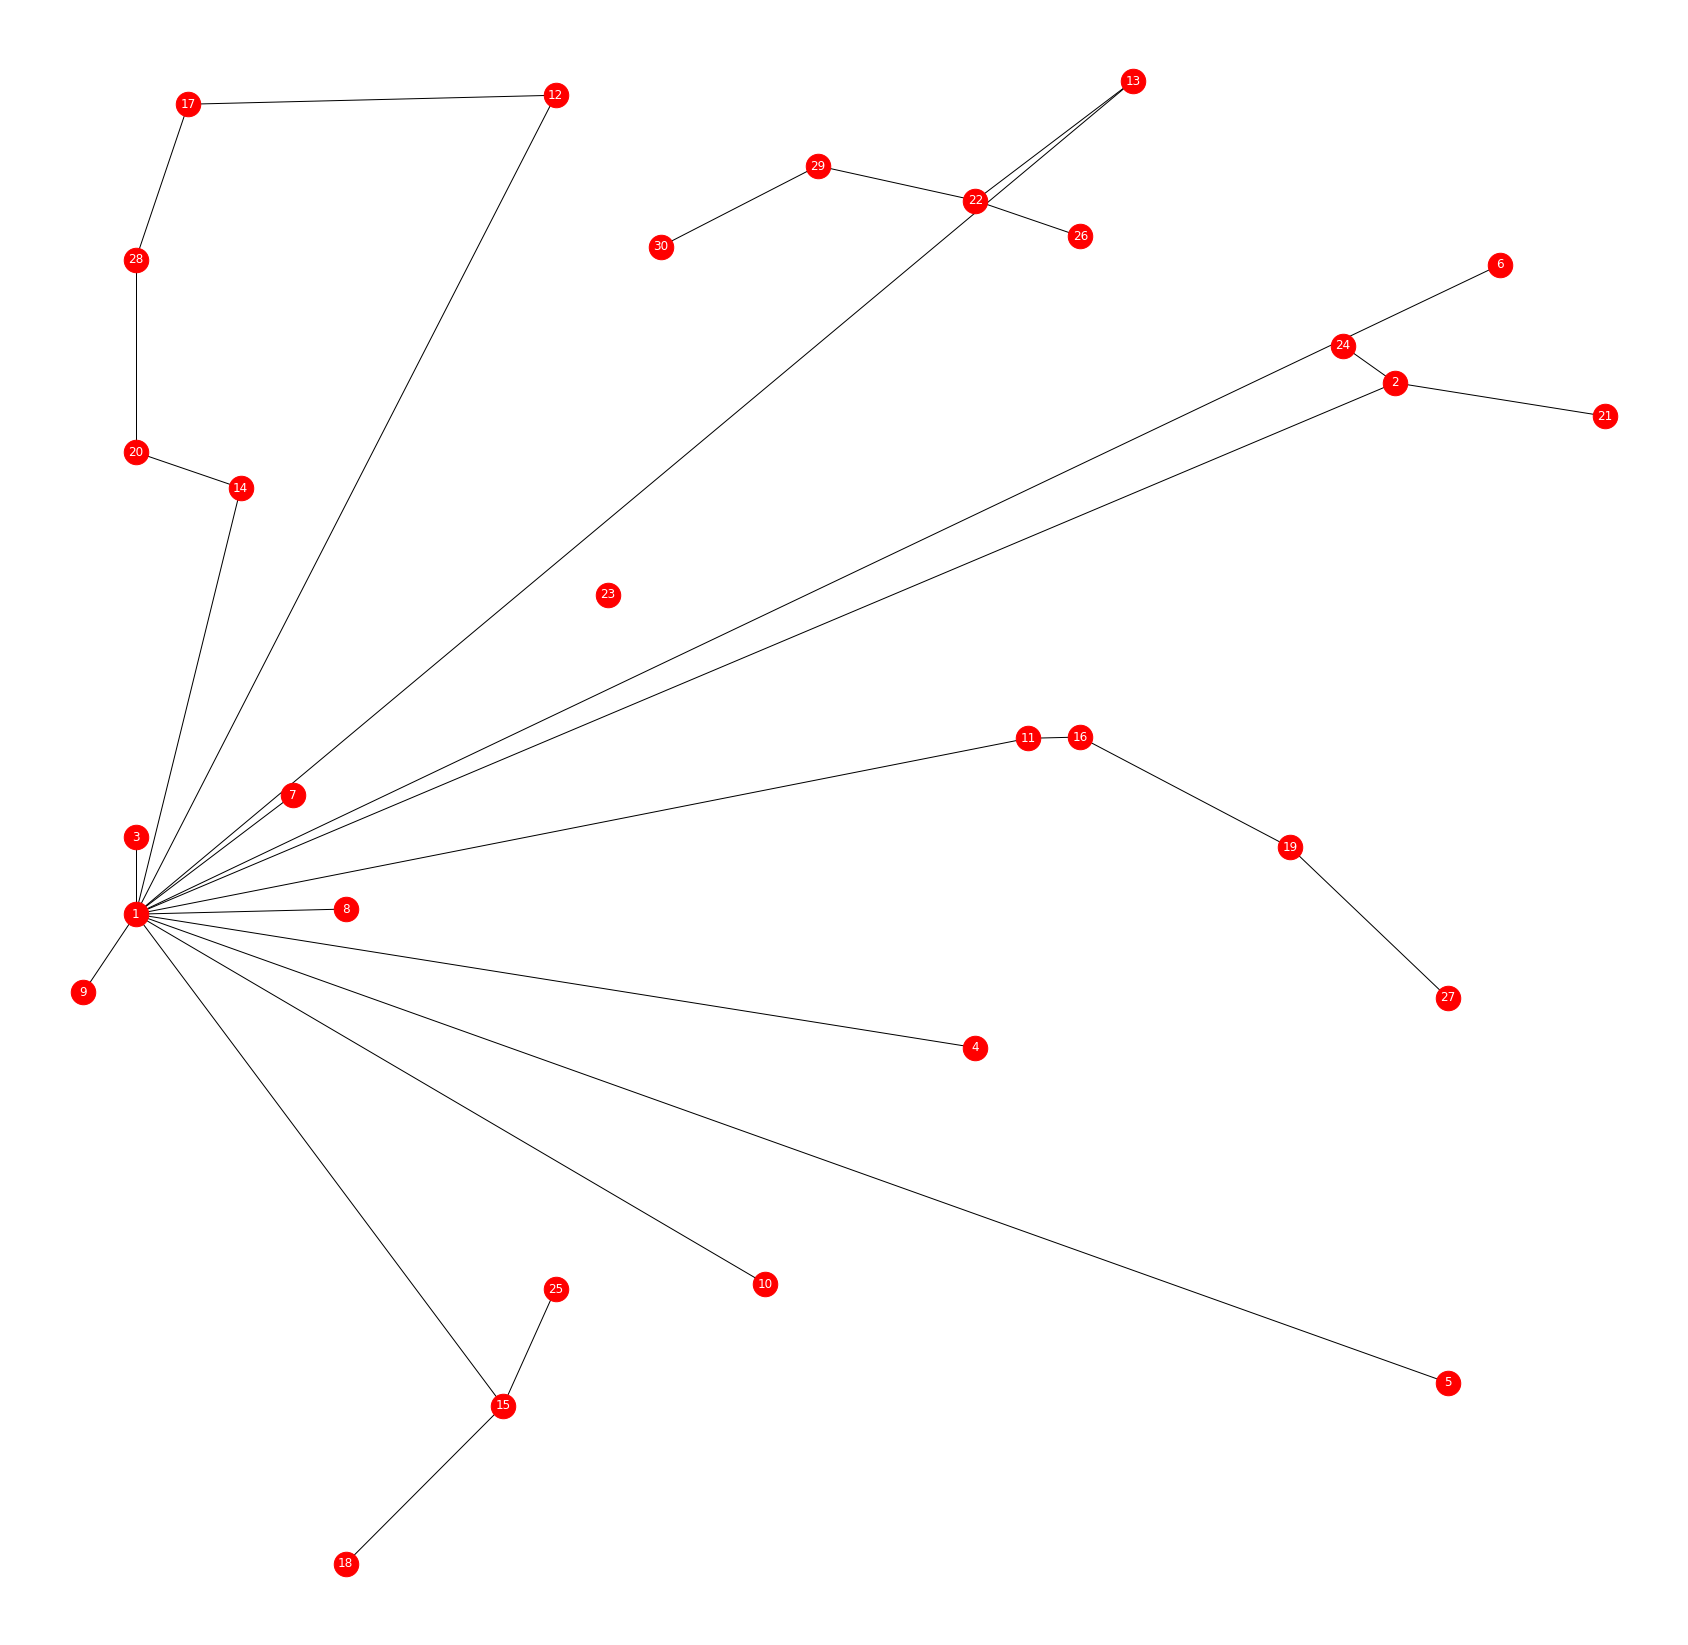

Found violated subtour. S = [1, 2, 11, 12, 13, 14, 15, 16, 17, 20, 22, 28]
Press Enter to continue...

Current solution value: 6147.5


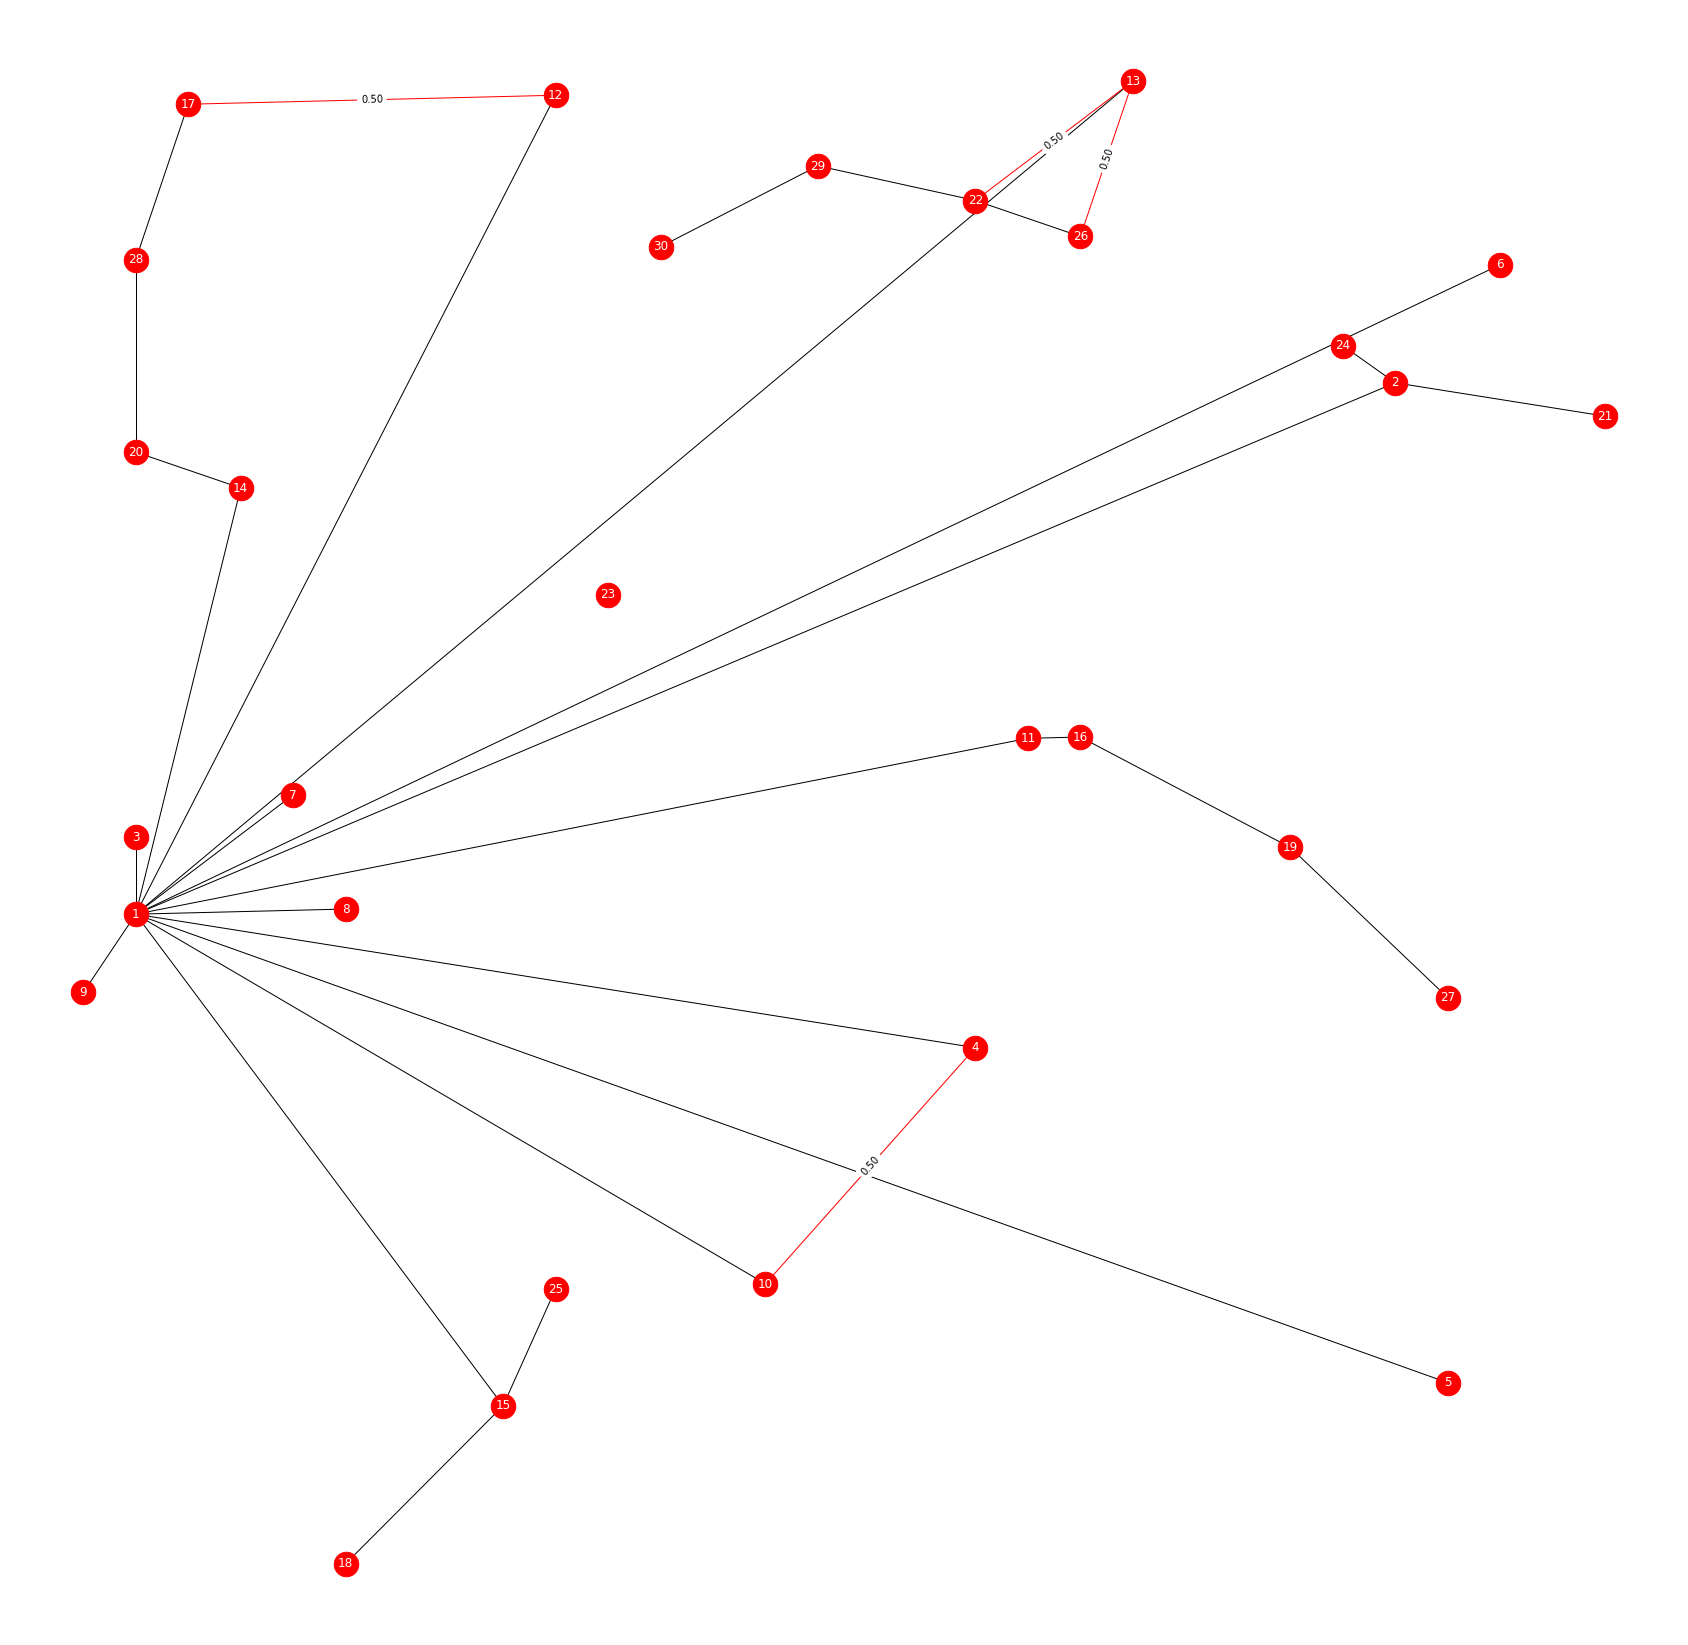

Found violated subtour. S = [1, 2, 4, 10, 11, 12, 13, 14, 15, 16, 17, 20, 28]
Press Enter to continue...

Current solution value: 6192.0


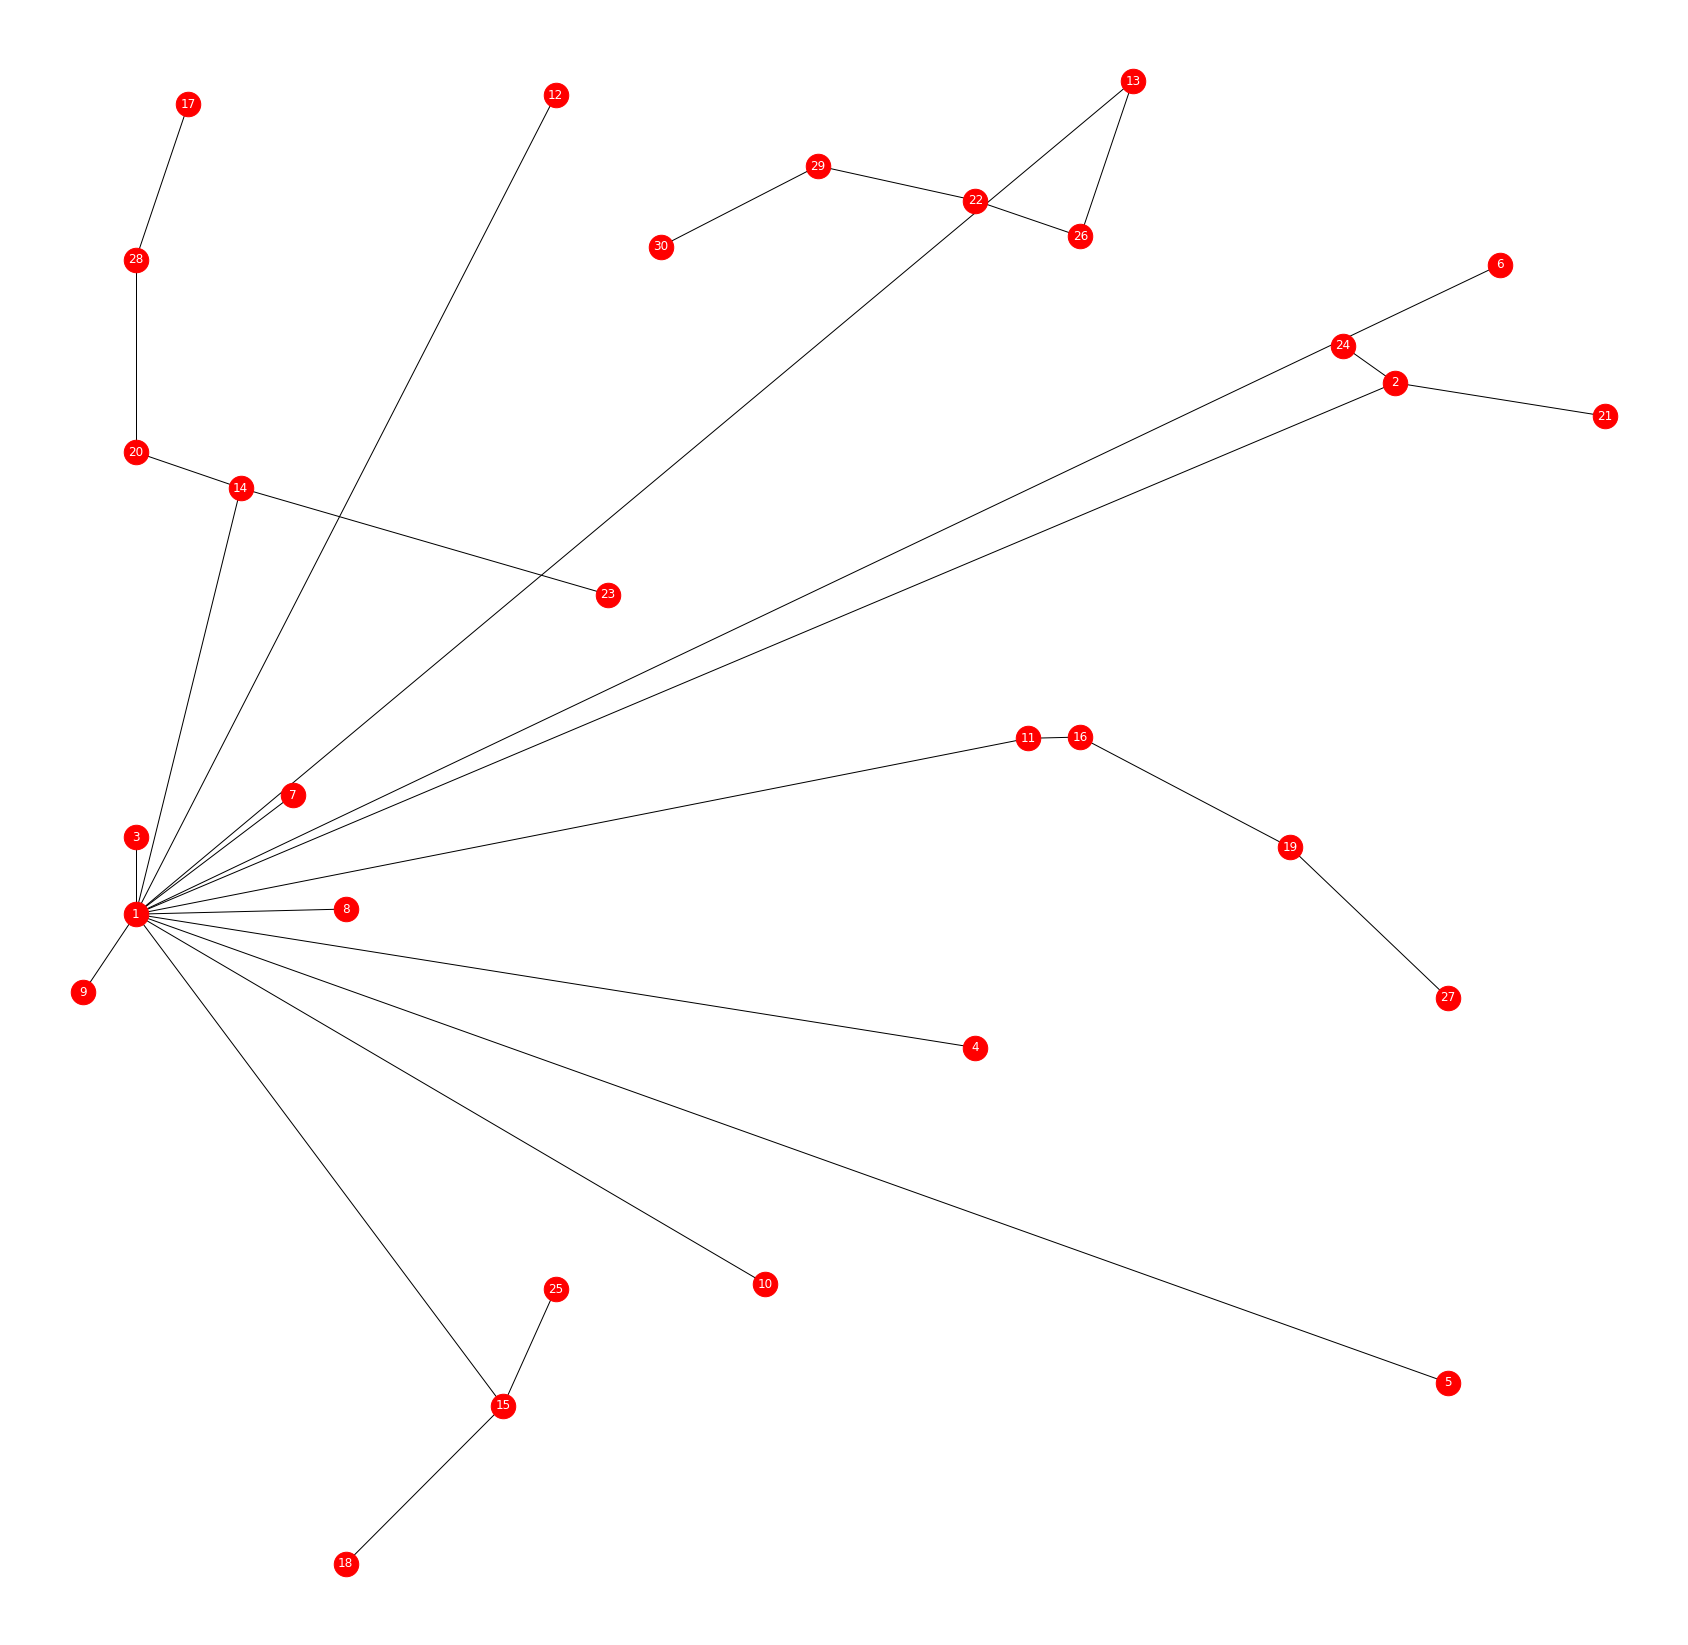

In [29]:


cont = True
#ftime = True

#
# Main cutting plane algorithm
#

sec = 1

# Display of gurobi log switched off

mst.Params.OutputFlag = 0



while cont: 
    
    # Master optimization
    
    mst.optimize()
    print ("Current solution value:", mst.objVal)

    DrawSol(G,x)

    cont = False
    for u in G.nodes():
        status, S = SECseparation(x, G, u)
        if status:
            cont = True
            SEC = G.subgraph(S)
            
            print ("Found violated subtour. S =", SEC.nodes())
            
        

            #
            # Constraint is added: 
            # variable key error may arise without  
            # the conditional statement (edges are undirected)
            # 

            mst.addConstr(gb.quicksum(x[i,j] if (i,j) in x else x[j,i] for i,j in SEC.edges()) \
                                      <= SEC.number_of_nodes() - 1, 'Sec' + str(sec))
        
            
            sec += 1
            
            mst.write('mstsep.lp')
            input("Press Enter to continue...\n")       
            break

### Check correctness

In [30]:
T = nx.algorithms.minimum_spanning_tree(G, weight='cost')
sum(T[u][v]['cost'] for u,v in T.edges())

6192

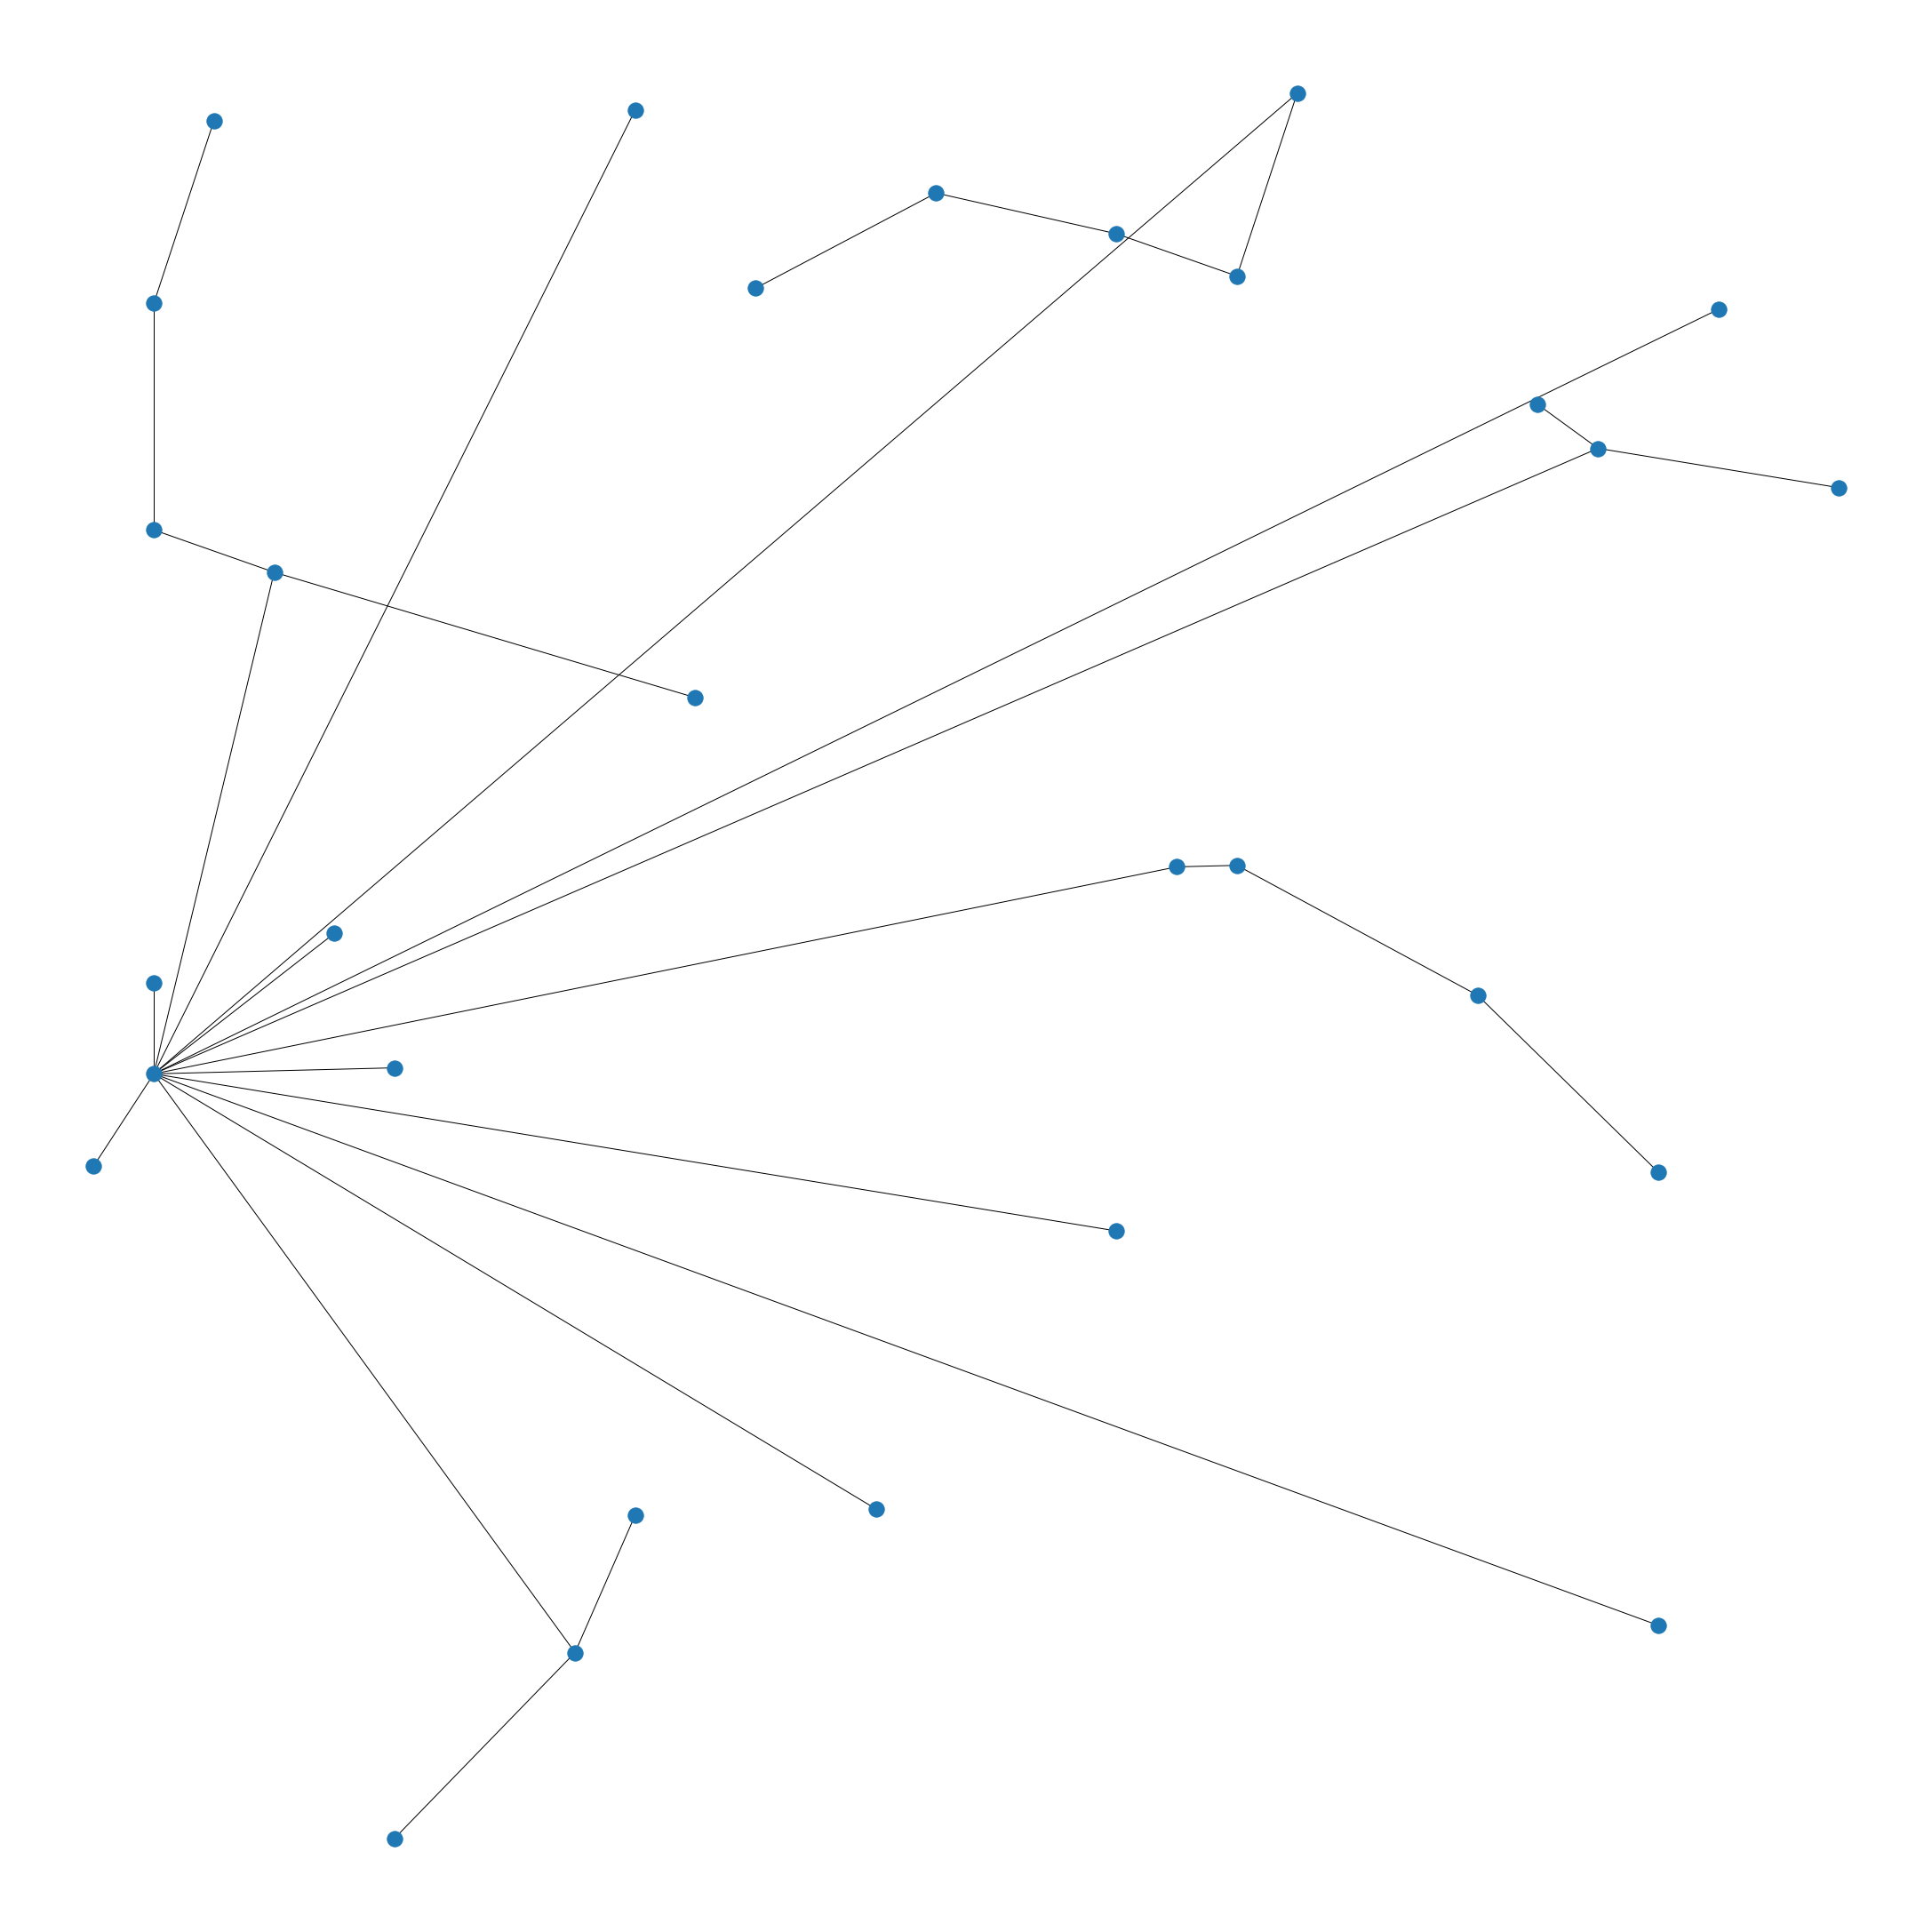

In [31]:
fig = plt.figure(figsize=(30,30))
pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}


nx.draw(T, pos=pos)

## Gurobi callbacks

From the [Gurobi manual](http://www.gurobi.com/documentation/7.0/refman/py_callbacks.html):
    
> ### Callbacks
>**Gurobi callback class**.
A callback is a **user function** that is called periodically by the Gurobi optimizer in order to **allow the user to query or modify the state of the optimization**. More precisely, if you pass a function that takes two arguments (``model`` and ``where``) as the argument to ``Model.optimize``, your function will be called during the optimization. Your callback function can then call ``Model.cbGet`` to query the optimizer for details on the state of the optimization.

>**Monitoring and early termination** 
Gurobi callbacks can be used both to monitor the progress of the optimization and to modify the behavior of the Gurobi optimizer. A simple user callback function might call ``Model.cbGet`` to produce a custom display, or perhaps to terminate optimization early (using ``Model.terminate``). 

>**Cut addition and MIP start** More sophisticated MIP callbacks might use ``Model.cbGetNodeRel`` or ``Model.cbGetSolution`` to retrieve values from the solution to the current node, and then use ``Model.cbCut`` or ``Model.cbLazy`` to add a constraint to cut off that solution, or ``Model.cbSetSolution`` to import a heuristic solution built from that solution.

>The Gurobi callback class provides a set of constants that are used within the user callback function. The first set of constants in this class list the options for the ``where`` argument to the user callback function. The ``where`` argument indicates from where in the optimization process the user callback is being called. Options are listed in the [Callback Codes](http://www.gurobi.com/documentation/7.0/refman/callback_codes.html#sec:CallbackCodes) section of this document.

>The other set of constants in this class list the options for the ``what`` argument to ``Model.cbGet``. The what argument is used by the user callback to indicate what piece of status information it would like to retrieve. The full list of options can be found in the [Callback Codes](http://www.gurobi.com/documentation/7.0/refman/callback_codes.html#sec:CallbackCodes) section. As with the ``where`` argument, you refer to a ``what`` constant through ``GRB.Callback``. For example, the simplex objective value would be requested using ``GRB.Callback.SPX_OBJVAL``.

>If you would like to pass data to your callback function, you can do so through the Model object. For example, if your program includes the statement ``model._value = 1`` before the optimization begins, then your callback function can query the value of ``model._value``. Note that the name of the user data field **must** begin with an underscore.

>When solving a model using multiple threads, note that the user callback is only ever called from a single thread, so you don't need to worry about the thread-safety of your callback.

>You can look at ``callback.py`` in the examples directory for details of how to use Gurobi callbacks. 

In [32]:
class args:
    filename = None
    scale = 40

args.filename = "graph30_1.gml"
args.figsize = 30,30

basename = os.path.splitext(args.filename)[0]
G = nx.read_graphml (args.filename, node_type=int)

print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

G has 30 nodes and 435 edges


In [33]:
def DrawSolCallback(G, x):
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    plt.figure(figsize=args.figsize)
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    nx.draw_networkx_labels(G, pos=pos, font_color='w')
    edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v] > 0.1]

    nx.draw_networkx_edges(G, pos=pos, edgelist=edges_in_sol, connectionstyle='arc3,rad=0.2')
    plt.axis('off')
    plt.show()

In [34]:
mst = gb.Model()

# Decision Variables

x = mst.addVars(G.edges(),\
                obj=[G[u][v]['cost'] for u,v in G.edges()],\
                ub = 1.0,\
                vtype=gb.GRB.BINARY, name='x')

# Cardinality constraint

mst.addConstr(x.sum() == G.number_of_nodes() - 1, 'Cardinality')


mst.update()

mst.write('mst.lp')

In [35]:
mst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 435 columns and 435 nonzeros
Model fingerprint: 0x3c8bb33b
Variable types: 0 continuous, 435 integer (435 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 3e+01]
Found heuristic solution: objective 31205.000000
Presolve removed 1 rows and 435 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 2: 5183 31205 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.183000000000e+03, best bound 5.183000000000e+03, gap 0.0000%


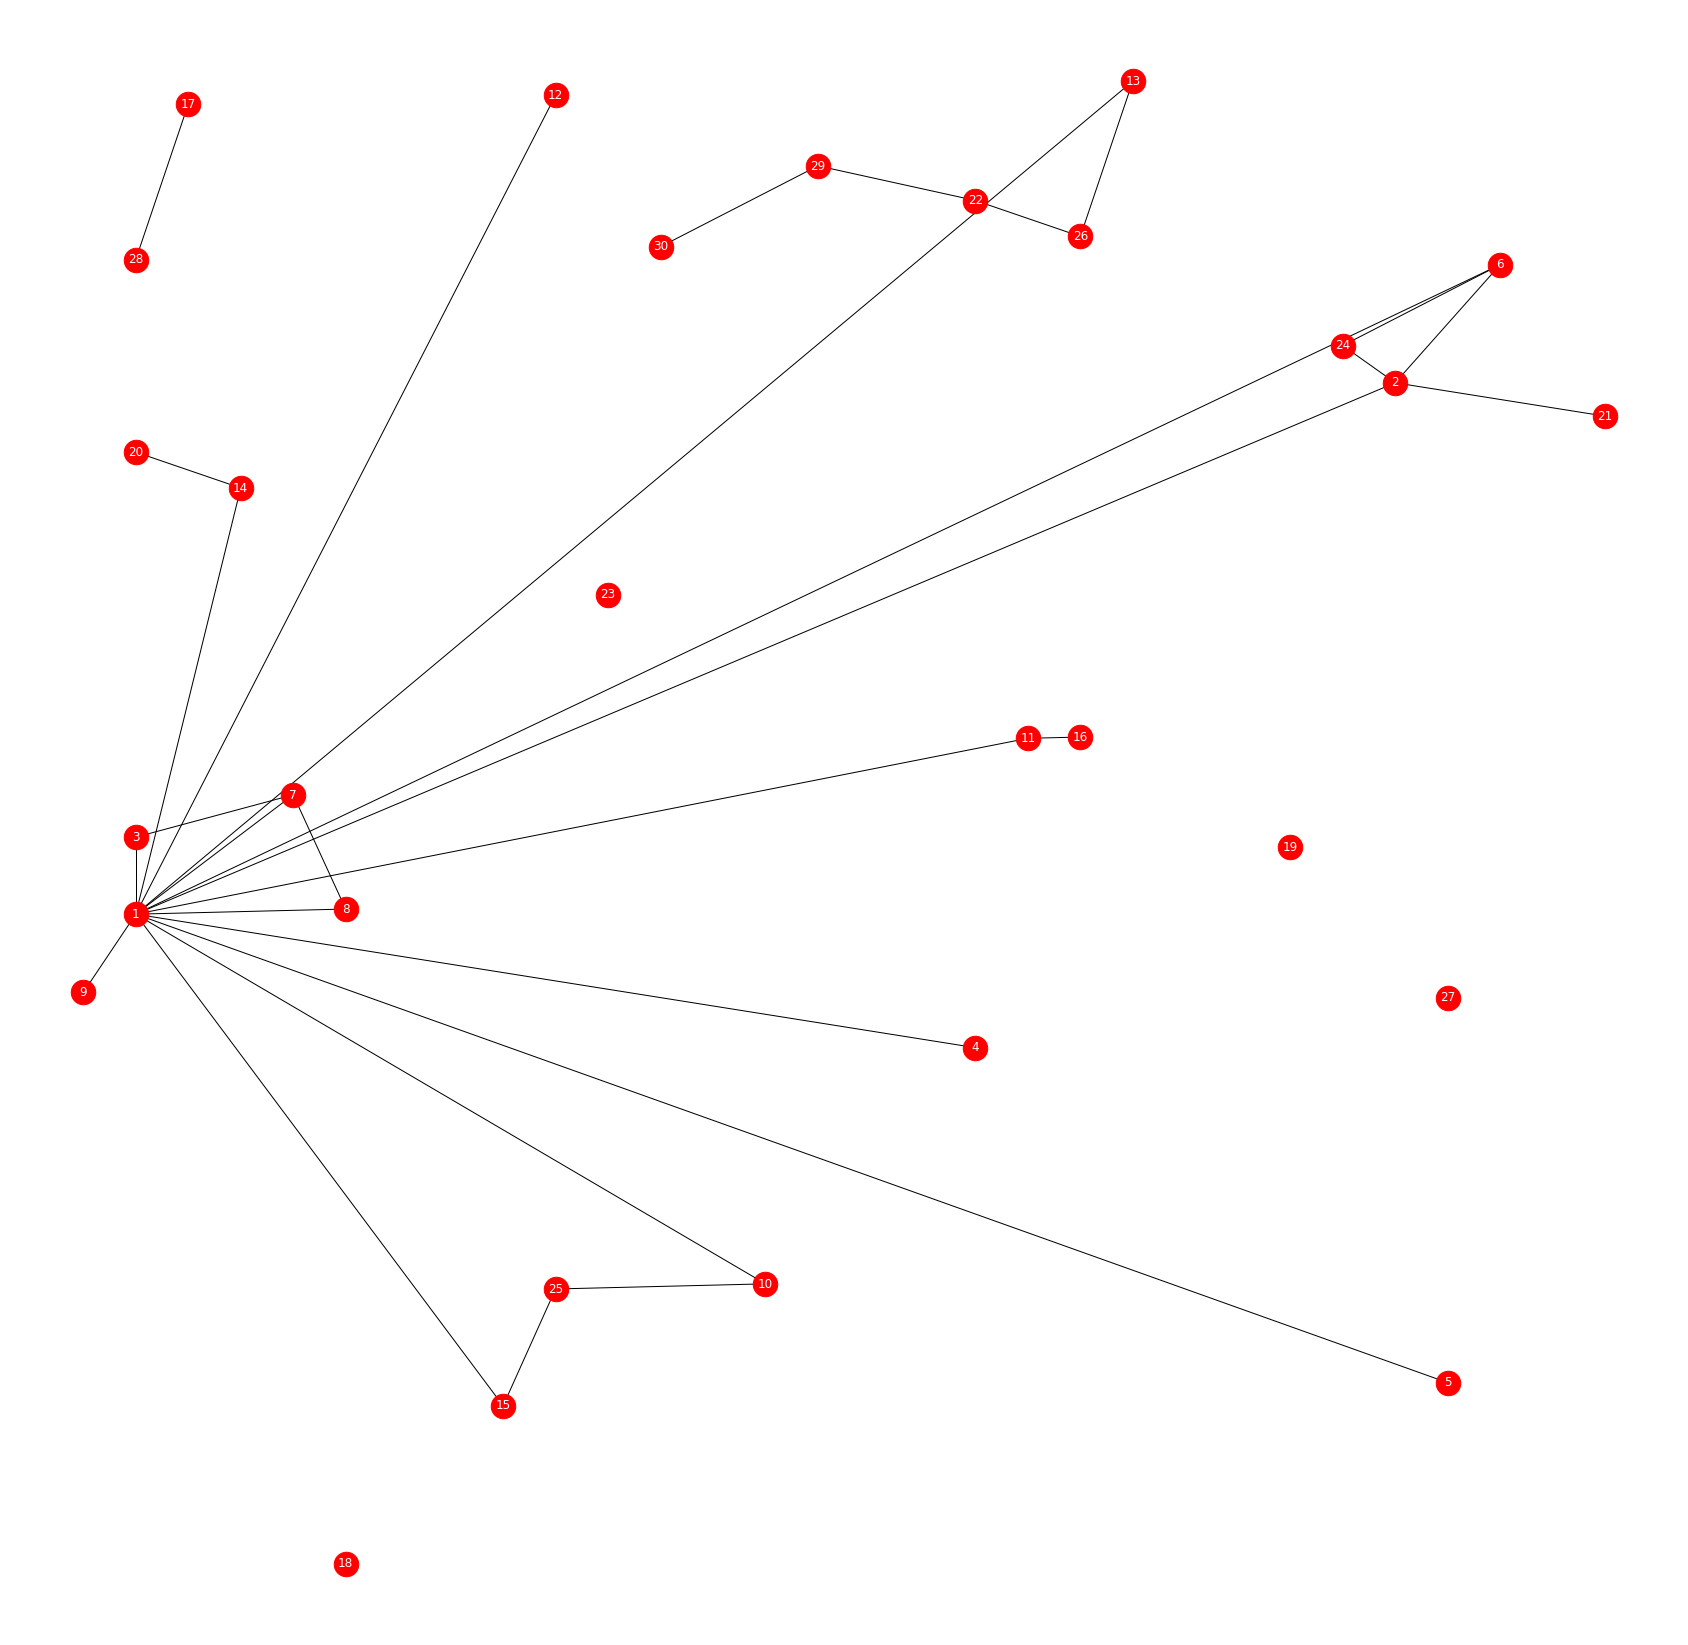

In [36]:
DrawSol(G,x)


## Data needed to the callback

Our callback needs: 
   1. The graph $G$
   2. The variables $x$
   3. The separation routine
   4. The number of SECs generated so far
 
The above data are added to the ``mst`` Model. Note the ``_`` before the data name

In [37]:
mst._graph = G
mst._vars = x
mst._nSEC = 0



In [38]:
import math
import itertools

def SECcallback (model, where):

        
    if where == gb.GRB.Callback.MIPSOL:
        
        x = model._vars
        x_at_node = model.cbGetSolution(x)
        G = model._graph
                
        sol_G = G.edge_subgraph([(u,v) for (u,v) in G.edges() 
                                 if math.isclose(x_at_node[u,v], 1.0, abs_tol=1E-3)])
        
        #
        # Check if sol_G is connected
        #
        
        # DrawSolCallback(G, x_at_node)
        
        for cc in nx.connected_components(sol_G):

            if len(cc) < G.number_of_nodes():
                if len(cc) > 2:
                    if sol_G.subgraph(cc).number_of_edges() > (len(cc) - 1):
                        
                        seclhs = gb.quicksum(x[u,v] if (u,v) in x else x[v,u] 
                                             for u,v in G.subgraph(cc).edges())
                        
                        model.cbLazy(seclhs <= len(cc) - 1)
                        model._nSEC += 1

                        print (f"SEC --> {G.subgraph(cc).nodes()}")
        print ('_'*50)

                

In [39]:
mst.reset()
mst.Params.OutputFlag = 1
mst.Params.lazyConstraints = 1
mst.optimize(SECcallback)



Discarded solution information
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 435 columns and 435 nonzeros
Model fingerprint: 0x3c8bb33b
Variable types: 0 continuous, 435 integer (435 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 3e+01]
__________________________________________________
Found heuristic solution: objective 31205.000000
Presolve time: 0.00s
Presolved: 1 rows, 435 columns, 435 nonzeros
Variable types: 0 continuous, 435 integer (435 binary)

Root relaxation: objective 5.183000e+03, 1 iterations, 0.00 seconds
SEC --> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 22, 24, 25, 26, 

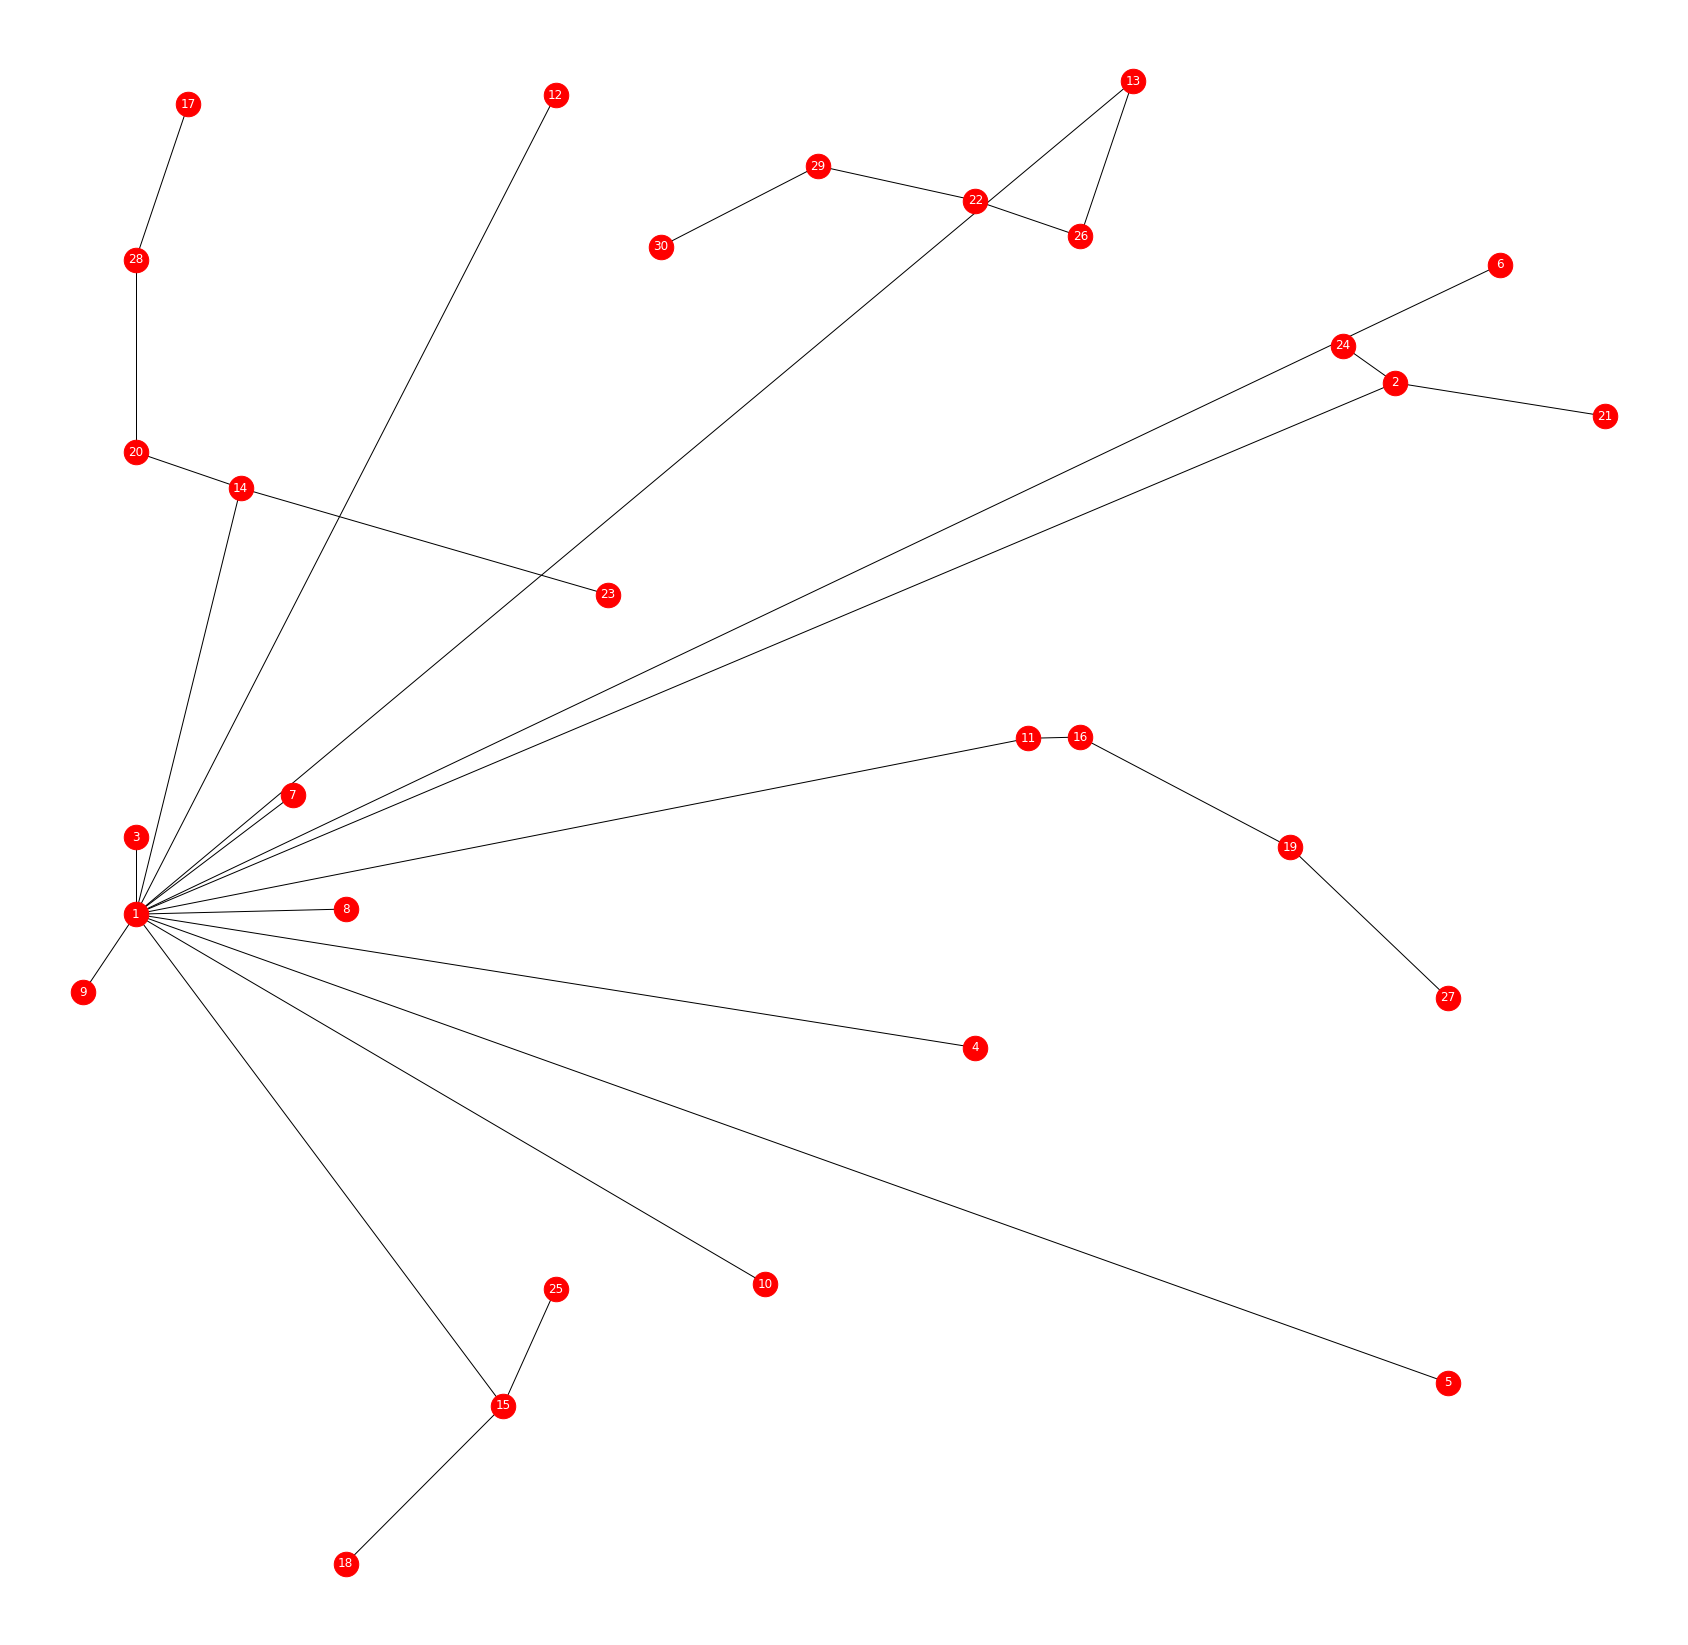

In [40]:
DrawSol(G, x)

## Solve the MST with the combinatorial algorithm

In [41]:
T = nx.minimum_spanning_tree(G, weight='cost')

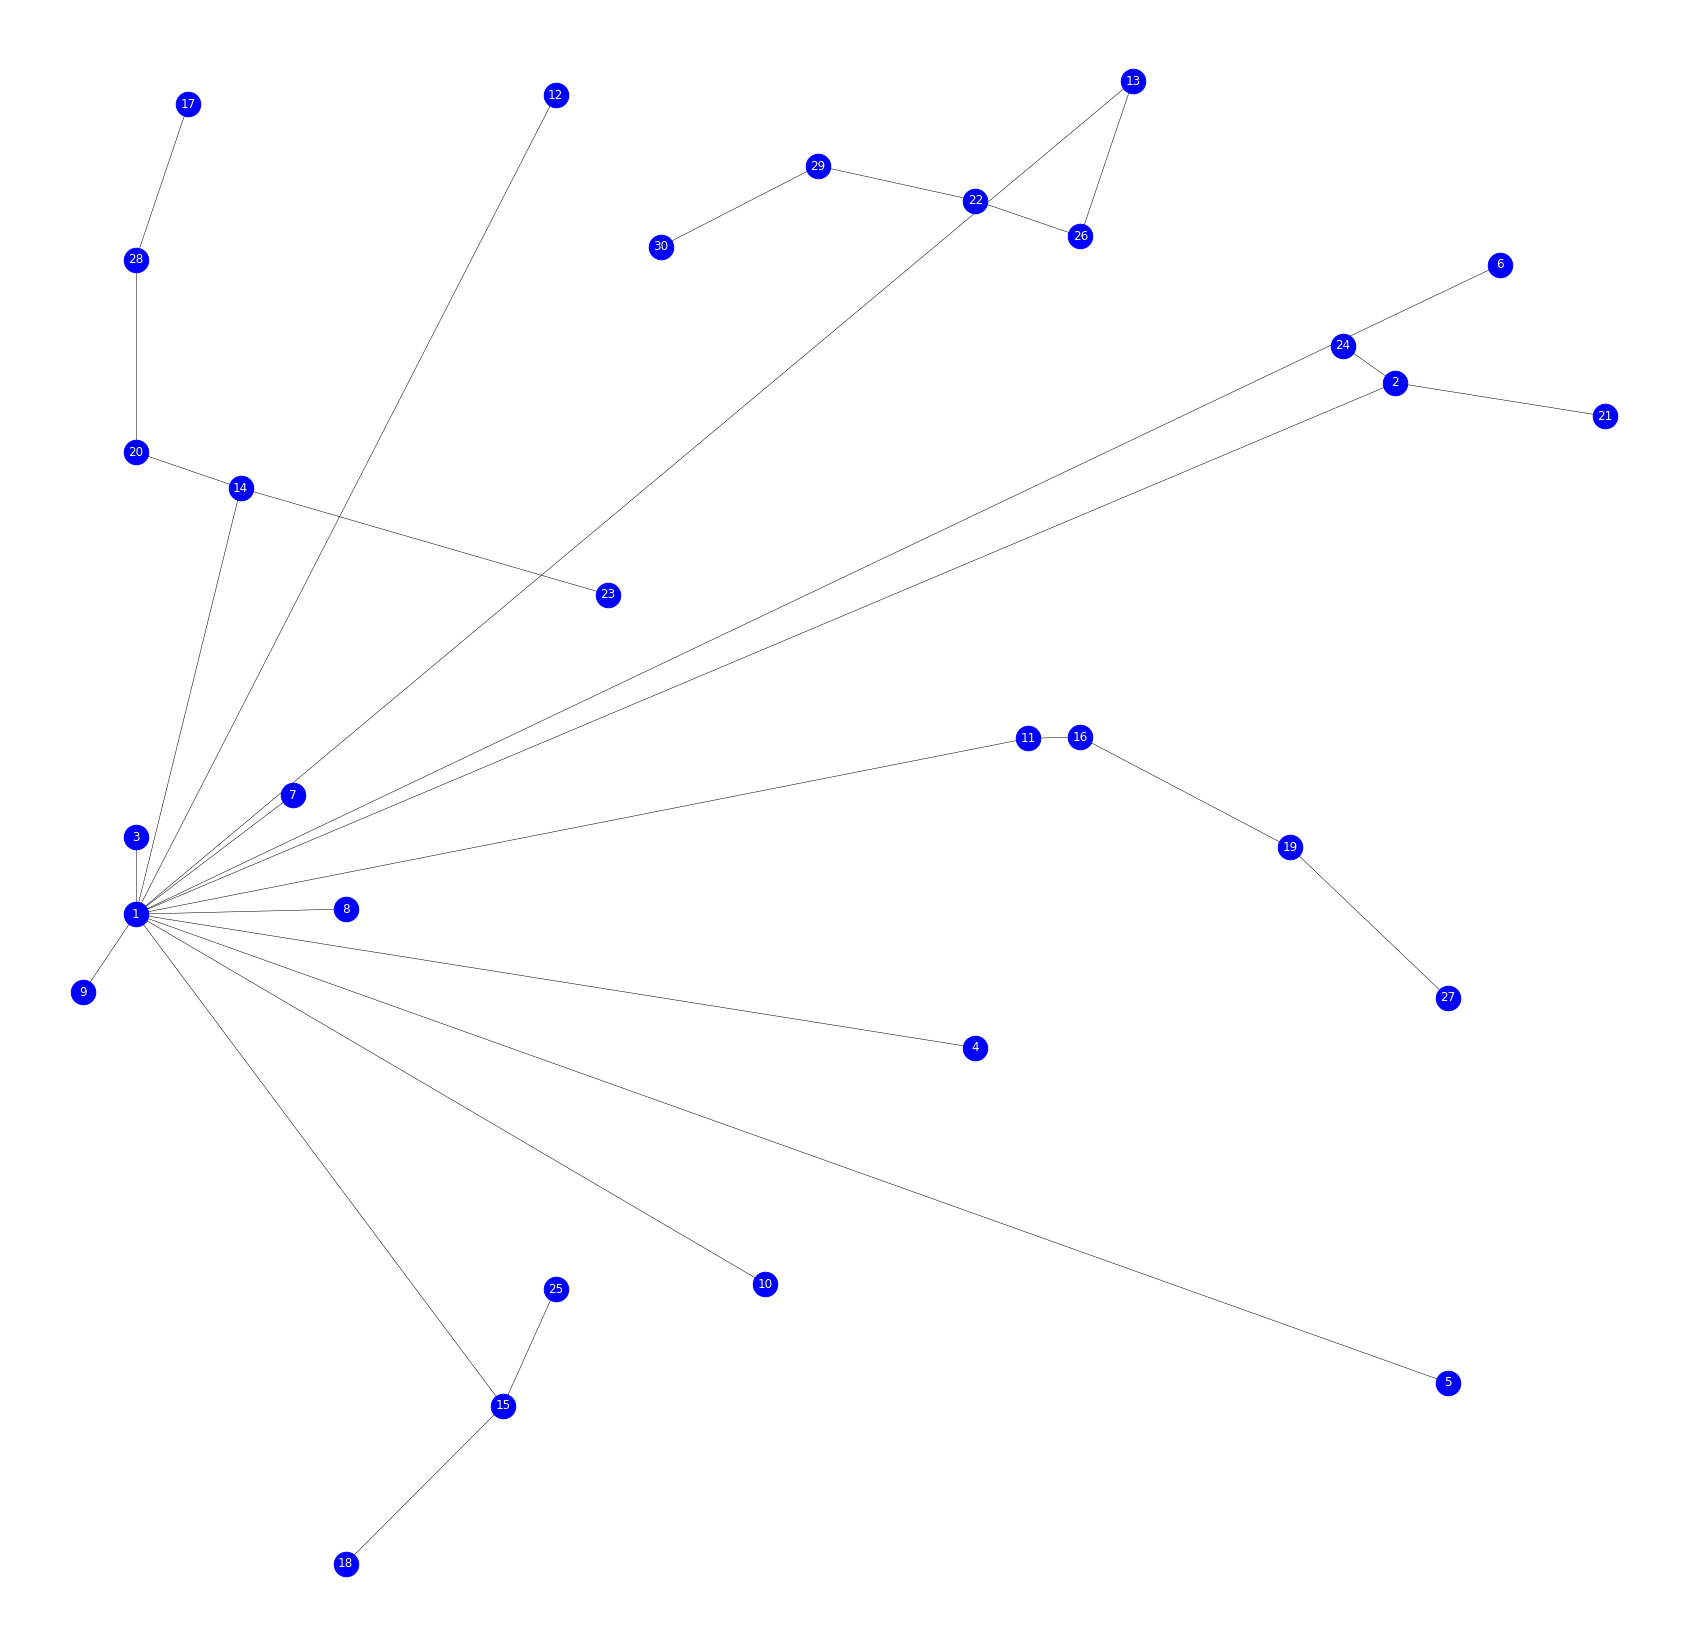

In [42]:
plt.figure(figsize=args.figsize)


pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

nx.draw_networkx(T, 
                 pos=pos, 
                 width=0.5, 
                 node_shape='o', 
                 node_size=600,
                 node_color='blue')

nx.draw_networkx_labels(T, pos=pos, font_color='w', font_size=12);

  
plt.axis('off')
plt.show()